# <b>PROGETTO DATA MINING</b>: Incidenti stradali in UK
## D'Atri Fulvio 235344
### Corso Data Mining 2021/2022



![](img/carcrash.jpg)

## <b>INDICE</b>
1. **Introduzione**  
2. **Preparazione dei dati**
    1. Importazione delle librerie necessarie
    2. Esplorazione del dataset
        1. Accident_Information
        2. Vehicle_Information
    3. Creazione del Test set 
3. **Analisi esplorative (extra)**
4. **Pre-Processing**
    1. Data Cleaning
        1. Eliminazine valori nulli
        2. Eliminazine outliers
        3. Ribilanciamento delle classi
    2. Esplorazione delle features
        1. Esplorazione attributi categorici
        2. Esplorazione attributi numerici
        3. Feature Selection
    3. Data Trasformation
        1. Dimensionality
            1. Local_Authority_(District)
            2. Local_Authority_(Highway)
            3. make
        2. Encoding
            1. Age_Band_of_Driver
            2. Day_of_Week e Time_Interval
            3. Altri attributi categorici
        3. Feature scaling
    4. Pipeline
5. **Model Selection**
6. **Post Processing**
7. **Valutazione delle performance**
8. **Conclusioni**

## <b>1. Introduzione</b>

Il dataset in oggetto proviene dal governo del Regno Unito, che ha raccolto e pubblicato informazioni dettagliate sugli incidenti stradali in tutto il paese dal 2004 al 2017.</br>
Queste informazioni includono, ma non sono limitate a, posizioni geografiche, condizioni meteorologiche, tipo di veicoli, numero di vittime e manovre dei veicoli, rendendo questo un dataset molto interessante e completo per l'analisi e la ricerca.

Il dataset è stato scaricato dal sito Kaggle dal seguente link:</br>
https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles?select=Vehicle_Information.csv.</br>
A sua volta i dati provengono dal sito Web Open Data del governo del Regno Unito, dove sono stati pubblicati dal Dipartimento dei trasporti.

L'obiettivo principale di questo progetto è risolvere il seguente task:
    
> __Task__: date le informazioni su caratteristiche di un incidente (es. condizioni della strada, condizioni metereologiche, condizioni del guidatore, ecc.), predire la gravità che avrà quell'incidente (**Accident_Severity**).
  
La soluzione fornita qui è progettata per essere una soluzione autonoma. Quindi non vi è alcun requisito in merito alla compatibilità o integrazione con altri modelli.

Il modo migliore per affrontare il problema è quello di utilizzare un approccio di apprendimento supervisionato, con qualche algoritmo di classificazione binaria.

Il resto del progetto è suddiviso nei seguenti capitoli:
* **2. Preparazione dei dati**: verranno effettuate le fasi preliminari, quali importazione di librerie utili nel preseguo; importazione del dataset da un formato .csv ad uno compatibile per le manipolazioni che andranno effettuate; ed infine già in questa fase verrà suddiviso il dataset in training set e testing set, in modo da mettere da parte il test set e non toccarlo più se non nel *Capitolo 7 Valutazione delle performance*, per valutare le performance finale del modello scelto.
* **3. Analisi esplorative (extra)**: è un capitolo extra, in cui verrà fatta una data analysis sul dataset in oggetto; ovvero sul dataset originale verrà eseguito un'analisi sugli incidenti avvenuti in Gran Bretagna.
* **4. Pre-Processing**: in questo capitolo sarà affrontata tutta la parte che trasforma il dataset in input in un nuovo dataset che sia "appetibile" per gli algoritmi di data mining. Quindi ci sarà una prima fase di Data Cleaning ad esempio per rimuovere i valori null e gli outliers, oppure per ribilanciare il dataset se si è difronte ad un problema con classi sbilanciate (imbalancing learning); una seconda fase in cui verrà scelto un sottoinsieme delle features (features selection) sia per rendere l'esecuzione degli algoritmi più efficiente e sia per ridurre la varianza e quindi l'overfitting; attraverso tecniche supervisionate oppure grazie all'importanza delle features fornita da classificatori come il RandomForest; infine un'ultima fase dove verranno eseguite tutte le trasformazioni sui dati, quali la trasformazione di attributi categorici in numerici, oppure la standardizzazione dei valori a causa dei problemi di scala. Tutte queste fasi verranno racchiuse in una pipeline, così da creare un pacchetto completo che dato in ingresso un dataset, restituisce il dataset pre-elaborato.
* **5. Model Selection**: in questo capitolo verranno addestrati più modelli di machine learning, e ne verranno valutate le performance attraverso la tecnica K-fold cross validation, in modo da poter confrontarle tra loro e scegliere il migliore classificatore sulla base del miglior score ottenuto su un validation set.
* **6. Post Processing**: in questo capitolo si modificherà un passo in precedenza, ovvero cerrà cambiata la tecnica di undersampling, e si riaddestreranno i classificatori, in modo da trovare il nuovo classificatore migliore, che come si vedrà più avanti si noterà un netto miglioramento rispetto al precedente.
* **7. Valutazione delle performance**: in questo capitolo verranno infine valutate le performance del miglior modello scelto nel capitolo precedente sul test set.
* **8. Conclusioni**: infine verrano riassunti i passi eseguiti, fornendo la pipeline output finale del task in questione.




## <b>2. Preparazione dei dati</b>

### <b>2.1. Importazione delle librerie necessarie</b>

Il codice seguente è scritto in Python 3.x. Le librerie forniscono funzionalità per eseguire le attività necessarie.

In [1]:
#load packages
import sys 
import pickle
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))
pd.set_option('display.max_columns', None)

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time
import calendar

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

#Imbalanced learning
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

#Transformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from collections import Counter


#Common Model Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
#import xgboost as xgb
#from xgboost import XGBClassifier
#from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from itertools import cycle
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#check cartelle
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))
print(check_output(["ls", "./img"]).decode("utf8"))

Python version: 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
pandas version: 1.4.2
matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.7.3
IPython version: 8.2.0
scikit-learn version: 1.0.2
-------------------------
Accident_Information.csv
Vehicle_Information.csv

carcrash.jpg
features_importance.png
nearmiss.png
PROGETTO.ipynb
prova.png
uk.png



### <b>2.2. Esplorazione del dataset</b>

Il dataset è composto da due file CSV:
* <b>AccidentInformation.csv</b>: ogni riga del file rappresenta un unico incidente stradale (identificato dalla colonna AccidentIndex), caratterizzato da varie proprietà relative al singolo incidente (34 colonne).
* <b>Vehicle_Information.csv</b>: ogni riga nel file rappresenta il coinvolgimento di un veicolo unico in un incidente stradale unico, con varie proprietà di veicoli e passeggeri come colonne (24 colonne).

I due file/set di dati sopra menzionati possono essere collegati tramite l'identificatore univoco dell'incidente stradale (colonna <b>Accident_Index</b>).

Più in dettaglio ecco spiegato brevemente il significato degli attributi dei due dataset:

Per quanto riguarda <b>AccidentInformation.csv</b>:</br>
1. <b>Accident_Index</b>: chiave che identifica un singolo incidente.
2. <b>1st_Road_Class</b>: serve per identificare una strada in Gran Bretagna (insieme agli altri 3 attributi).
3. <b>1st_Road_Number</b>: serve per identificare una strada in Gran Bretagna (insieme agli altri 3 attributi).
4. <b>2nd_Road_Class</b>: serve per identificare una strada in Gran Bretagna (insieme agli altri 3 attributi).
5. <b>2nd_Road_Number</b>: serve per identificare una strada in Gran Bretagna (insieme agli altri 3 attributi).
6. <b>Accident_Severity</b>: la gravità dell'incidente (Fatal, Severious, Slight).                      **(*)**
7. <b>Carriageway_Hazards</b>: pericoli presenti sulla strada (es. animali, pedoni, oggetti, ecc.).
8. <b>Date</b>: giorno in cui è avvenuto l'incidente.
9. <b>Day_of_Week</b>: giorno della settimana in cui è avvenuto l'incidente.
10. <b>Did_Police_Officer_Attend_Scene_of_Accident</b>:
11. <b>Junction_Control</b>: nel caso di incidente nei pressi di un incrocio, come era controllato quest'ultimo (es. semaforo, segnale di stop, vigile, ecc.).
12. <b>Junction_Detail</b>: nel caso di incidente nei pressi di un incrocio, come era l'incrocio (es. incroicio a T, rotatoia, ecc.).
13. <b>Latitude</b>: latitudine geografica in cui è avvenuto l'incidente.
14. <b>Light_Conditions</b>: Condizioni di luce quando è avvenuto l'incidente.
15. <b>Local_Authority_(District)</b>: ente locale del distretto.
16. <b>Local_Authority_(Highway)</b>: ente locale dell'autostrada.
17. <b>Location_Easting_OSGR</b>: altra tipologia di coordinate spaziali.
18. <b>Location_Northing_OSGR</b>: altra tipologia di coordinate spaziali.
19. <b>Longitude</b>: longitudine geografica in cui è avvenuto l'incidente.
20. <b>LSOA_of_Accident_Location</b>: leaving scene of an accident.
21. <b>Number_of_Casualties</b>: numero di morti nell'incidente.
22. <b>Number_of_Vehicles</b>: numero di veicoli coinvolti nell'incidente.
23. <b>Pedestrian_Crossing-Human_Control</b>: controllo umano dell'attraversamento pedonale.
24. <b>Pedestrian_Crossing-Physical_Facilities</b>: attraversamento pedonale strutture fisiche.
25. <b>Police_Force</b>: polizia intervenuta nell'incidente.
26. <b>Road_Surface_Conditions</b>: condizioni stradali nel momento dell'incidente (es. bagnato, innevato, ecc.).
27. <b>Road_Type</b>: tipo di strada (es. carreggiata singola, doppia, ecc.).
28. <b>Special_Conditions_at_Site</b>: condizioni anomale presenti sulla strada (es. lavori, benzina, segnali non funzionanti, ecc.).
29. <b>Speed_limit</b>: limite di velocità presente nella strada in cui è avvenuto l'incidente.
30. <b>Time</b>: orario in cui è avvenuto l'incidente.
31. <b>Urban_or_Rural_Area</b>: area urbana o rurale.
32. <b>Weather_Conditions</b>: condizioni atmosferiche quando è avvenuto l'incidente (es. pioggia, vento, nebbia, ecc.).
33. <b>Year</b>: anno in cui è avvenuto l'incidente.
34. <b>InScotland</b>: se l'incidente è avvenuto in Scozia o no.

Per quanto riguarda <b>Vehicle_Information.csv</b>:</br>
1. <b>Accident_Index</b>: chiave esterna che associa il singolo veicolo al singolo incidente identificato da questa chiave.
2. <b>Age_Band_of_Driver</b>: intervalli di età del conducente.
3. <b>Age_of_Vehicle</b>: età del veicolo.
4. <b>Driver_Home_Area_Type</b>: l'area se rurale o urbana della casa del guidatore.
5. <b>Driver_IMD_Decile</b>: *Multiple Deprivation Index*, è un indice che indica un livello di povertà del guidatore.
6. <b>Engine_Capacity_.CC.</b>: cavalli del motore dell'auto.
7. <b>Hit_Object_in_Carriageway</b>: oggetti colpiti nell'incidente presenti sulla strada.
8. <b>Hit_Object_off_Carriageway</b>: oggetti colpiti nell'incidente presenti fuori la strada.
9. <b>Journey_Purpose_of_Driver</b>: obiettivo che aveva il viaggio per il guidatore.
10. <b>Junction_Location</b>: se l'incidente è avvenuto in prossimità di un incrocio, cosa stava facendo.
11. <b>make</b>: marca dell'auto.
12. <b>model</b>: modello dell'auto.
13. <b>Propulsion_Code</b>: tipo di carburante dell'auto.
14. <b>Sex_of_Driver</b>: sesso del guidatore.
15. <b>Skidding_and_Overturning</b>: se l'auto si è ribaltata nell'incidente o slittata.
16. <b>Towing_and_Articulation</b>: caratteristiche del traino se presente durante l'incidente.
17. <b>Vehicle_Leaving_Carriageway</b>: come è uscito il veicolo dalla carreggiata prima dell'incidente.
18. <b>Vehicle_Location.Restricted_Lane</b>: numero corsia della strada.
19. <b>Vehicle_Manoeuvre</b>: manovra che ha compiuto il veicoli prima dell'incidente.
20. <b>Vehicle_Reference</b>:
21. <b>Vehicle_Type</b>: tipo di veicolo.
22. <b>Was_Vehicle_Left_Hand_Drive</b>: se il veicolo aveva la guida a sinistra.
23. <b>X1st_Point_of_Impact</b>: primo parte del veicoli che ha subito l'impatto.
24. <b>Year</b>: anno in cui è avvenuto l'incidente.

**(*)** Questo è l'attributo che si vuole predire

Si importano i due dataset con pandas: *Accident_Information* e *Vehicle_information*.

#### <b>2.2.1. Accident_Information:</b>

In [2]:
accidents = pd.read_csv('./input/Accident_Information.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 2047256 
Columns: 34


Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                None  2005-01-04   
1              0.0            Slight                None  2005-01-05   
2              0.0            Slight                None  2005-01-06   
3              0.0            Slight                None  2005-01-07   
4              0.0            Slight                None  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  \
0     Tuesday                                          1.0   
1   Wednesday                                          1.0   
2    Thursday                                          1.0   
3      Friday                                          1.0   
4      Monday                                          1.0   

               Junction_Control                      Junction_Detail  \
0  Data missing or out of range  Not at junction or within 20 metres   
1           Auto traffic signal                           Crossroads   
2  Data missing or out of range  Not at junction or within 20 metres   
3  Data missing or out of range  Not at junction or within 20 metres   
4  Data missing or out of range  Not at junction or within 20 metres   

    Latitude             Light_Conditions Local_Authority_(District)  \
0  51.489096                     Daylight     Kensington and Chelsea   
1  51.520075        Darkness - lights lit     Kensington and Chelsea   
2  51.525301        Darkness - lights lit     Kensington and Chelsea   
3  51.482442                     Daylight     Kensington and Chelsea   
4  51.495752  Darkness - lighting unknown     Kensington and Chelsea   

  Local_Authority_(Highway)  Location_Easting_OSGR  Location_Northing_OSGR  \
0    Kensington and Chelsea               525680.0                178240.0   
1    Kensington and Chelsea               524170.0                181650.0   
2    Kensington and Chelsea               524520.0                182240.0   
3    Kensington and Chelsea               526900.0                177530.0   
4    Kensington and Chelsea               528060.0                179040.0   

   Longitude LSOA_of_Accident_Location  Number_of_Casualties  \
0  -0.191170                 E01002849                     1   
1  -0.211708                 E01002909                     1   
2  -0.206458                 E01002857                     1   
3  -0.173862                 E01002840                     1   
4  -0.156618                 E01002863                     1   

   Number_of_Vehicles  Pedestrian_Crossing-Human_Control  \
0                   1                                0.0   
1                   1                                0.0   
2                   2                                0.0   
3                   1                                0.0   
4                   1                                0.0   

   Pedestrian_Crossing-Physical_Facilities         Police_Force  \
0                                      1.0  Metropolitan Police   
1                                      5.0  Metropolitan Police   
2                                      0.0  Metropolitan Police   
3                                      0.0  Metropolitan Police   
4                                      0.0  Metropolitan Police   

  Road_Surface_Conditions           Road_Type Special_Conditions_at_Site  \
0             Wet or damp  Single carriageway                       None   
1                     Dry    Dual carriageway                       None   
2                     Dry  Single carriageway                       None   
3    

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

Text(0.5, 1.0, 'Valori nulli nelle features in percentuale')

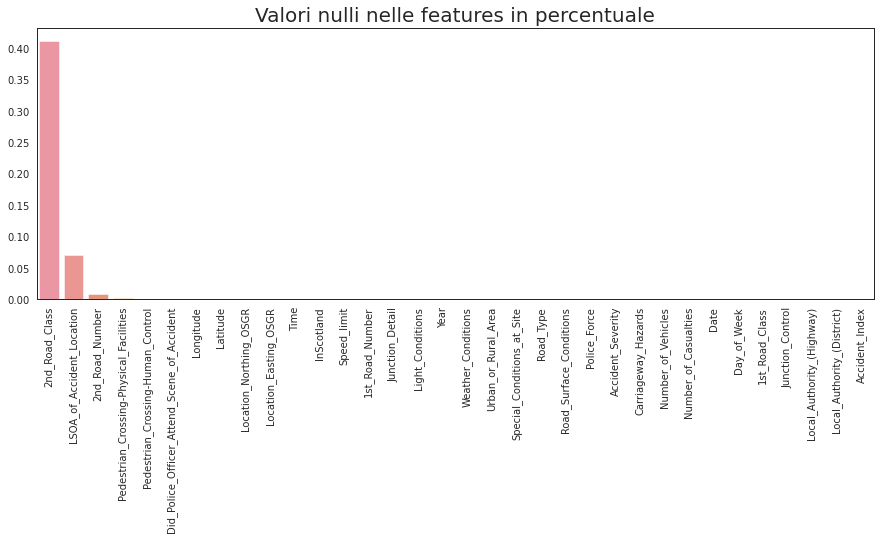

In [4]:
plt.figure(figsize=(15,5))
s = pd.Series(accidents.isnull().sum()/accidents.shape[0]).sort_values(ascending=False)
sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

Si nota come la maggior parte dei valori sono di tipo *object*, ovvero categorici; inoltre in questo grafico a barre sono evidenziate le features che in percentuale rispetto al numero totale di righe, hanno un numero considerevole di valori null. 

#### <b>2.2.2. Vehicle_Information:</b>

In [5]:
vehicles = pd.read_csv('./input/Vehicle_Information.csv', encoding='ISO-8859-1')
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 2177205 
Columns: 24


Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
0  200401BS00001            26 - 35             3.0   
1  200401BS00002            26 - 35             NaN   
2  200401BS00003            26 - 35             4.0   
3  200401BS00003            66 - 75             NaN   
4  200401BS00004            26 - 35             1.0   

          Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC.  \
0                    Urban area                4.0                1588.0   
1                    Urban area                3.0                   NaN   
2  Data missing or out of range                NaN                 998.0   
3  Data missing or out of range                NaN                   NaN   
4                    Urban area                4.0                 124.0   

  Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                      None                       None   
1                      None                       None   
2                      None                       None   
3                      None                       None   
4                      None                       None   

      Journey_Purpose_of_Driver             Junction_Location  \
0  Data missing or out of range  Data missing or out of range   
1  Data missing or out of range  Data missing or out of range   
2  Data missing or out of range  Data missing or out of range   
3  Data missing or out of range  Data missing or out of range   
4  Data missing or out of range  Data missing or out of range   

               make                  model Propulsion_Code Sex_of_Driver  \
0             ROVER         45 CLASSIC 16V          Petrol          Male   
1               BMW                     C1             NaN          Male   
2            NISSAN  MICRA CELEBRATION 16V          Petrol          Male   
3  LONDON TAXIS INT         TXII GOLD AUTO             NaN          Male   
4           PIAGGIO              VESPA ET4          Petrol          Male   

  Skidding_and_Overturning Towing_and_Articulation  \
0                     None     No tow/articulation   
1                     None     No tow/articulation   
2                     None     No tow/articulation   
3                     None     No tow/articulation   
4                     None     No tow/articulation   

  Vehicle_Leaving_Carriageway  Vehicle_Location.Restricted_Lane  \
0   Did not leave carriageway                               0.0   
1   Did not leave carriageway                               0.0   
2   Did not leave carriageway                               0.0   
3   Did not leave carriageway                               0.0   
4   Did not leave carriageway                               0.0   

   Vehicle_Manoeuvre  Vehicle_Reference                Vehicle_Type  \
0  Going ahead other                  2                         109   
1  Going ahead other                  1                         109   
2      Turning right                  1                         109   
3  Going ahead other                  2                         109   
4  Going ahead other                  1  Motorcycle 125cc and under   

    Was_Vehicle_Left_Hand_Drive X1st_Point_of_Impact  Year  
0  Data missing or out of range                Front  2004  
1  Data missing or out of range                Front  2004  
2  Data missing or out of range                Front  2004  
3  Data missing or out of range                Front  2004  
4  Data missing or out of range                Front  2004

In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

Text(0.5, 1.0, 'Valori nulli nelle features in percentuale')

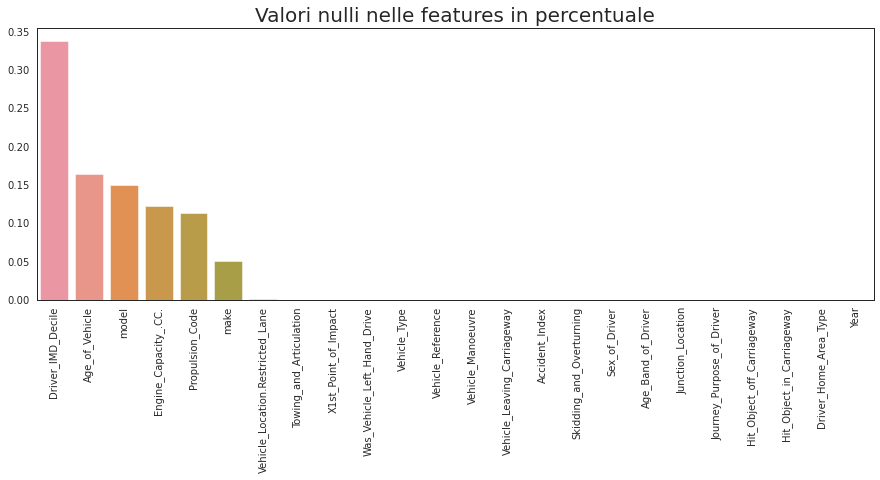

In [7]:
plt.figure(figsize=(15,5))
s = pd.Series(vehicles.isnull().sum()/vehicles.shape[0]).sort_values(ascending=False)
sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

Si nota come la maggior parte dei valori sono di tipo *object*, inoltre in questo grafico a barre sono evidenziate le features che in percentuale rispetto al numero totale di righe, hanno un numero considerevole di valori null.

Si visualizzano alcune informazioni sulla distribuzione delle features:

In [8]:
accidents.describe().T

count           mean  \
1st_Road_Number                              2047254.0     992.105099   
2nd_Road_Number                              2029663.0     372.815342   
Did_Police_Officer_Attend_Scene_of_Accident  2046978.0       1.202319   
Latitude                                     2047082.0      52.559780   
Location_Easting_OSGR                        2047092.0  441446.210036   
Location_Northing_OSGR                       2047092.0  296885.465668   
Longitude                                    2047081.0      -1.410155   
Number_of_Casualties                         2047256.0       1.345843   
Number_of_Vehicles                           2047256.0       1.833525   
Pedestrian_Crossing-Human_Control            2044336.0       0.010417   
Pedestrian_Crossing-Physical_Facilities      2043696.0       0.751802   
Speed_limit                                  2047219.0      38.843597   
Year                                         2047256.0    2010.523806   

                                                       std           min  \
1st_Road_Number                                1809.407936      0.000000   
2nd_Road_Number                                1287.796383      0.000000   
Did_Police_Officer_Attend_Scene_of_Accident       0.408194      1.000000   
Latitude                                          1.445506     49.912941   
Location_Easting_OSGR                         95496.198208  64950.000000   
Location_Northing_OSGR                       160527.257527  10290.000000   
Longitude                                         1.403532     -7.516225   
Number_of_Casualties                              0.817963      1.000000   
Number_of_Vehicles                                0.715054      1.000000   
Pedestrian_Crossing-Human_Control                 0.135113      0.000000   
Pedestrian_Crossing-Physical_Facilities           1.835289      0.000000   
Speed_limit                                      14.147910      0.000000   
Year                                              3.765624   2005.000000   

                                                       25%            50%  \
1st_Road_Number                                   0.000000     118.000000   
2nd_Road_Number                                   0.000000       0.000000   
Did_Police_Officer_Attend_Scene_of_Accident       1.000000       1.000000   
Latitude                                         51.485404      52.237583   
Location_Easting_OSGR                        378063.500000  443050.000000   
Location_Northing_OSGR                       177756.750000  261183.500000   
Longitude                                        -2.329610      -1.362233   
Number_of_Casualties                              1.000000       1.000000   
Number_of_Vehicles                                1.000000       2.000000   
Pedestrian_Crossing-Human_Control                 0.000000       0.000000   
Pedestrian_Crossing-Physical_Facilities           0.000000       0.000000   
Speed_limit                                      30.000000      30.000000   
Year                                           2007.000000    2010.000000   

                                                       75%           max  
1st_Road_Number                                 702.000000  9.999000e+03  
2nd_Road_Number                                   0.000000  9.999000e+03  
Did_Police_Officer_Attend_Scene_of_Accident       1.000000  3.000000e+00  
Latitude                                         53.455902  6.075754e+01  
Location_Easting_OSGR                        524298.250000  6.555400e+05  
Location_Northing_OSGR                       395610.000000  1.208800e+06  
Longitude                                        -0.205260  1.762010e+00  
Number_of_Casualties                              1.000000  9.300000e+01  
Number_of_Vehicles                                2.000000  6.700000e+01  
Pedestrian_Crossing-Human_Control                 0.000000  2.000000e+00  
Pedestrian_Crossing-Physical_Facilities           0.00000

In [9]:
vehicles.describe().T

count         mean          std     min  \
Age_of_Vehicle                    1819056.0     7.108167     4.725886     1.0   
Driver_IMD_Decile                 1442393.0     5.387559     2.821651     1.0   
Engine_Capacity_.CC.              1911344.0  2042.233961  1950.143170     1.0   
Vehicle_Location.Restricted_Lane  2175888.0     0.107304     0.879964     0.0   
Vehicle_Reference                 2177205.0     1.553405     0.775248     1.0   
Year                              2177205.0  2010.934147     3.694375  2004.0   

                                     25%     50%     75%      max  
Age_of_Vehicle                       3.0     7.0    10.0    111.0  
Driver_IMD_Decile                    3.0     5.0     8.0     10.0  
Engine_Capacity_.CC.              1299.0  1598.0  1997.0  96000.0  
Vehicle_Location.Restricted_Lane     0.0     0.0     0.0      9.0  
Vehicle_Reference                    1.0     1.0     2.0     91.0  
Year                              2008.0  2011.0  2014.0   2016.0

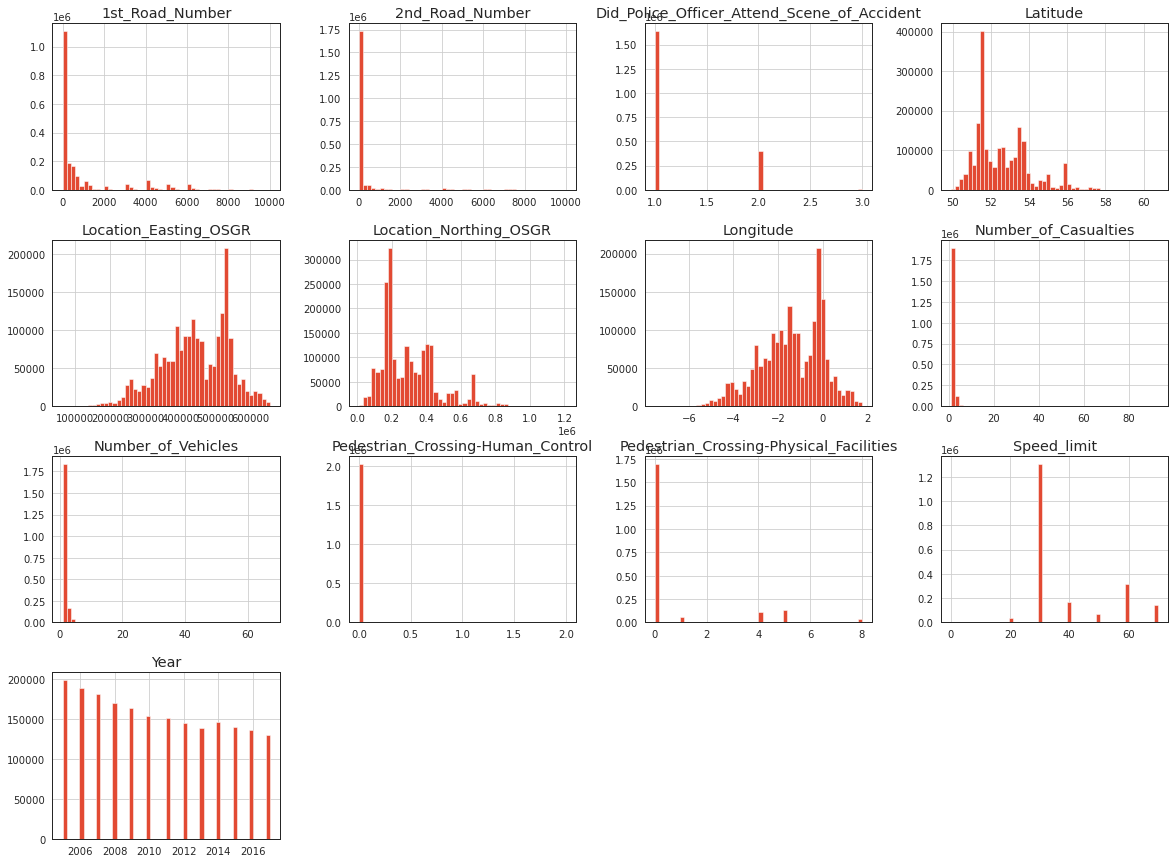

In [10]:
accidents.hist(bins=50, figsize=(20,15))
plt.show()

Già qui si possono fare alcune considerazioni, si nota come *Longitude* e *Location_Easting_OSGR* hanno circa la stessa distribuzione (molto correlati), così vale anche per *Latitude* e *Location_Northing_OSGR*. Questo perchè effettivamente sono due modi diversi di localizzare l'incidente, quindi alla fine hanno lo stesso scopo e perciò per la fase di ML verrà tenuta una solo delle due. Dagli altri grafici altre considerazioni possono essere che la maggior parte degli incidenti ha 0 morti, oppure che la maggior parte degli incidenti sono avvenuti in strade con limiti di velocità pari a 30 mph, ovvero 48 Km/h; quindi ci fa capire che sono avvenuti non in superstrade, a causa della presenza di più veicoli e caos nelle città. Inoltre si può vedere come il numero di incidenti totali sia sceso negli anni.

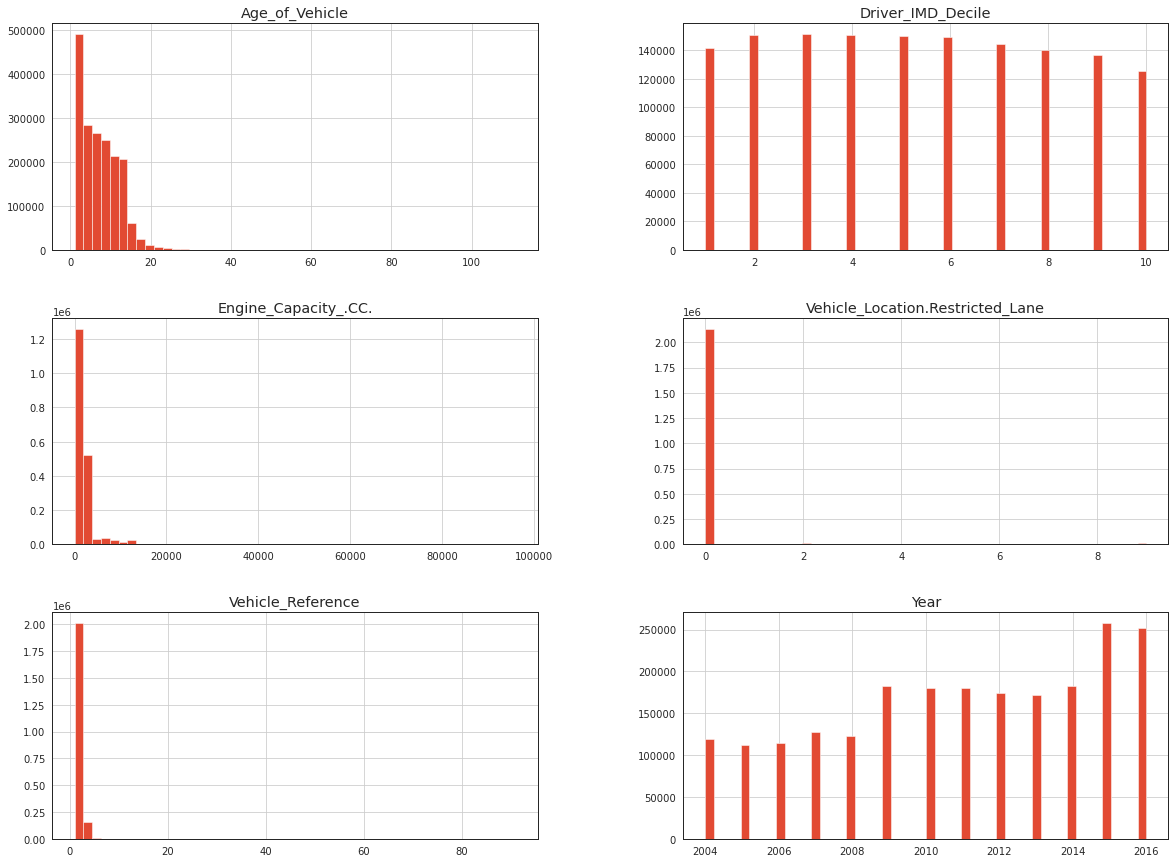

In [11]:
vehicles.hist(bins=50, figsize=(20,15))
plt.show()

In questo caso ad esempio si vede come negli anni il numero di veicoli coinvolti negli incidenti è aumentato.

### <b>2.3. Creazione del Test set</b>

Prima di dividere da subito il training set dal test set, abbiamo necessità di creare un solo dataset. Quindi effettuiamo una inner join tra i due dataset (*accidents* e *vehicles*), in modo tale da aumentare la granularità dei nostri dati, quindi avere non più un insieme di incidenti ma un insieme di veicoli coinvolti in incidenti (ad esempio possono esserci più veicoli coinvolti nello stesso incidente). In questo modo avremo più proprietà interessanti ovvero quelle relative ai veicoli.

In [12]:
print('Accidents:', accidents.shape)
print('Vehicles:', vehicles.shape)
dataset = pd.merge(vehicles, accidents, how="inner")
print('Dataset:', dataset.shape)
dataset.head()

Accidents: (2047256, 34)
Vehicles: (2177205, 24)
Dataset: (2058408, 56)


Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
0  200501BS00002            36 - 45             3.0   
1  200501BS00003            26 - 35             5.0   
2  200501BS00004            46 - 55             4.0   
3  200501BS00005            46 - 55            10.0   
4  200501BS00006            46 - 55             1.0   

          Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC.  \
0  Data missing or out of range                NaN                8268.0   
1                    Urban area                3.0                8300.0   
2                    Urban area                1.0                1769.0   
3  Data missing or out of range                NaN                  85.0   
4                    Urban area                4.0                2976.0   

  Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                      None                       None   
1            Parked vehicle                       None   
2                      None                       None   
3                      Kerb                       None   
4                      None                       None   

   Journey_Purpose_of_Driver                       Junction_Location    make  \
0    Journey as part of work                      Leaving roundabout  DENNIS   
1    Journey as part of work  Not at or within 20 metres of junction  DENNIS   
2  Other/Not known (2005-10)  Not at or within 20 metres of junction  NISSAN   
3  Other/Not known (2005-10)  Not at or within 20 metres of junction   HONDA   
4  Other/Not known (2005-10)  Not at or within 20 metres of junction    AUDI   

                     model Propulsion_Code Sex_of_Driver  \
0                      NaN       Heavy oil          Male   
1                      NaN       Heavy oil          Male   
2           ALMERA SE AUTO          Petrol        Female   
3                      NaN          Petrol          Male   
4  A4 SPORT CABRIOLET AUTO          Petrol          Male   

  Skidding_and_Overturning Towing_and_Articulation  \
0                     None     No tow/articulation   
1                     None     No tow/articulation   
2                     None     No tow/articulation   
3                  Skidded     No tow/articulation   
4                     None     No tow/articulation   

  Vehicle_Leaving_Carriageway  Vehicle_Location.Restricted_Lane  \
0   Did not leave carriageway                               0.0   
1   Did not leave carriageway                               0.0   
2   Did not leave carriageway                               0.0   
3   Did not leave carriageway                               0.0   
4   Did not leave carriageway                               0.0   

             Vehicle_Manoeuvre  Vehicle_Reference  \
0          Slowing or stopping                  1   
1  Going ahead right-hand bend                  1   
2            Going ahead other                  1   
3            Going ahead other                  1   
4                   Moving off                  1   

                           Vehicle_Type Was_Vehicle_Left_Hand_Drive  \
0  Bus or coach (17 or more pass seats)                          No   
1  Bus or coach (17 or more pass seats)                          No   
2                                   Car                          No   
3            Motorcycle 125cc and under                          No   
4                                   Car                          No   

  X1st_Point_of_Impact  Year 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0             Nearside  2005              B            450.0              C   
1             Nearside  2005              C              0.0            NaN   
2                Front  2005              A           3220.0            NaN   
3                Front  2005   Unclassified              0.0            NaN   
4       Did not impact  2005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0 

Notiamo come alcuni veicoli erano riferiti ad incidenti non presenti nel dataset degli incidenti, perchè il nuovo dataset appena creato contiene 2058408 righe al posto di contenere tutte le righe del dataset dei veicoli (2177205).</br>
Inoltre notiamo che il numero di colonne totali del nuovo dataset è pari a 56 invece di 58 (somma colonne dataset incidenti e veicoli) perchè le colonne *Accident_Index* e *Year* sono state prese una sola volta. 

A questo punto la prima cosa da fare è separare una porzione di dati di questo data set per andare a creare il **test set** finale. Mentre la restante parte farà parte del training set. Effettuiamo già adesso la divisione per evitare qualsiasi fenomeno di data snooping.</br>
La scelta del *test_size* è pari a 0.01; questa scelta anche se può sembrare troppo piccola, in realtà è necessaria perchè più avanti la dimensione del training set attraverso tutta la fase di preprocessing diminuirà drasticamente, quindi serviranno in questo momento più tuple nel training set.

In [13]:
train_set, test_set = train_test_split(dataset, test_size=0.01, random_state=42)
train_set.shape, test_set.shape

((2037823, 56), (20585, 56))

<AxesSubplot:>

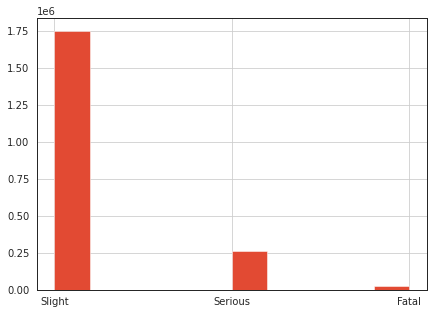

In [14]:
train_set.Accident_Severity.hist(figsize=(7,5))

<AxesSubplot:>

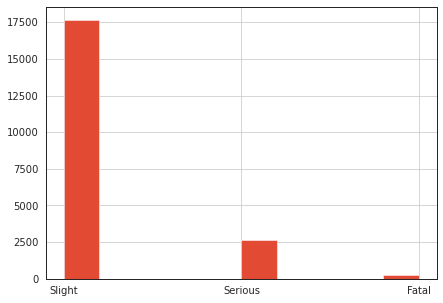

In [15]:
test_set.Accident_Severity.hist(figsize=(7,5))

Si nota come le distribuzioni non sono variate, come quella per la classe target *Accident_Severity*.

## <b>3. Analisi esplorative (extra)</b>

In questo capitolo verranno effettuate alcune analisi esplorative sui dataset, per acquisire ulteriori conoscenze su questi dati, e quindi sugli incidenti avvenuti. Tale fase ricade più in un task di data analysis, per tale motivo si può dire che è una parte extra del progetto. Le analisi saranno effettuate su due dataset inziali (*accients* e *vehicles*).

Innanzitutto grazie agli attributi *Longitude* e *Latitude* si è in grado di geolocalizzare gli incidenti e quindi vedere la loro posizione sulla mappa.</br>
Da notare che sono presenti molti incidenti (raccolti in 13 anni), che se vengono graficati tutti, si noterebbe ad occhio la cartina geografica della Gran Bretagna!</br>
Una prima analisi può essere una visualizzazione della distribuzione degli incidenti nello spazio, grazie alle coordinate spaziali di ogni singolo incidente, si visualizzerà la posizione di ogni incidente:

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

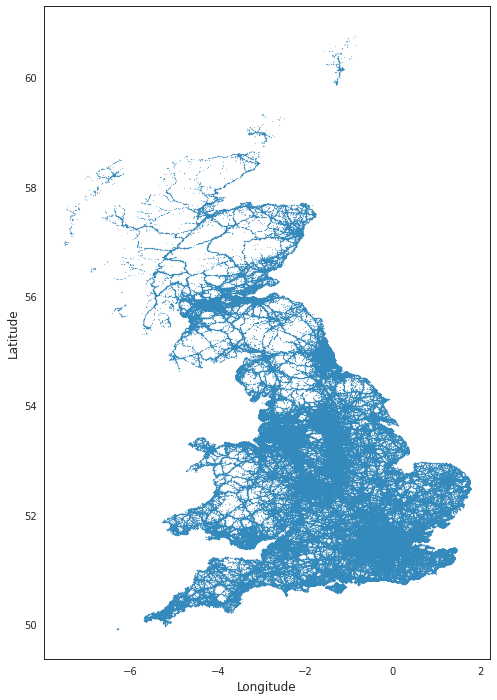

In [16]:
accidents.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=0.5,
    figsize=(8,12),
    sharex=False)

Si nota come i più di 2 milioni di incidenti sono tanti, infatti l'insieme di tutti gli incidenti ricostruiscono proprio la forma della Gran Bretagna!</br>
Per essere più precisi e avere un migliore senso dell'orientamento si plottano i punti sopra la cartina geografica della Gran Bretagna:

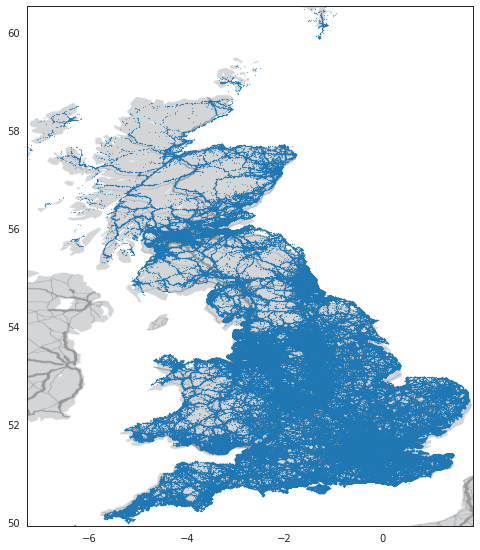

In [17]:
ac2005 = accidents.loc[accidents["Year"] == 2005]
a, b, c, d = ac2005.Longitude.min(), ac2005.Longitude.max(), ac2005.Latitude.min(), ac2005.Latitude.max()

mymap = plt.imread("./img/uk.png")
box = [a+0.1,b+0.1, c, d-0.05]
plt.figure(figsize=(8, 12))
plt.scatter(
    accidents.Longitude, accidents.Latitude, 
    alpha=0.5, 
    s=0.5,
    c="#1f77b4"
)
plt.imshow(mymap, alpha=1, zorder=0, extent=box)

L'immagine di background inserita corrisponde ad una cartina geografica del Regno Unito in cui sono messe in risalto le strade principali (soprattutto le autostrade); infatti si vede come i punti sono distribuiti lungo di esse (verso la Scozia (nord) si nota di più, perchè nel sud ci sono molti più incidenti visto la presenza di città metropolitane come Londra, Manchester, Birminghan, ecc.)

Come è variato il numero di incidenti negli anni?  

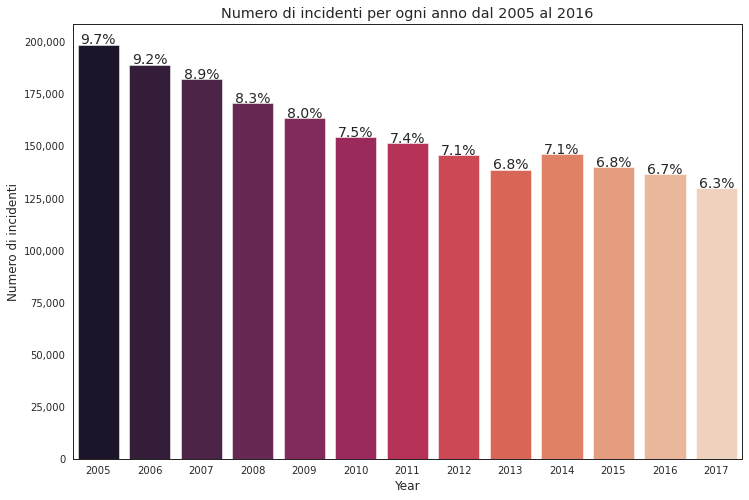

In [18]:
df_byYear = pd.DataFrame(accidents.Year.value_counts().sort_index()).reset_index()
df_byYear.columns = ["Year", "Numero di incidenti"]

plot = sns.barplot(x="Year", y="Numero di incidenti", palette="rocket", data=df_byYear)
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per ogni anno dal 2005 al 2016")

percentage = np.array(df_byYear[["Numero di incidenti"]]/accidents.shape[0] * 100)
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+300
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

Negli anni il numero di incidenti è diminuito; in particolare l'anno 2005 è stato l'anno con più incidenti, mentre il 2017 con meno incidenti.</br>
Segue la posizione degli incidenti sulla mappa dei due anni (2005 e 2017):

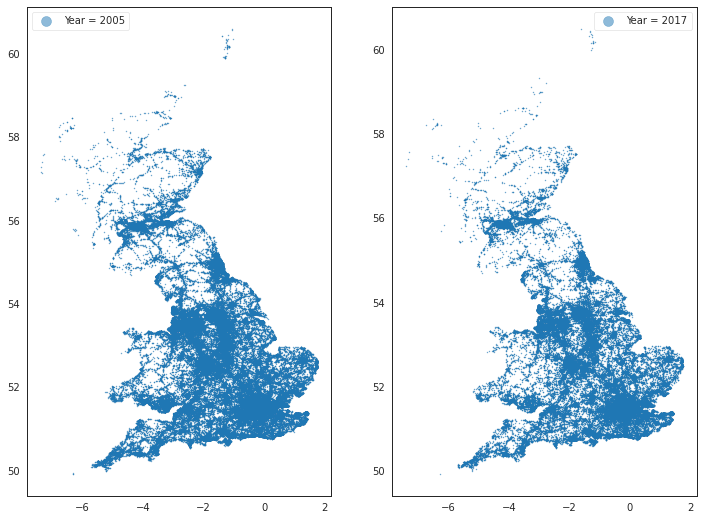

In [19]:
righe=1
colonne=2
f = plt.figure(figsize=(6*colonne,9*righe))
anno = 2005

for i in range(0, righe):
    for j in range(0, colonne):
        acc_Y = accidents.loc[accidents["Year"]==anno]
        ax = plt.subplot2grid((righe, colonne), (i,j))
        l = "Year = " + str(anno)
        ax.scatter(
            acc_Y.Longitude, acc_Y.Latitude, 
            alpha=0.5, 
            s=1, 
            label = l,
            c= "#1f77b4"
        )
        ax.legend(markerscale=10)
        anno += 12
plt.show()

Si nota come nell'anno 2005 sono presenti molti più punti rispetto il 2017.

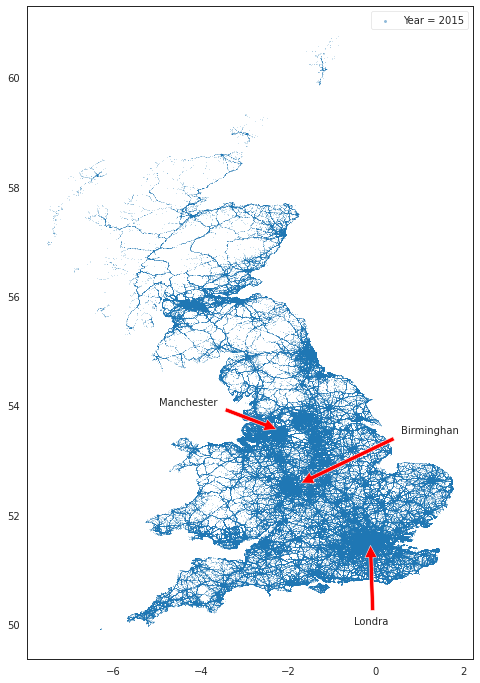

In [20]:
f = plt.figure(figsize=(8,12))

plt.scatter(
    accidents.Longitude, accidents.Latitude, 
    alpha=0.5, 
    s=0.05, 
    label = "Year = 2015",
    c= "#1f77b4"
)
#Londra -> 51.513989036923775, -0.12972395492792754
#Birminghan -> 52.54076987914765, -1.8327262157805437
#Manchester -> 53.55411409487268, -2.2133829968685537
plt.annotate('Londra ', xy=(-0.129, 51.513), xytext=(-0.5, 50), xycoords='data',
    arrowprops=dict(facecolor='red', shrink=0.05),
)
plt.annotate('Birminghan ', xy=(-1.83, 52.54), xytext=(0.58, 53.5), xycoords='data',
    arrowprops=dict(facecolor='red', shrink=0.05),
)
plt.annotate('Manchester ', xy=(-2.21, 53.55), xytext=(-4.97, 54), xycoords='data',
    arrowprops=dict(facecolor='red', shrink=0.05),
)
plt.legend(markerscale=10)
plt.show()

Sono state evidenziate le posizioni di alcune città importanti quali Londra, Manchester e Birminghan; e come si può vedere in queste posizioni (soprattutto Londra), gli incidenti sono molto più densi; dovuti proprio dal fatto che nelle città ci sono tantissimi veicoli in circolazione.

Si possono continuare le analisi spaziali identificando le autorità che sono intervenute in quei particolari incidenti, ovvero le contee in cui sono avvenuti gli incidenti. Queste si dividono per *district* e *highway*; di seguito sono mostrati i grafici delle prime 20 contee con maggiori incidenti per ciascuna delle due categorie; inoltre verranno evidenziati anche la loro posizione sulla mappa con diversi colori in modo tale da riconoscere effettivamente l'area di competenza della particolare contea.

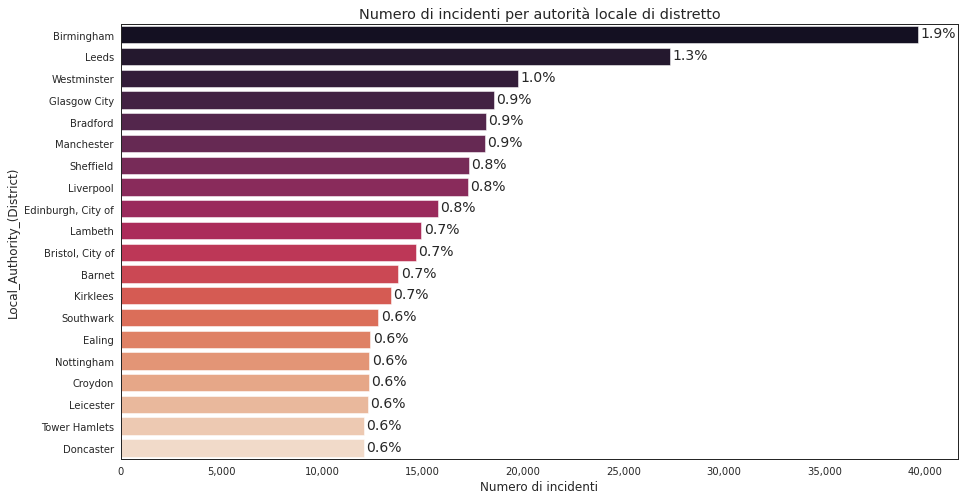

In [21]:
f = plt.figure(figsize=(15,8))

df_byLAD = pd.DataFrame(accidents["Local_Authority_(District)"].value_counts().sort_index()).reset_index()
df_byLAD.columns = ["Local_Authority_(District)", "Numero di incidenti"]
df_byLAD = df_byLAD.sort_values(ascending=False, by=["Numero di incidenti"])[0:20]

plot = sns.barplot(x="Numero di incidenti", y="Local_Authority_(District)", palette="rocket", data=df_byLAD)
plot.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per autorità locale di distretto")

percentage = np.array(df_byLAD[["Numero di incidenti"]]/accidents.shape[0] * 100)
patches = plot.patches

for i in range(len(patches)):
    y = patches[i].get_y() + patches[i].get_height()/1.5
    x = patches[i].get_width()+1000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

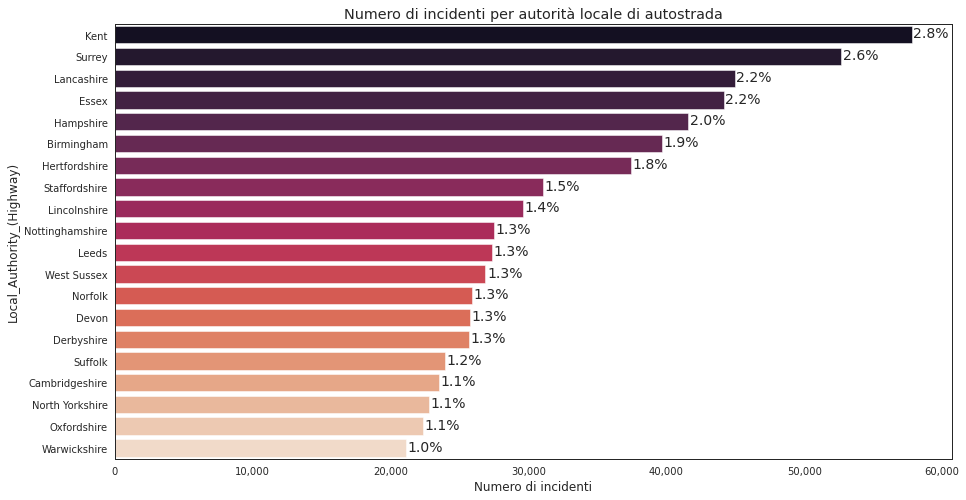

In [22]:
f = plt.figure(figsize=(15,8))

df_byLA = pd.DataFrame(accidents["Local_Authority_(Highway)"].value_counts().sort_index()).reset_index()
df_byLA.columns = ["Local_Authority_(Highway)", "Numero di incidenti"]
df_byLA = df_byLA.sort_values(ascending=False, by=["Numero di incidenti"])[0:20]

plot = sns.barplot(x="Numero di incidenti", y="Local_Authority_(Highway)", palette="rocket", data=df_byLA)
plot.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per autorità locale di autostrada")

percentage = np.array(df_byLA[["Numero di incidenti"]]/accidents.shape[0] * 100)
patches = plot.patches

for i in range(len(patches)):
    y = patches[i].get_y() + patches[i].get_height()/1.5
    x = patches[i].get_width()+1400
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

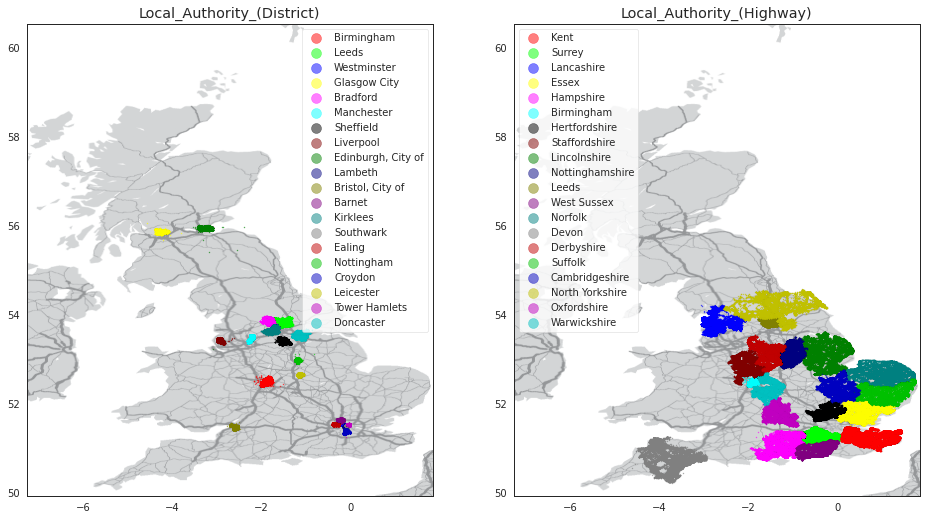

In [23]:
f = plt.figure(figsize=(16,12))

colors = [
    "#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#000000", 
    "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#808080", 
    "#C00000", "#00C000", "#0000C0", "#C0C000", "#C000C0", "#00C0C0", "#C0C0C0", 
    "#400000", "#004000", "#000040", "#404000", "#400040", "#004040", "#404040", 
    "#200000", "#002000", "#000020", "#202000", "#200020", "#002020", "#202020", 
    "#600000", "#006000", "#000060", "#606000", "#600060", "#006060", "#606060", 
    "#A00000", "#00A000", "#0000A0", "#A0A000", "#A000A0", "#00A0A0", "#A0A0A0", 
    "#E00000", "#00E000", "#0000E0", "#E0E000", "#E000E0", "#00E0E0", "#E0E0E0", 
]

localAuth = df_byLAD["Local_Authority_(District)"].values
ax = plt.subplot2grid((1, 2), (0,0))
ax.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Local_Authority_(District)")
for i in range(0, 20):
    acc_LA = accidents.loc[accidents["Local_Authority_(District)"]==localAuth[i]]
    ax.scatter(
        acc_LA.Longitude, acc_LA.Latitude, 
        alpha=0.5, 
        s=1, 
        label = localAuth[i],
        c=colors[i]
    )
ax.legend(markerscale=10)

localAuth = df_byLA["Local_Authority_(Highway)"].values
ax2 = plt.subplot2grid((1, 2), (0,1))
ax2.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Local_Authority_(Highway)")
for i in range(0, 20):
    acc_LA = accidents.loc[accidents["Local_Authority_(Highway)"]==localAuth[i]]
    ax2.scatter(
        acc_LA.Longitude, acc_LA.Latitude, 
        alpha=0.5, 
        s=1,
        label = localAuth[i],
        c=colors[i]
    )
ax2.legend(markerscale=10)

plt.show()

Come varia il numero di incidenti per le diverse categorie stradali? (si rimanda al seguente link per capire meglio la classificazione delle strade nel Regno Unito: https://en.wikipedia.org/wiki/Road_hierarchy):

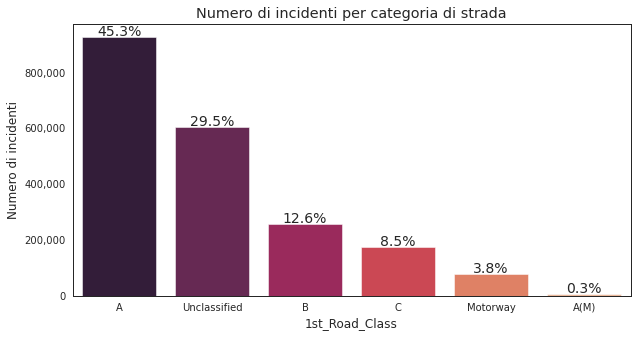

In [24]:
f = plt.figure(figsize=(10,5))

df_byR = pd.DataFrame(accidents['1st_Road_Class'].value_counts().sort_index()).reset_index()
df_byR.columns = ["1st_Road_Class", "Numero di incidenti"]
df_byR = df_byR.sort_values(ascending=False, by=["Numero di incidenti"])[0:20]

plot = sns.barplot(x="1st_Road_Class", y="Numero di incidenti", palette="rocket", data=df_byR)
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per categoria di strada")

percentage = np.array(df_byR[["Numero di incidenti"]]/accidents.shape[0] * 100)
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+5000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

La categoria con maggiori incidenti è la categoria A (45.3% degli incidenti), per capire bene di che tipologie di strade sono, vengono plottati sulla cartina gli incidenti avvenuti in strade di categoria A:

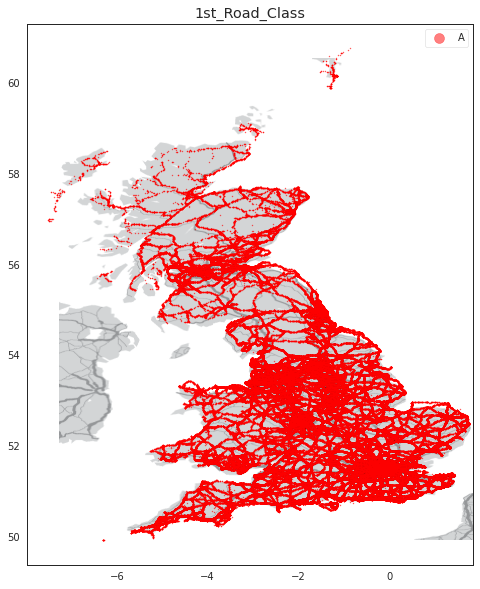

In [25]:
f = plt.figure(figsize=(8,12))

localAuth = df_byR["1st_Road_Class"].values

plt.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("1st_Road_Class")
i=0
acc_R = accidents.loc[accidents["1st_Road_Class"]==localAuth[i]]
plt.scatter(
    acc_R.Longitude, acc_R.Latitude, 
    alpha=0.5, 
    s=1, 
    label = localAuth[i],
    c=colors[i]
)
plt.legend(markerscale=10)

plt.show()

Come si può vedere si ha un riscontro geografico delle strade di categoria A; mentre le *Motorway* che sarebbero le strade più importanti (con più di 3 corsie) hanno giustamente meno incidenti essendo di meno. Ecco gli incidenti avvenuti nelle *Motorway*:

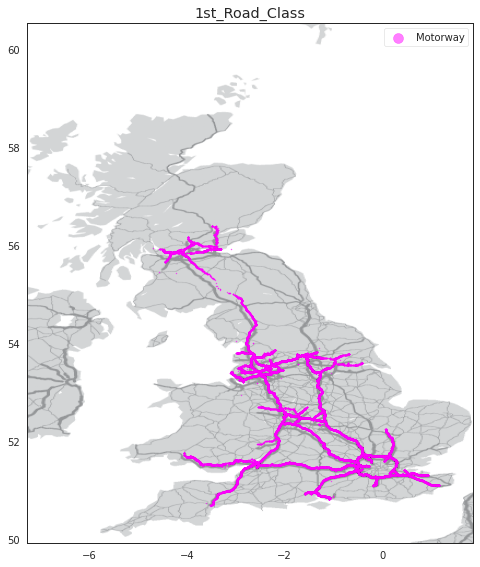

In [26]:
f = plt.figure(figsize=(8,12))

localAuth = df_byR["1st_Road_Class"].values

plt.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("1st_Road_Class")
#for i in range(len(localAuth)):
i=4
acc_R = accidents.loc[accidents["1st_Road_Class"]==localAuth[i]]
plt.scatter(
    acc_R.Longitude, acc_R.Latitude, 
    alpha=0.5, 
    s=1, 
    label = localAuth[i],
    c=colors[i]
)
plt.legend(markerscale=10)

plt.show()

In che tipo di strada avvengono maggiormente gli incidenti? (*Road_Type*):

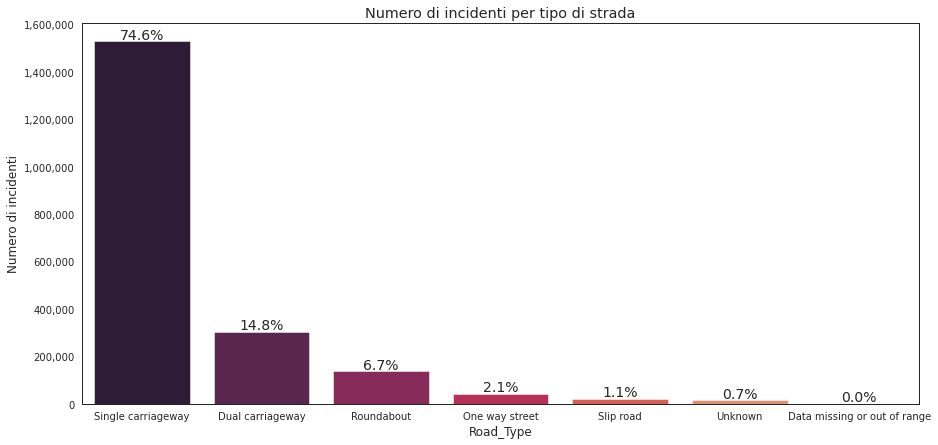

In [27]:
f = plt.figure(figsize=(15,7))

df_byRT = pd.DataFrame(accidents['Road_Type'].value_counts().sort_index()).reset_index()
df_byRT.columns = ["Road_Type", "Numero di incidenti"]
df_byRT = df_byRT.sort_values(ascending=False, by=["Numero di incidenti"])[0:20]

plot = sns.barplot(x="Road_Type", y="Numero di incidenti", palette="rocket", data=df_byRT)
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per tipo di strada")

percentage = np.array(df_byRT[["Numero di incidenti"]]/accidents.shape[0] * 100)
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+10000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

In questo caso il numero maggiore di incidenti si ha per strade a singola carreggiata (74,6%) seguito da strade a doppia carreggiata (14,8%), seguito anche dalle rotatoie (6.7%) e cos' via...</br>
Si visualizza sulla cartina:

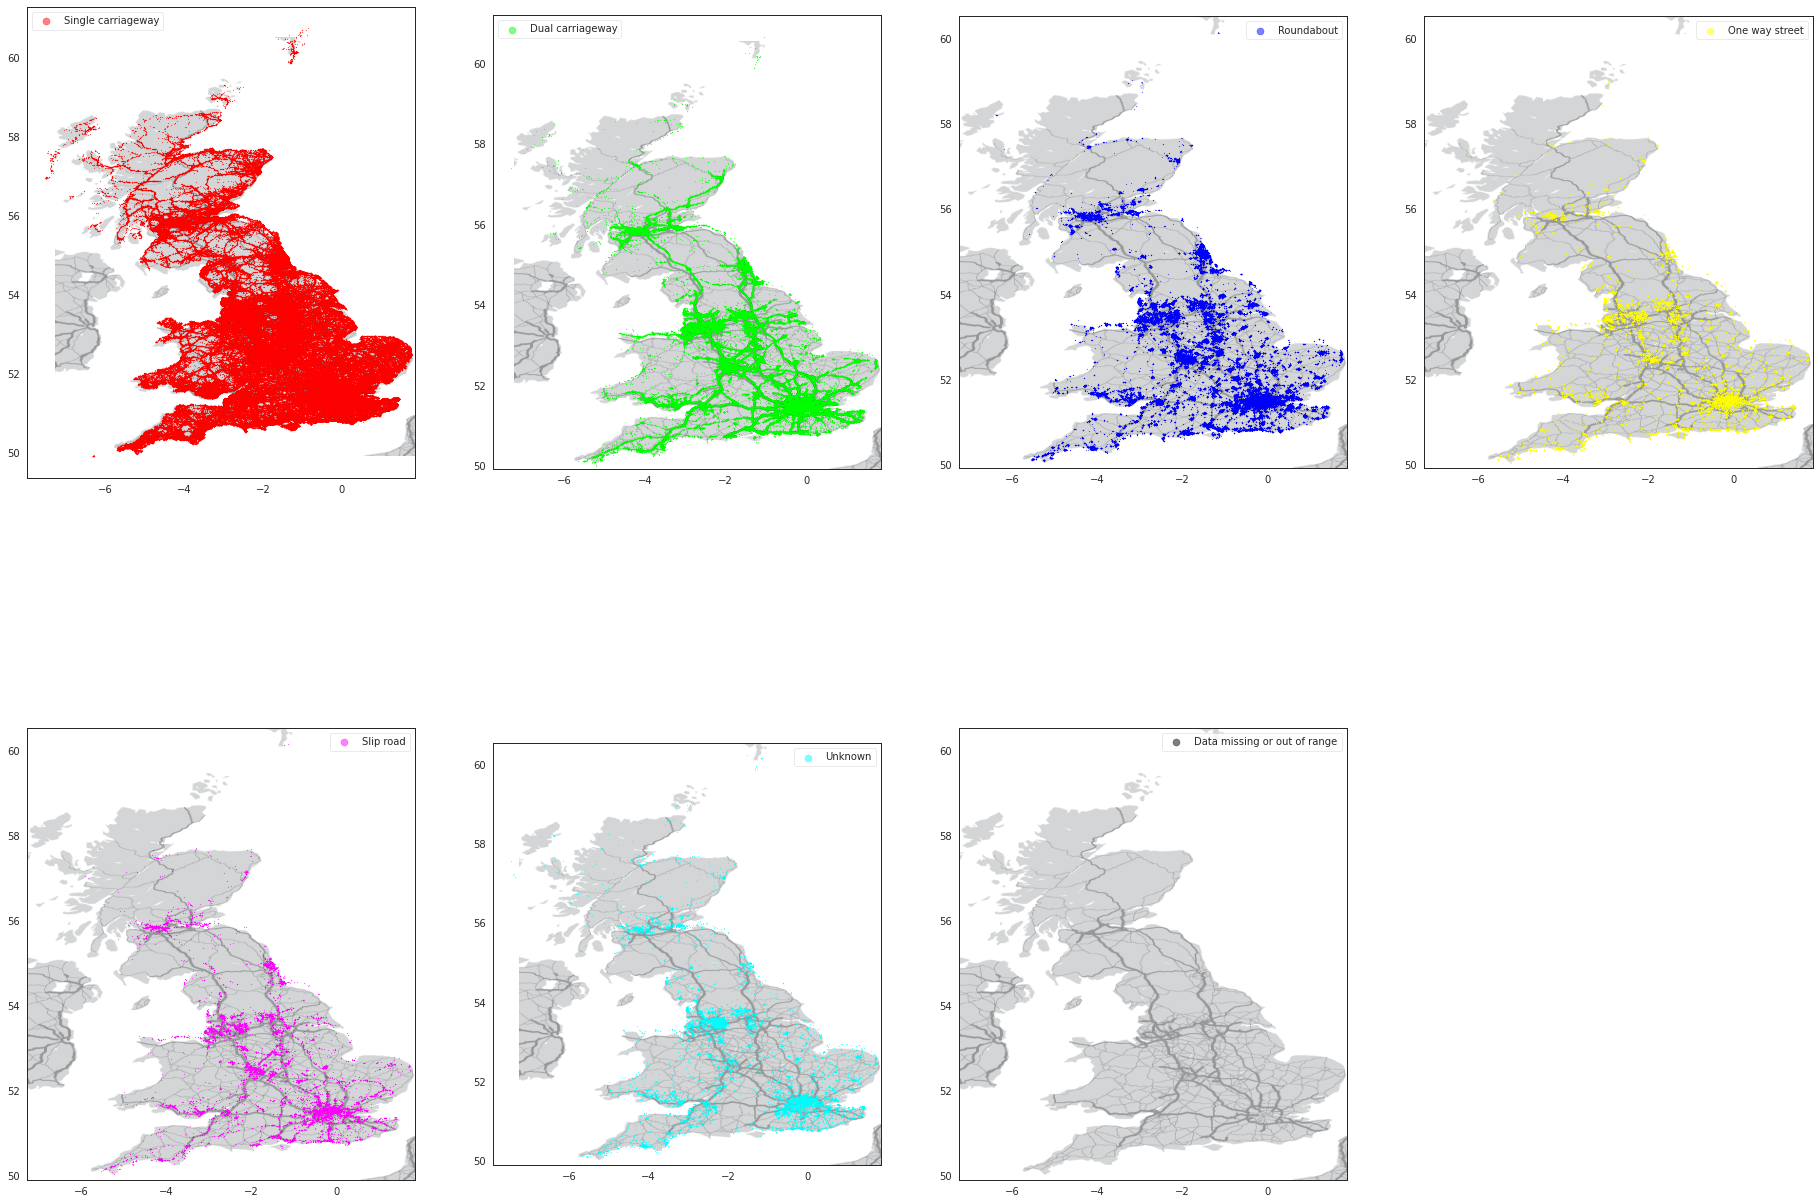

In [28]:
typeRoad = df_byRT["Road_Type"].values

righe=2
colonne=4
f = plt.figure(figsize=(8*colonne,12*righe))
k=0

for i in range(0, righe):
    for j in range(0, colonne):
        if k<len(typeRoad):
            acc_R = accidents.loc[accidents["Road_Type"]==typeRoad[k]]
            ax = plt.subplot2grid((righe, colonne), (i,j))
            ax.imshow(mymap, alpha=1, zorder=0, extent=box)
            ax.scatter(
                acc_R.Longitude, acc_R.Latitude, 
                alpha=0.5, 
                s=0.5,
                label = typeRoad[k],
                c= colors[k]
            )
            ax.legend(markerscale=10)
            k += 1
plt.show()

Caso interessante, gli incidenti avvenuti sulle rotatoie, geograficamente sono punti concentrati rispetto quelli avvenuti ad esempio nelle strade a singola carreggiata.

Come varia il numero di incidenti in base ai limiti di velocità? (*Speed_Limit*):

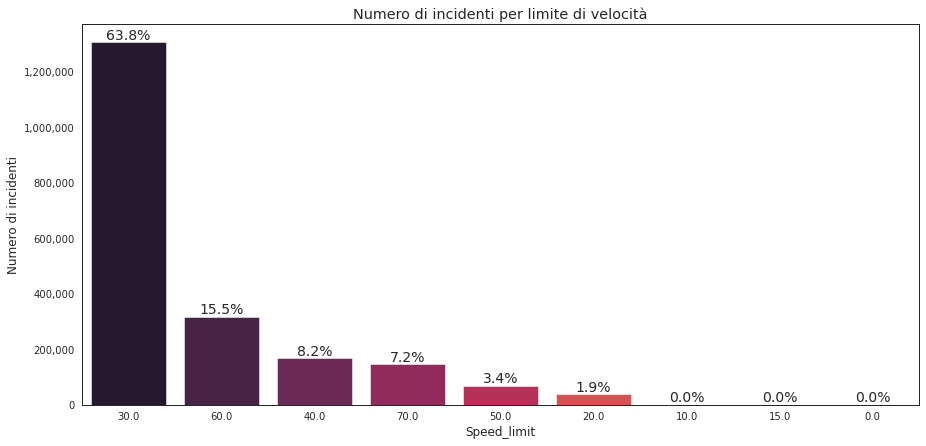

In [29]:
f = plt.figure(figsize=(15,7))

df_bySL = pd.DataFrame(accidents['Speed_limit'].value_counts().sort_index()).reset_index()
df_bySL.columns = ["Speed_limit", "Numero di incidenti"]
df_bySL = df_bySL.sort_values(ascending=False, by=["Numero di incidenti"])[0:20]

plot = sns.barplot(x="Speed_limit", y="Numero di incidenti", palette="rocket", data=df_bySL, order=df_bySL["Speed_limit"])
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per limite di velocità")

percentage = np.array(df_bySL[["Numero di incidenti"]]/accidents.shape[0] * 100)
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+10000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)


Il 63.8% degli incidenti è avvenuto in strade con limite di velocità 30 mph, ossia circa 48 km/h; che non è una velocità elevata... Ma questo è dovuto proprio al fatto che tali limiti si trovano più in strade vicino le città e quindi con un numero molto più elevato di veicoli in circolazione.

Per rendersi conto meglio che strade con limiti di velocità più bassi sono nelle città o nei pressi delle città, rispetto le strade con alti limiti di velocità (es. 70 mph) che si trovano più distanti dalle metropoli (autostrade, ecc.); si plottano le due cartine con i due limiti di velocità (limite minimo e limite massimo):

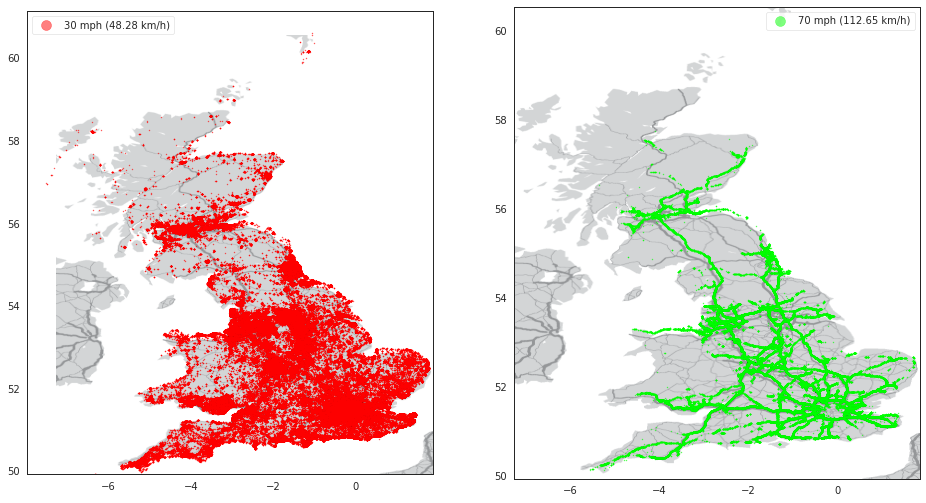

In [30]:
righe=1
colonne=2
f = plt.figure(figsize=(8*colonne,12*righe))

acc_S = accidents.loc[accidents["Speed_limit"]==30]
ax = plt.subplot2grid((righe, colonne), (0,0))
ax.imshow(mymap, alpha=1, zorder=0, extent=box)
ax.scatter(
    acc_S.Longitude, acc_S.Latitude, 
    alpha=0.5, 
    s=1,
    label = "30 mph (48.28 km/h)",
    c= colors[0]
)
ax.legend(markerscale=10)

acc_S = accidents.loc[accidents["Speed_limit"]==70]
ax = plt.subplot2grid((righe, colonne), (0,1))
ax.imshow(mymap, alpha=1, zorder=0, extent=box)
ax.scatter(
    acc_S.Longitude, acc_S.Latitude, 
    alpha=0.5, 
    s=1,
    label = "70 mph (112.65 km/h)",
    c= colors[1]
)
ax.legend(markerscale=10)

plt.show()

Come volevasi dimostrare nella mappa a destra si notano molto di più le strade (autostrade), rispetto quella di sinistra. Ad esempio il centro di Londra è presente nella mappa a sinistra e non in quella in destra.

Come varia il numero di morti (*Number_of_Casualties*) al variare dei limiti di velocità? Ci si aspetta che per strade con limiti maggiori di velocità ci siano più morti. Si controllerà il numero di morti relativo, ovvero il rapporto della somma del numero di morti per il numero di incidenti raggruppati per limiti di velocità:

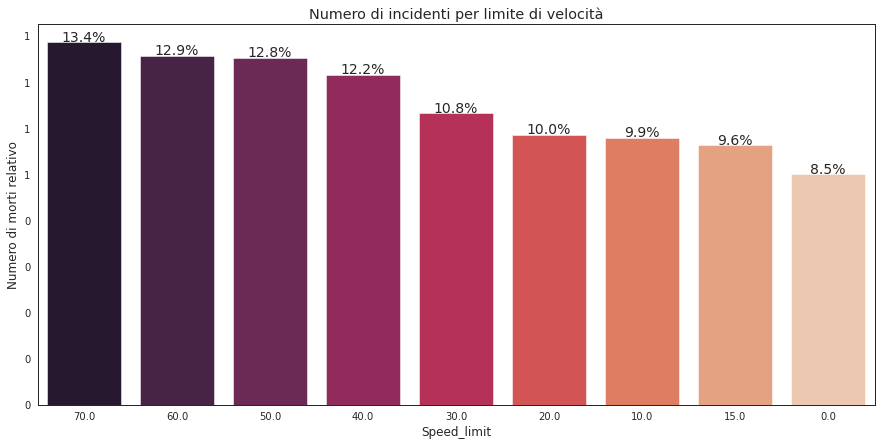

In [31]:
f = plt.figure(figsize=(15,7))

df_bySLM = accidents.groupby("Speed_limit", as_index=False).agg({"Number_of_Casualties": np.sum, "Accident_Index": np.size})
df_bySLM.columns = ["Speed_limit", "Numero di morti", "Numero di incidenti"]
df_bySLM['Numero di morti relativo'] = df_bySLM.apply(lambda row: row["Numero di morti"] / row["Numero di incidenti"], axis=1)
df_bySLM.sort_values(by=["Numero di morti relativo"], inplace=True, ascending=False)

plot = sns.barplot(x="Speed_limit", y="Numero di morti relativo", palette="rocket", data=df_bySLM, order=df_bySLM["Speed_limit"])
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti per limite di velocità")

percentage = np.array(df_bySLM[["Numero di morti relativo"]]/df_bySLM["Numero di morti relativo"].sum() * 100)
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+0.005
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)


Come ci si aspettava, il numero di morti relativo si ha per strade con limiti di velocità più alti; proprio perchè all'aumentare delle velocità c'è più probabilità di morire in caso di incidente.

Dove si trovano i 10 incidenti con il maggior numero di morti e con il maggior numero di veicoli coinvolti (*Number_of_Vehicles*):

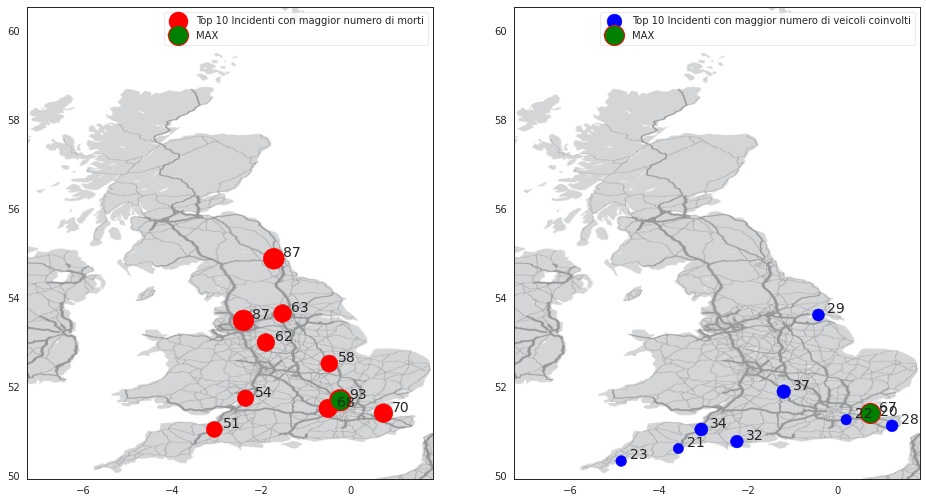

Massimo numero di morti in un incidente: 93
Massimo numero di veicoli coinvolti in un incidente: 67


In [32]:
righe=1
colonne=2
f = plt.figure(figsize=(8*colonne,12*righe))

acc_casualties = accidents.sort_values(ascending=False, by=["Number_of_Casualties"])[0:10]
ax = plt.subplot2grid((righe, colonne), (0,0))
ax.imshow(mymap, alpha=1, zorder=0, extent=box)
ax.scatter(
    acc_casualties.Longitude, acc_casualties.Latitude, 
    alpha=1, 
    s=5*acc_casualties["Number_of_Casualties"],
    label = "Top 10 Incidenti con maggior numero di morti",
    c= colors[0]
)
ax.plot(acc_casualties.Longitude.values[0], acc_casualties.Latitude.values[0], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green", label="MAX")
ax.legend(markerscale=1)
for i, txt in enumerate(acc_casualties.Number_of_Casualties.values):
    ax.annotate(txt, (acc_casualties.Longitude.values[i]+0.2, acc_casualties.Latitude.values[i]+0.05), fontsize=14)

acc_vehicles = accidents.sort_values(ascending=False, by=["Number_of_Vehicles"])[0:10]
ax = plt.subplot2grid((righe, colonne), (0,1))
ax.imshow(mymap, alpha=1, zorder=0, extent=box)
ax.scatter(
    acc_vehicles.Longitude, acc_vehicles.Latitude, 
    alpha=1, 
    s=5*acc_vehicles["Number_of_Vehicles"],
    label = "Top 10 Incidenti con maggior numero di veicoli coinvolti",
    c= colors[2]
)
ax.plot(acc_vehicles.Longitude.values[0], acc_vehicles.Latitude.values[0], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green", label="MAX")
ax.legend(markerscale=1)
for i, txt in enumerate(acc_vehicles.Number_of_Vehicles.values):
    ax.annotate(txt, (acc_vehicles.Longitude.values[i]+0.2, acc_vehicles.Latitude.values[i]+0.05), fontsize=14)

plt.show()
print("Massimo numero di morti in un incidente:", acc_casualties.Number_of_Casualties.values[0])
print("Massimo numero di veicoli coinvolti in un incidente:", acc_vehicles.Number_of_Vehicles.values[0])


Come è variato invece, il numero di morti negli anni:

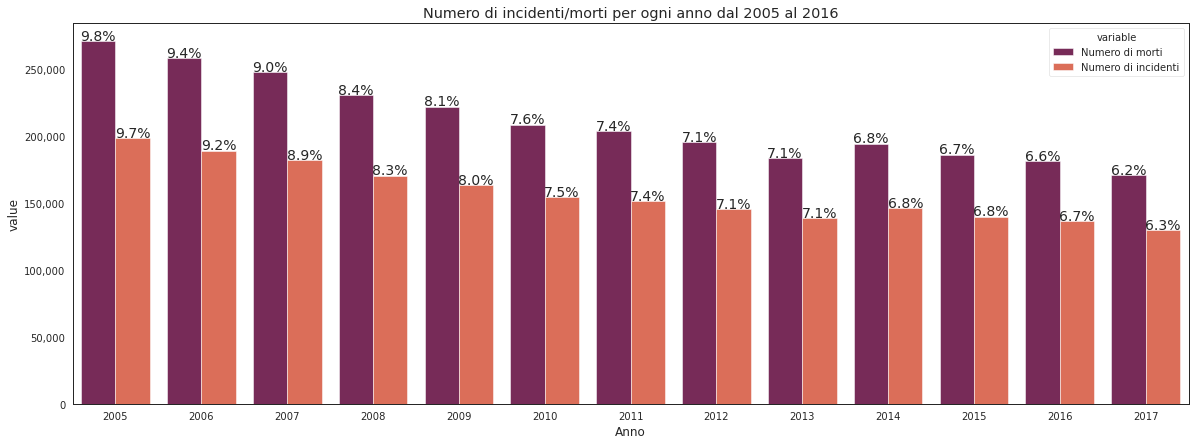

In [33]:
f = plt.figure(figsize=(20,7))

df_byYearSev = accidents.groupby("Year", as_index=False).agg({"Number_of_Casualties": np.sum, "Accident_Index": np.size})
df_byYearSev.columns = ["Anno", "Numero di morti", "Numero di incidenti"]
df_byYearSev.sort_values(by=["Numero di incidenti"], inplace=True, ascending=False)

plot = sns.barplot(data=df_byYearSev.melt(id_vars='Anno', value_vars=['Numero di morti', 'Numero di incidenti']), x='Anno', y='value', hue='variable', palette="rocket")
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti/morti per ogni anno dal 2005 al 2016")

percentage = np.array(df_byYearSev[["Numero di morti"]]/accidents["Number_of_Casualties"].sum() * 100)
percentage = np.concatenate((percentage, np.array(df_byYearSev[["Numero di incidenti"]]/accidents.shape[0] * 100)))
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)


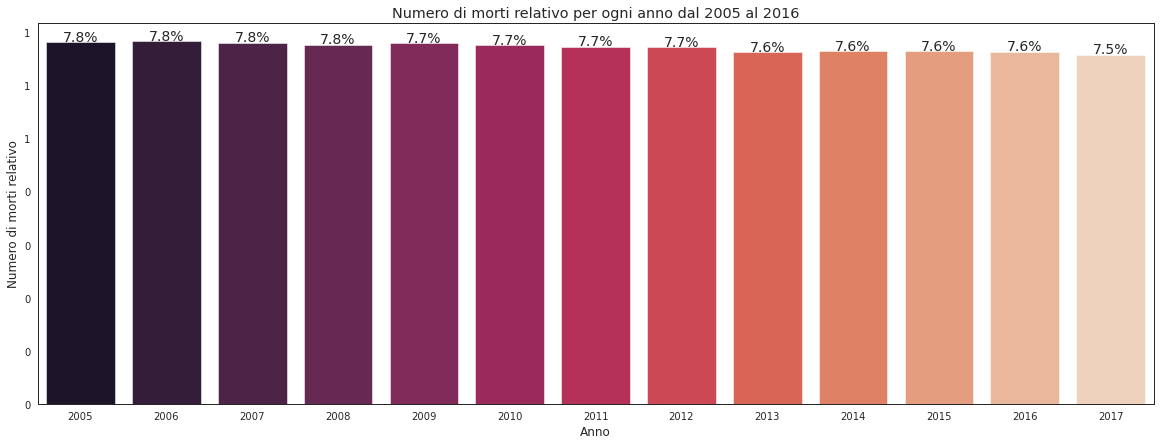

In [34]:
f = plt.figure(figsize=(20,7))

df_byYearSev['Numero di morti relativo'] = df_byYearSev.apply(lambda row: row["Numero di morti"] / row["Numero di incidenti"], axis=1)
df_byYearSev.sort_values(by=["Numero di morti relativo"], inplace=True, ascending=False)

plot = sns.barplot(x="Anno", y="Numero di morti relativo", palette="rocket", data=df_byYearSev)
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di morti relativo per ogni anno dal 2005 al 2016")

percentage = np.array(df_byYearSev[["Numero di morti relativo"]]/df_byYearSev["Numero di morti relativo"].sum() * 100)
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+0.005
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

Il numero di morti ha avuto un andamento quasi costante negli anni.

Come variano il numero di morti e di incidenti nei mesi?

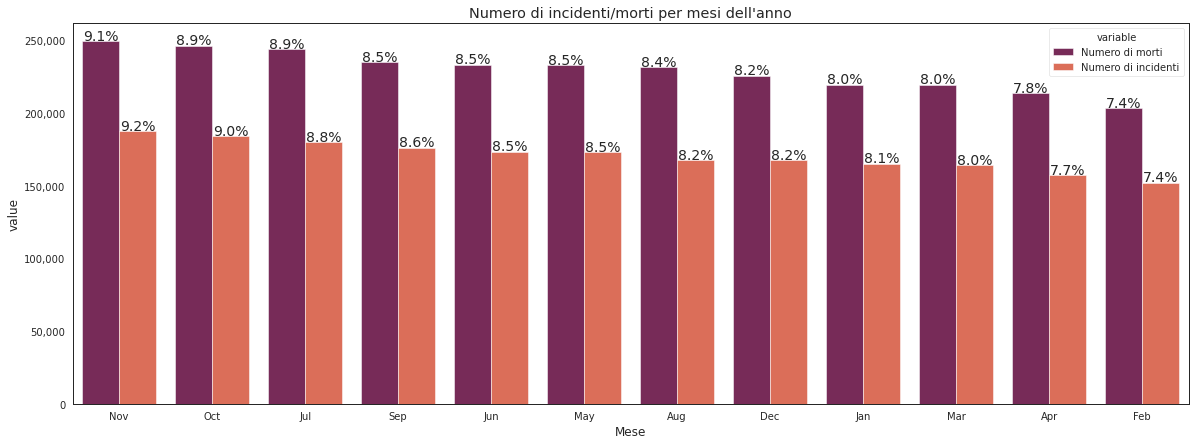

In [35]:
accidents['Month'] = pd.DatetimeIndex(accidents['Date']).month
accidents['Month'] = accidents['Month'].apply(lambda x: calendar.month_abbr[x])

f = plt.figure(figsize=(20,7))

df_byMonth = accidents.groupby("Month", as_index=False).agg({"Number_of_Casualties": np.sum, "Accident_Index": np.size})
df_byMonth.columns = ["Mese", "Numero di morti", "Numero di incidenti"]
df_byMonth.sort_values(by=["Numero di incidenti"], inplace=True, ascending=False)

plot = sns.barplot(data=df_byMonth.melt(id_vars='Mese', value_vars=['Numero di morti', 'Numero di incidenti']), x='Mese', y='value', hue='variable', palette="rocket")
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti/morti per mesi dell'anno")

percentage = np.array(df_byMonth[["Numero di morti"]]/accidents["Number_of_Casualties"].sum() * 100)
percentage = np.concatenate((percentage, np.array(df_byMonth[["Numero di incidenti"]]/accidents.shape[0] * 100)))
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

accidents.drop(labels='Month', axis=1, inplace=True)

Il mese di novembre è stato quello con maggiori incidenti, seguito da ottobre, luglio ecc.

Come variano il numero di morti e di incidenti nei giorni della settimana?

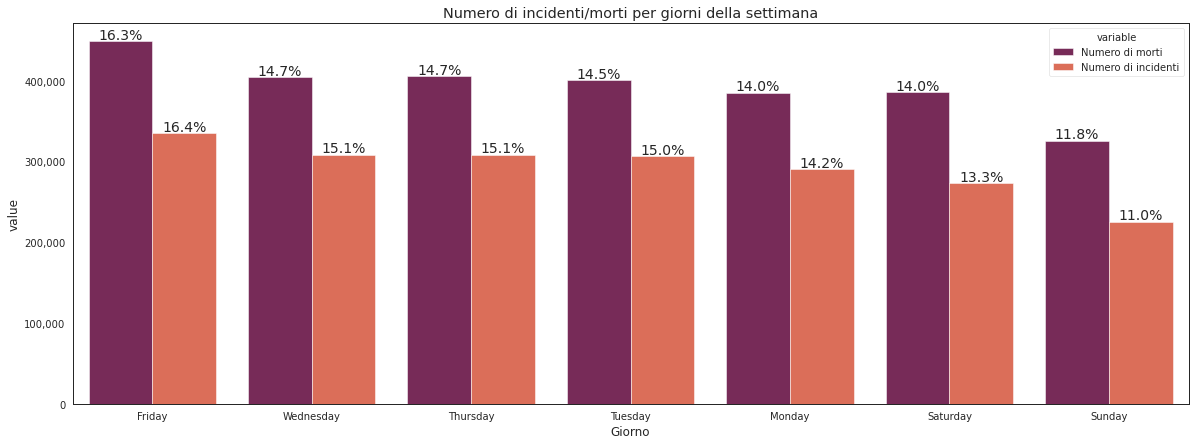

In [36]:
f = plt.figure(figsize=(20,7))

df_byWeek = accidents.groupby("Day_of_Week", as_index=False).agg({"Number_of_Casualties": np.sum, "Accident_Index": np.size})
df_byWeek.columns = ["Giorno", "Numero di morti", "Numero di incidenti"]
df_byWeek.sort_values(by=["Numero di incidenti"], inplace=True, ascending=False)

plot = sns.barplot(data=df_byWeek.melt(id_vars='Giorno', value_vars=['Numero di morti', 'Numero di incidenti']), x='Giorno', y='value', hue='variable', palette="rocket")
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti/morti per giorni della settimana")

percentage = np.array(df_byWeek[["Numero di morti"]]/accidents["Number_of_Casualties"].sum() * 100)
percentage = np.concatenate((percentage, np.array(df_byWeek[["Numero di incidenti"]]/accidents.shape[0] * 100)))
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+3000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

Il giorno della settimana con più incidenti (e anche morti) è il venerdì; molto probabile perchè il venerdì ci sono più spostamenti dovuti per la fine settimana lavorativa.

Come variano il numero di morti e di incidenti nelle ore della giornata?

In [37]:
accidents['Time_Interval'] = pd.to_datetime(accidents['Time'])
accidents['Time_Interval'] = accidents['Time_Interval'].dt.strftime('%H')

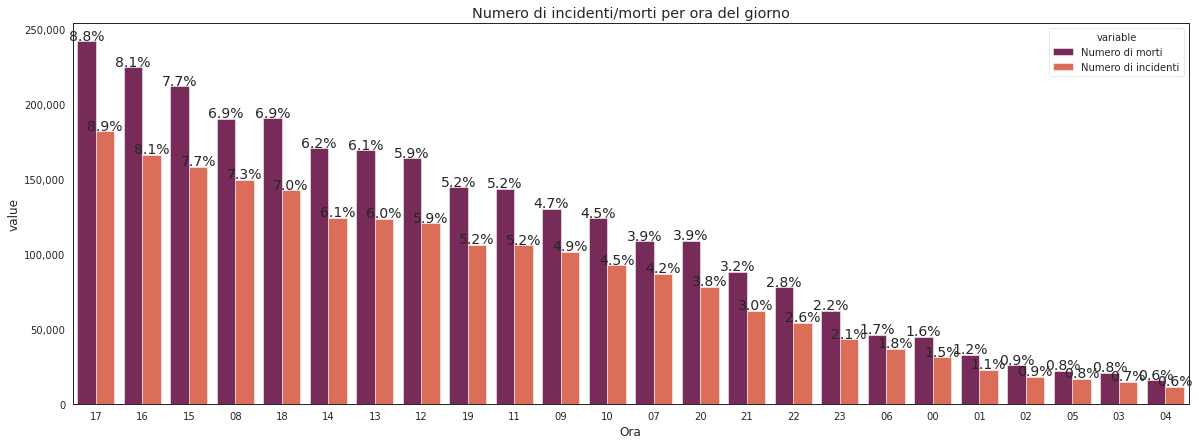

In [38]:
f = plt.figure(figsize=(20,7))

df_byHour = accidents.groupby("Time_Interval", as_index=False).agg({"Number_of_Casualties": np.sum, "Accident_Index": np.size})
df_byHour.columns = ["Ora", "Numero di morti", "Numero di incidenti"]
df_byHour.sort_values(by=["Numero di incidenti"], inplace=True, ascending=False)

plot = sns.barplot(data=df_byHour.melt(id_vars='Ora', value_vars=['Numero di morti', 'Numero di incidenti']), x='Ora', y='value', hue='variable', palette="rocket")
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Numero di incidenti/morti per ora del giorno")

percentage = np.array(df_byHour[["Numero di morti"]]/accidents["Number_of_Casualties"].sum() * 100)
percentage = np.concatenate((percentage, np.array(df_byHour[["Numero di incidenti"]]/accidents.shape[0] * 100)))
patches = plot.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1000
    plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

accidents.drop(labels='Time_Interval', axis=1, inplace=True)

Il maggior numero di incidenti/morti si hanno nel pomeriggio; ancora una volta una possibile motivazione può essere la maggiore affluenza dei veicoli in quelle ore (molti escono da lavoro). Mentre nelle ore di notte si hanno meno incidenti, anche se in proporzione si ha un maggior numero di morti, questo può essere giustificato dal fatto che la notte è più probabile trovare persone che guidano in stato di ebbrezza.

Ulteriori analisi verranno effettuate nel *Capitolo 4: Pre-Processing*, sezione *4.2 Esplorazione delle features*.

## <b>4. Pre-Processing</b>

In questa fase, verrà prima di tutto ripulito il dataset originale, rimuovendo ad esempio tutti i valori null e outliers; effettuando anche un ribilanciamento del dataset. In un secondo momento invece si effetturà una feature selection per andare ad individuare un sottoinsieme delle colonne del dataset, che poi andranno a formare il dataset finale; ed infine nell'ultima parte verranno effettuate tutte quelle trasformazioni sui dati per rendere il dataset "appetibile" agli algoritmi di data mining. 

### <b>4.1. Data Cleaning</b>

Si ricorda che il dataset che si ha come riferimento è *train_set*, ovvero quello proveniente dal captolo 2 *Preparazione dei dati*; in cui è stato effettuato lo split del train e test set a partire dal dataset risultante dalla inner join di *accidents* e *vehicles*.

In [39]:
print('Training set:', train_set.shape)
train_set.head()

Training set: (2037823, 56)


Accident_Index            Age_Band_of_Driver  Age_of_Vehicle  \
1412192  2014074244006  Data missing or out of range            11.0   
2057144  201697UA05912                       26 - 35             7.0   
1935690  201631D088016                       21 - 25             8.0   
725183   2010620201503                       21 - 25            12.0   
2008176  2016471601947                       46 - 55             2.0   

                Driver_Home_Area_Type  Driver_IMD_Decile  \
1412192  Data missing or out of range                NaN   
2057144                    Urban area                NaN   
1935690  Data missing or out of range                NaN   
725183                     Urban area                NaN   
2008176                    Urban area                8.0   

         Engine_Capacity_.CC. Hit_Object_in_Carriageway  \
1412192                1995.0                      None   
2057144                1108.0                      None   
1935690                 124.0                      None   
725183                 1124.0                      None   
2008176                2199.0                      None   

        Hit_Object_off_Carriageway  Journey_Purpose_of_Driver  \
1412192                       None                  Not known   
2057144                       None                  Not known   
1935690                       None                  Not known   
725183                        None  Other/Not known (2005-10)   
2008176                       None                  Not known   

                                         Junction_Location     make  \
1412192             Not at or within 20 metres of junction      BMW   
2057144  Approaching junction or waiting/parked at junc...     FIAT   
1935690             Not at or within 20 metres of junction    KYMCO   
725183   Approaching junction or waiting/parked at junc...  PEUGEOT   
2008176  Approaching junction or waiting/parked at junc...      KIA   

                         model Propulsion_Code Sex_of_Driver  \
1412192       320 D SE TOURING       Heavy oil          Male   
2057144       PANDA ACTIVE ECO          Petrol        Female   
1935690           KR SPORT 125          Petrol          Male   
725183     106 XL INDEPENDENCE          Petrol          Male   
2008176  SORENTO KX-2 CRDI 4X4       Heavy oil          Male   

        Skidding_and_Overturning Towing_and_Articulation  \
1412192                     None     No tow/articulation   
2057144                     None     No tow/articulation   
1935690                     None     No tow/articulation   
725183                      None     No tow/articulation   
2008176                     None     No tow/articulation   

        Vehicle_Leaving_Carriageway  Vehicle_Location.Restricted_Lane  \
1412192   Did not leave carriageway                               0.0   
2057144   Did not leave carriageway                               0.0   
1935690   Did not leave carriageway                               0.0   
725183    Did not leave carriageway                               0.0   
2008176   Did not leave carriageway                               0.0   

               Vehicle_Manoeuvre  Vehicle_Reference  \
1412192                   Parked                  2   
2057144        Going ahead other                  2   
1935690        Going ahead other                  1   
725183     Changing lane to left                  1   
2008176  Waiting to go - held up                  2   

                       Vehicle_Type Was_Vehicle_Left_Hand_Drive  \
1412192                         Car                          No   
2057144                         Car                          No   
1935690  Motorcycle 125cc and under                          No   
725183                          Car                          No   
2008176                         Car                          No   

        X1st_Point_of_Impact  Year 1st_Road_Class  1st_Road_Number  \
1412192             Nearside  2014   Unclassified   

Si effettua una copia dell'originale set di addestramento, che servirà dopo per effettuare la fit su una pipeline delle trasformazioni:

In [40]:
train_set_iniziale = train_set.copy()

Si rimuovono i duplicati (se presenti):

In [41]:
print("Prima -->", train_set.shape)
train_set.drop_duplicates(keep='first', inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (2037823, 56)
Dopo --> (2037823, 56)


Non erano presenti duplicati.</br>

#### <b>4.1.1. Eliminazine valori nulli</b>

Adesso si eliminano features che contengono troppi valori null, visti nel grafico della sezione precedente, e riportati nel grafico sottostante per il training set:

Text(0.5, 1.0, 'Valori nulli nelle features in percentuale')

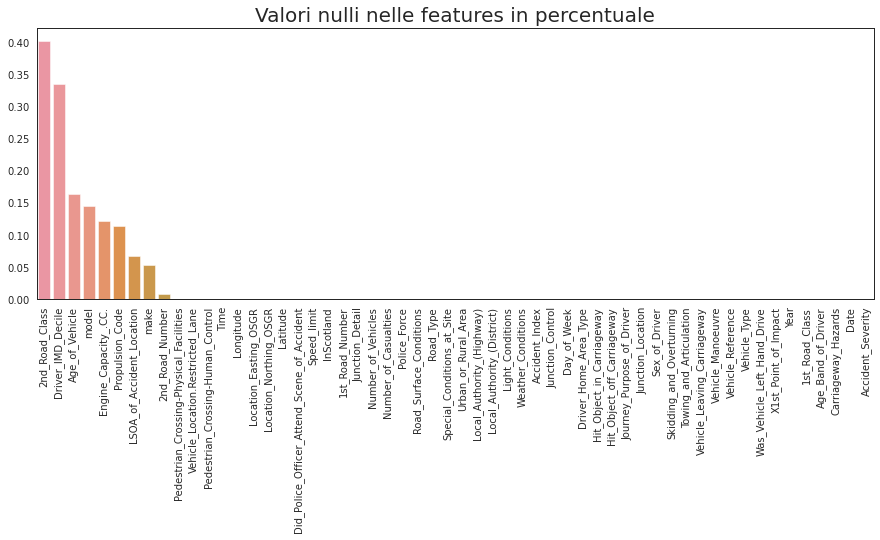

In [42]:
plt.figure(figsize=(15,5))
s = pd.Series(train_set.isnull().sum()/train_set.shape[0]).sort_values(ascending=False)
sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

Però non sono solo questi i valori null; infatti sono presenti altri valori null che però non vengono catturati, siccome in realtà sono salvati come un valore categorico. Infatti il valore "*Data missing or out of range*" lo si può sostituire con il valore *NaN*, così da non trascurare tali valori null.</br>
Si crea una classe per un transformer che effettua la replace dei valori "*Data missing or out of range*" in *np.NaN*, che verrà inserito più avanti in una pipeline:

In [43]:
class ReplaceValuesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,valueFrom, valueTo):
        self.valueFrom=valueFrom
        self.valueTo=valueTo

    def transform(self,X,y=None):
        return X.replace(self.valueFrom, self.valueTo)

    def fit(self, X, y=None):
        return self

#pipeline = Pipeline([
#    ("replaceValuesToNan", replaceValuesTransformer("Data missing or out of range", np.NaN))
#])

In [44]:
replaceValuesToNan = ReplaceValuesTransformer('Data missing or out of range', np.NaN)
train_set = replaceValuesToNan.fit_transform(train_set)

Viene riportato il grafico aggiornato dei valori null:

Text(0.5, 1.0, 'Valori nulli nelle features in percentuale')

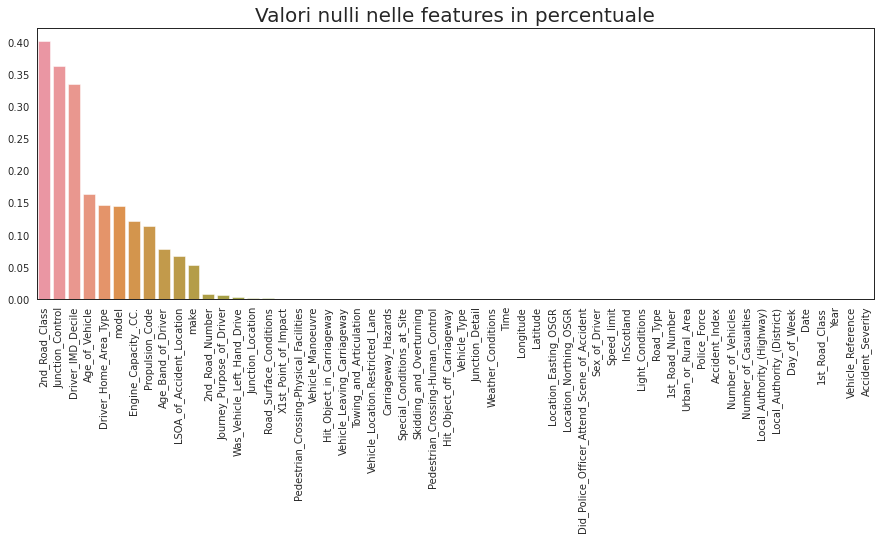

In [45]:
plt.figure(figsize=(15,5))
s = pd.Series(train_set.isnull().sum()/train_set.shape[0]).sort_values(ascending=False)
sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Valori nulli nelle features in percentuale", size=20)

Si nota come sono comparsi attributi con molti valori null che prima erano sfuggiti, come l'attributo *Junction_Control*.

In particolare si effettua la drop delle seguenti colonne:
* *Driver_IMD_Decile*, *model*, *2nd_Road_Class*, *2nd_Road_Number*, *LSOA_of_Accident_Location* e *Junction_Control*.

In [46]:
print("Prima -->", train_set.shape)
train_set.drop(labels='Driver_IMD_Decile', axis=1, inplace=True)
train_set.drop(labels='model', axis=1, inplace=True)
train_set.drop(labels='2nd_Road_Class', axis=1, inplace=True)
train_set.drop(labels='2nd_Road_Number', axis=1, inplace=True)
train_set.drop(labels='LSOA_of_Accident_Location', axis=1, inplace=True)
train_set.drop(labels='Junction_Control', axis=1, inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (2037823, 56)
Dopo --> (2037823, 50)


Si eliminano anche altre features che non sono di interesse per il task; ad esempio *Date*, oppure *Location_Easting_OSGR* e *Location_Northing_OSGR* perchè sono un altro modo per localizzare l'incidente (bastano *Latitude* e *Longitude*):

In [47]:
print("Prima -->", train_set.shape)
train_set.drop(labels='Date', axis=1, inplace=True)
train_set.drop(labels='Location_Easting_OSGR', axis=1, inplace=True)
train_set.drop(labels='Location_Northing_OSGR', axis=1, inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (2037823, 50)
Dopo --> (2037823, 47)


Vengono rimosse altre features che non sono utili ai fini del task come l'indice dell'incidente e del veicolo:

In [48]:
print("Prima -->", train_set.shape)
train_set.drop(labels='Accident_Index', axis=1, inplace=True)
train_set.drop(labels='Vehicle_Reference', axis=1, inplace=True)
train_set.drop(labels='Police_Force', axis=1, inplace=True)
train_set.drop(labels='1st_Road_Number', axis=1, inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (2037823, 47)
Dopo --> (2037823, 43)


Per quanto riguarda *Age_of_Vehicle*, *Engine_Capacity_.CC.*, *make* e *Propulsion_Code*, non le si eliminano come features perchè potrebbero essere interessanti.</br>
Si crea una classe per un transformer che effettua la drop di colonne, che verrà inserito più avanti in una pipeline:

In [49]:
class ColumnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

#pipeline = Pipeline([
#    ("columnDropper", ColumnDropperTransformer(['col_2','col_3']))
#])

Si eliminano tutte le righe che contengono almeno un valore null. Questa scelta è giustificata dall'enorme dataset che abbiamo a disposizione.</br>
Si crea una classe per un transformer che effettua la drop delle righe (passando come parametro l'indice delle righe da eliminare, se non definito verranno eliminate tutte le righe che contengono almeno un valore nullo), che verrà inserito più avanti in una pipeline:

In [50]:
class RowsDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, indexNames=None):
        self.indexNames = indexNames

    def transform(self,X,y=None):
        if self.indexNames is None:
            return X.dropna()
        if self.indexNames == 'Age_Band_of_Driver':
            index = X[ (X[self.indexNames] == '0 - 5') | (X[self.indexNames] == '6 - 10') ].index
        else:
            index = X[ (X[self.indexNames] == 10.0) | (X[self.indexNames] == 15.0) ].index
        return X.drop(index)

    def fit(self, X, y=None):
        return self

#pipeline = Pipeline([
#    ("rowsDropper", RowsDropperTransformer())
#])

In [51]:
print("Prima -->", train_set.shape)
rowsNanDropper = RowsDropperTransformer()
train_set = rowsNanDropper.fit_transform(train_set)
print("Dopo -->", train_set.shape)

Prima --> (2037823, 43)
Dopo --> (1418652, 43)


A questo punto non restano campi con valori nulli:

In [52]:
for i in train_set.isnull().sum():
    if i!=0:
        print("Sono presenti valori null!")
        train_set.isnull().sum()
        break
print("Non sono presenti valori null!")

Non sono presenti valori null!


#### <b>4.1.2. Eliminazione outliers</b>

In questa fase, invece si ricercano eventuali outliers nelle features numeriche, attraverso l'ausilio dei boxplot.</br>
In particolare, attualmente le colonne numeriche rimanenti sono le seguenti:

In [53]:
train_set.select_dtypes(["float", "int"]).columns

Index(['Age_of_Vehicle', 'Engine_Capacity_.CC.',
       'Vehicle_Location.Restricted_Lane', 'Year',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit'],
      dtype='object')

Di queste, le più importanti sono:
* *Age_of_Vehicle*
* *Engine_Capacity_.CC.*
* *Latitude*
* *Longitude*
* *Number_of_Casualties*
* *Number_of_Vehicles*
* *Speed_limit*

Le restanti saranno eliminate più avanti. Per qunato riguarda *Latitude* e *Longitude*, esse potrebbero presentare degli outliers corrspondenti agli incidenti avvenuti nell'isola *Mainland*, ovvero l'isola più a nord-est della Gran Bretagna, e quindi giustamente le coordinate degli incidenti si differenziano di molto dal resto delle coordinate. Però comunque si ritiene che tali valori non sono outliers perchè possono dare lo stesso un contributo nella fase di learning.

Quindi, le colonne che possono contenere degli outliers sono:

In [54]:
col_outliers = ['Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']

Si valuteranno i boxplot di ogniuna, suddivisi per gravità di incidente (*Accident_Severity*).</br>

<AxesSubplot:xlabel='Accident_Severity', ylabel='Age_of_Vehicle'>

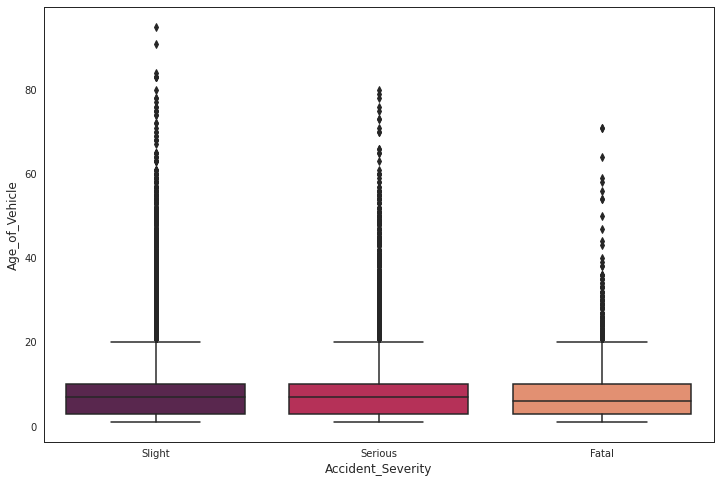

In [55]:
sns.boxplot(x = 'Accident_Severity', y = 'Age_of_Vehicle', data = train_set, palette='rocket')

<AxesSubplot:xlabel='Accident_Severity', ylabel='Engine_Capacity_.CC.'>

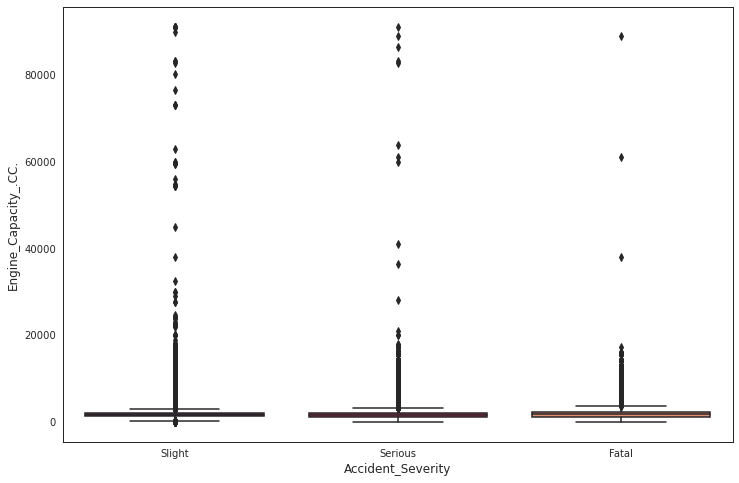

In [56]:
sns.boxplot(x = 'Accident_Severity', y = 'Engine_Capacity_.CC.', data = train_set, palette='rocket')

<AxesSubplot:xlabel='Accident_Severity', ylabel='Number_of_Casualties'>

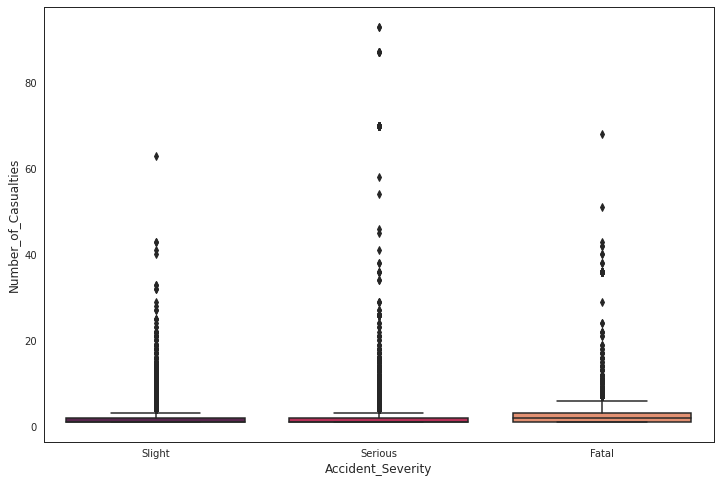

In [57]:
sns.boxplot(x = 'Accident_Severity', y = 'Number_of_Casualties', data = train_set, palette='rocket')

<AxesSubplot:xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

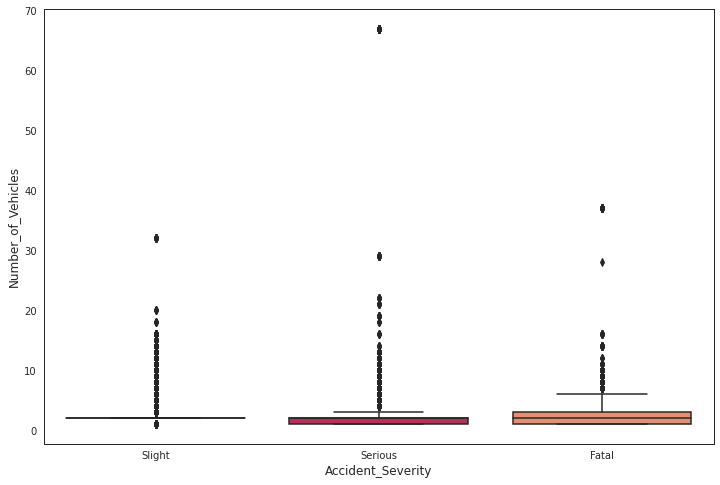

In [58]:
sns.boxplot(x = 'Accident_Severity', y = 'Number_of_Vehicles', data = train_set, palette='rocket')

<AxesSubplot:xlabel='Accident_Severity', ylabel='Speed_limit'>

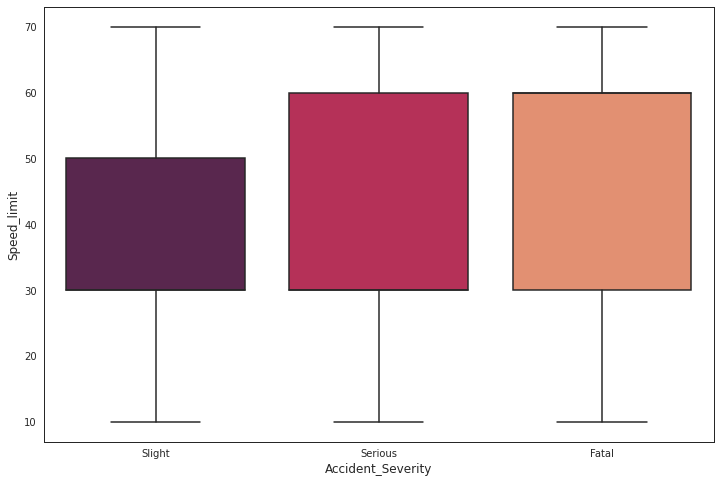

In [59]:
sns.boxplot(x = 'Accident_Severity', y = 'Speed_limit', data = train_set, palette='rocket')

Per il momento si considerano ouliers, tutti quei punti che superano 1.5 * IQR.</br>
Sotto tale ipotesi, i risultati ottenuti mostrano che a parte la colonna *Speed_limit*, le altre contengono molti ouliers.</br>
A parte la colonna *Age_of_Vehicle* che contiene molti ouliers ma abbastanza comuni tra loro, le altre 3 colonne presentano dei veri e propri punti isolati. Basti vedere ad esempio la colonna *Number_of_Vehicles* che contiene un incidente con circa 70 veicoli coinvolti, questo sicuramente è un outliers, dato che è un evento rarissimo (infatti solo un incidente del genere).

Per curiosità, su tale incidente si può andare a verificare cosa sia successo realmente quel giorno. Prendendo le coordinate dell'incidente e l'anno:

In [60]:
df = train_set[train_set['Number_of_Vehicles'] > 60].head(1)
lat, long, year = df.iloc[0]['Latitude'], df.iloc[0]['Longitude'], df.iloc[0]['Year']
lat, long, year


(51.39166, 0.749417, 2013)

In particolare le coordinate sopra menzionate corrispondono al ponte *Sheppy Crossing* a *Sittingbourne* in Inghilterra. Infatti nel 2013 su quel ponte c'è stato un enorme incidente di veicoli (*pile-up*), molto probabilmente dovuto anche all'alto livello di nebbia presente. Per maggiori informazioni ecco il link di Wikipedia che parla dello *Sheppy Crossing crash*: https://en.wikipedia.org/wiki/Sheppey_Crossing_crash

A questo punto si è deciso di rimuovere tutte le tuple che corrispondo a degli outliers, ovvero quei punti che superano di 1.5 * IQR. Si crea un transformer ad hoc, che verrà usato più avanti all'interno della pipeline:

In [61]:
class RowsDropperOutliersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, indexNames=None, val_outliers=1.5):
        self.indexNames = indexNames
        self.val_outliers = val_outliers

    def transform(self,X,y=None, remove_outliers=True):
        if remove_outliers:
            self.index_to_drop = self.__outlier_detection(X, self.indexNames)
            X_clean = X.drop(self.index_to_drop)
        else:
            X_clean = X.copy()
        return X_clean

    def fit(self, X, y=None):
        return self

    def __outlier_detection(self, df, columns):
      rows = []
      to_drop_train = []
      df_slight = df[df['Accident_Severity'] == 'Slight']
      df_serious = df[df['Accident_Severity'] == 'Serious']
      df_fatal = df[df['Accident_Severity'] == 'Fatal']
      for col in columns:
          for dfn in (df_slight, df_serious, df_fatal):
            Q1 = np.nanpercentile(dfn[col], 25)
            Q3 = np.nanpercentile(dfn[col], 75)
            IQR = Q3 - Q1
            outlier_point = self.val_outliers * IQR
            rows.extend(dfn[(dfn[col] < Q1 - outlier_point)|(dfn[col] > Q3 + outlier_point)].index)
      to_drop_train = np.unique(rows)
      return to_drop_train

In [62]:
print("Prima -->", train_set.shape)
outlierTransformer = RowsDropperOutliersTransformer(col_outliers)
train_set = outlierTransformer.transform(train_set, remove_outliers=True)
print("Dopo -->", train_set.shape)

Prima --> (1418652, 43)
Dopo --> (847994, 43)


Per verificare che gli outliers non sono più presenti basta andare a riplottare i boxplot. Essi saranno ripresentati nella sezione *4.2.2. Esplorazione attributi numerici* in *4.2. Esplorazione delle features*.

#### <b>4.1.3. Ribilanciamento delle classi</b>

Un problema importante adesso da risolvere prima di proseguire è lo sbilanciamento della classe target; ci si trova in un problema di *imbalanced learning*:

In [63]:
def barPlotAccidentSeverity(label_pos_y=10000):
    f = plt.figure(figsize=(15,7))
    df_byAccSev = train_set.groupby("Accident_Severity", as_index=False).size()
    df_byAccSev.columns = ["Accident_Severity", "Numero di incidenti"]
    df_byAccSev.sort_values(by=["Numero di incidenti"], inplace=True, ascending=False)


    plot = sns.barplot(x="Accident_Severity", y="Numero di incidenti", palette="rocket", data=df_byAccSev)
    plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plot.set_title("Numero di incidenti per gravità dell'incidente")

    percentage = np.array(df_byAccSev[["Numero di incidenti"]]/train_set.shape[0] * 100)
    patches = plot.patches

    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+label_pos_y
        plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

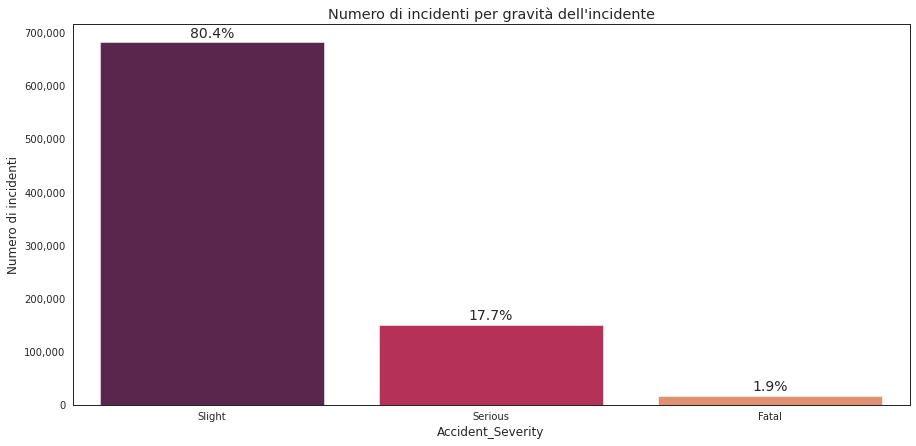

In [64]:
barPlotAccidentSeverity()

Come si vede l'80.4% delle istanze è di tipo *Slight*, il 17.7% di tipo *Serious* e peggio ancora davvero una piccolissima percentuale di tipo *Fatal*...</br>
L'idea innanzitutto è quella di trasformare il problema da un problema di classificazione multiclasse in un problema di classificazione binaria; verranno raggruppati in un'unica classe *Serious* e *Fatal*. Così facendo si andrà a diminuire di poco (1,9%) lo sbilanciamento.</br>
Dopo questa fase quindi il task sarà la classificazione di un problema binario, dove *Accident_Severity* sarà:
* **0**: l'incidente non è stato grave (*Slight*).
* **1**: l'incidente è stato grave (*Serious or Fatal*).

Si definisce una funzione per effettuare tale trasformazione:

In [65]:
def transformAccidentSverity(df):
    df['Accident_Severity'] = df['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious or Fatal')
    df = pd.get_dummies(df, columns=['Accident_Severity'])
    df = df.drop('Accident_Severity_Slight', axis=1)
    df['Accident_Severity_Serious or Fatal'].value_counts(normalize=True)
    df = df.rename(columns={'Accident_Severity_Serious or Fatal': 'Accident_Severity'})
    return df.drop('Accident_Severity', axis=1), df['Accident_Severity']

In [66]:
train_set, y = transformAccidentSverity(train_set)
train_set['Accident_Severity'] = y

Più avanti tale funzione verrà usata all'interno di un *FunctionTransformer*.

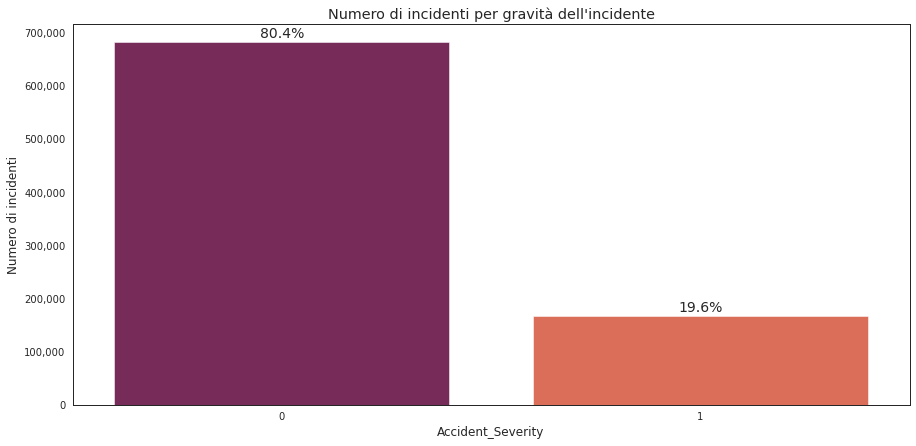

In [67]:
barPlotAccidentSeverity()

Nonostante il lieve miglioramento dello sbilanciamento, ancora c'è un forte sbilanciamento verso gli incidenti lievi (*0*).
In questo caso anche un classificatore stupido che predice sempre il valore *0*, otterrà un'accuratezza elevata dell'80,4%!</br>
Per risolvere tale problema, grazie al fatto che il dataset è costituito da molte istanze, si effettua un massiccio undersampling sulla classe maggioritaria (*0*). Con l'ausilio della libreria **imbalanced-learn** si procede con un undersampling random, in modo da avere un minor numero di tuple ma un bilanciamento perfetto delle classi. (Per maggiori informazioni sulla libreria *imbalanced_learn* si rimanda alla documentazione: https://imbalanced-learn.org/stable/index.html).

In [68]:
rus = RandomUnderSampler(random_state=0)
train_set, train_set['Accident_Severity']  = rus.fit_resample(train_set.loc[:, train_set.columns != 'Accident_Severity'], train_set['Accident_Severity'])

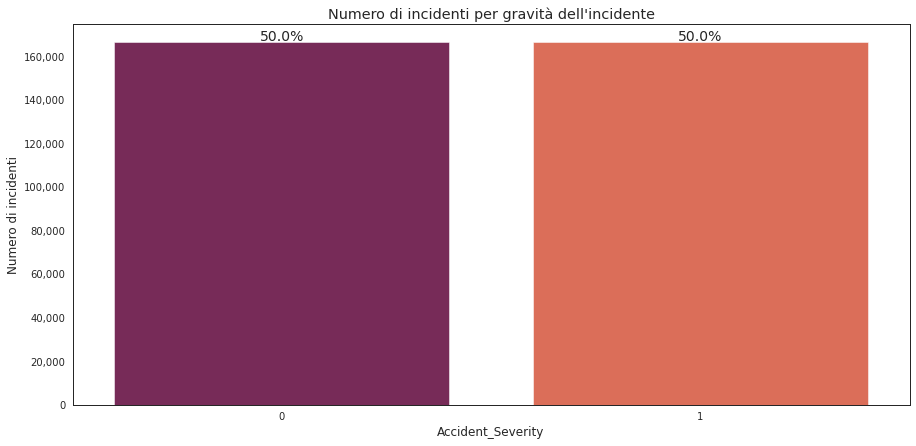

In [69]:
barPlotAccidentSeverity(label_pos_y=1000)

Definiamo una funzione che effettua l'undersampling in modo tale da poterla richiamare più avanti all'interno di un *FunctionTransformer*:

In [70]:
def underSampling(df):
    df, y = df
    rus = RandomUnderSampler(random_state=0)
    df, y  = rus.fit_resample(df.loc[:, df.columns != 'Accident_Severity'], y)
    return df, y

Al costo di perdere istanze del dataset, grazie all'undersampling le classi sono perfettamente bilanciate, come si vede nel diagramma. Ecco di seguito il dataset finale:

In [71]:
print(train_set.shape)
train_set.head()

(332578, 43)


Age_Band_of_Driver  Age_of_Vehicle Driver_Home_Area_Type  \
0            46 - 55             9.0                 Rural   
1            46 - 55             6.0                 Rural   
2            56 - 65             3.0            Urban area   
3            46 - 55             7.0            Urban area   
4            21 - 25             6.0            Urban area   

   Engine_Capacity_.CC. Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                1598.0                      None                       None   
1                1998.0                      None                       None   
2                2231.0                      None                       None   
3                2188.0                      None                       None   
4                1968.0                      None                       None   

  Journey_Purpose_of_Driver  \
0   Journey as part of work   
1                 Not known   
2    Commuting to/from work   
3    Commuting to/from work   
4                 Not known   

                                   Junction_Location        make  \
0                                Entering roundabout        MINI   
1  Approaching junction or waiting/parked at junc...     RENAULT   
2       Mid Junction - on roundabout or on main road      TOYOTA   
3                                 Entering main road     RENAULT   
4                                Entering roundabout  VOLKSWAGEN   

  Propulsion_Code Sex_of_Driver Skidding_and_Overturning  \
0          Petrol        Female                     None   
1          Petrol        Female                     None   
2       Heavy oil          Male                     None   
3       Heavy oil          Male                     None   
4       Heavy oil          Male                     None   

  Towing_and_Articulation Vehicle_Leaving_Carriageway  \
0     No tow/articulation   Did not leave carriageway   
1     No tow/articulation   Did not leave carriageway   
2     No tow/articulation   Did not leave carriageway   
3     No tow/articulation   Did not leave carriageway   
4     No tow/articulation   Did not leave carriageway   

   Vehicle_Location.Restricted_Lane  Vehicle_Manoeuvre Vehicle_Type  \
0                               0.0      Turning right          Car   
1                               0.0      Turning right          Car   
2                               0.0      Turning right          Car   
3                               0.0       Turning left          Car   
4                               0.0  Going ahead other          Car   

  Was_Vehicle_Left_Hand_Drive X1st_Point_of_Impact  Year 1st_Road_Class  \
0                          No       Did not impact  2013              A   
1                          No             Nearside  2011              C   
2                          No                Front  2011              A   
3                          No                Front  2012              A   
4                          No              Offside  2012              A   

  Carriageway_Hazards Day_of_Week  \
0                None     Tuesday   
1                None   Wednesday   
2                None   Wednesday   
3                None   Wednesday   
4                None   Wednesday   

   Did_Police_Officer_Attend_Scene_of_Accident            Junction_Detail  \
0                                          1.0                 Roundabout   
1                                          2.0  Private drive or entrance   
2                                          1.0                 Crossroads   
3                                          1.0                 Roundabout   
4                                          1.0                 Roundabout   

    Latitude       Light_Conditions Local_Authority_(District)  \
0  53.047616               Daylight       Newcastle-under-Lyme   
1  55.949146               Daylight         Edinburgh, City of   
2  53.762771               Daylight                    Preston   
3  51.616884        

### <b>4.2. Esplorazione delle features</b>

Da questo momento in poi si porrà l'attenzione sul valore target da predire, ossia **Accident_Severity**, e sulla relazione che quest'ultimo ha con le altre features.</br>
Si procede alla visualizzazione dei dati per individuare i fattori che influenzano la classe target, ovvero la gravità dell'incidente. Così facendo si inizierà a capire l'utilità delle features in merito l'obiettivo del task.

Si definisce una funzione che servirà per plottare diagrammi a barre utili per visualizzare il legame di alcune features con *Accident_Severity*:

In [72]:
def plotBar(feature, x=10, y=5, vertical=False, percent=False, order=False):
    f = plt.figure(figsize=(x,y))

    df = train_set.groupby(feature, as_index=False).agg(
        Accident_Severity=("Accident_Severity","mean"), 
        Number_of_Accidents=("Accident_Severity","size")
    )
    #df.columns = [feature, "Accident_Severity", "Number_of_Accidents"]
    if not order:
        df.sort_values(by=["Accident_Severity"], inplace=True, ascending=False)
        col = "rocket"
    else:
        col = "rocket_r"

    if percent:
        percentage = np.array(df[["Number_of_Accidents"]]/train_set.shape[0] * 100)

    if not vertical:
        plot = sns.barplot(data=df, x=feature, y='Accident_Severity', palette=col, order=df[feature])
        plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '{:.2f}'.format(x, ',')))
        if percent:
            patches = plot.patches
            for i in range(len(patches)):
                x = patches[i].get_x() + patches[i].get_width()/2
                y = patches[i].get_height()+0.001
                plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)
    else:
        plot = sns.barplot(data=df, x="Accident_Severity", y=feature, palette=col, order=df[feature])
        plot.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '{:.2f}'.format(x, ',')))
        if percent:
            patches = plot.patches
            for i in range(len(patches)):
                y = patches[i].get_y() + patches[i].get_height()/1.5
                x = patches[i].get_width()+0.025
                plot.annotate('{:.1f}%'.format(float(percentage[i])), (x, y), ha='center', fontsize=14)

Da questo punto si possono dividere le analisi delle features in relazione con la classe target, in 8 categorie: numeri, strada, tempo, posizione, condizioni incidente, condizioni veicolo, guidatore e veicolo. Queste analisi saranno distinte per tipo di attributi: categorici e numerici.

#### <b>4.2.1. Esplorazione attributi categorici</b>

In [73]:
categorical = [var for var in train_set.columns if train_set[var].dtype=='O']
print('Ci sono {} attributi categorici\n'.format(len(categorical)))
print('Gli attributi categorici sono:\n\n', categorical)

Ci sono 30 attributi categorici

Gli attributi categorici sono:

 ['Age_Band_of_Driver', 'Driver_Home_Area_Type', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact', '1st_Road_Class', 'Carriageway_Hazards', 'Day_of_Week', 'Junction_Detail', 'Light_Conditions', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']


In [74]:
train_set[categorical].head()

Age_Band_of_Driver Driver_Home_Area_Type Hit_Object_in_Carriageway  \
0            46 - 55                 Rural                      None   
1            46 - 55                 Rural                      None   
2            56 - 65            Urban area                      None   
3            46 - 55            Urban area                      None   
4            21 - 25            Urban area                      None   

  Hit_Object_off_Carriageway Journey_Purpose_of_Driver  \
0                       None   Journey as part of work   
1                       None                 Not known   
2                       None    Commuting to/from work   
3                       None    Commuting to/from work   
4                       None                 Not known   

                                   Junction_Location        make  \
0                                Entering roundabout        MINI   
1  Approaching junction or waiting/parked at junc...     RENAULT   
2       Mid Junction - on roundabout or on main road      TOYOTA   
3                                 Entering main road     RENAULT   
4                                Entering roundabout  VOLKSWAGEN   

  Propulsion_Code Sex_of_Driver Skidding_and_Overturning  \
0          Petrol        Female                     None   
1          Petrol        Female                     None   
2       Heavy oil          Male                     None   
3       Heavy oil          Male                     None   
4       Heavy oil          Male                     None   

  Towing_and_Articulation Vehicle_Leaving_Carriageway  Vehicle_Manoeuvre  \
0     No tow/articulation   Did not leave carriageway      Turning right   
1     No tow/articulation   Did not leave carriageway      Turning right   
2     No tow/articulation   Did not leave carriageway      Turning right   
3     No tow/articulation   Did not leave carriageway       Turning left   
4     No tow/articulation   Did not leave carriageway  Going ahead other   

  Vehicle_Type Was_Vehicle_Left_Hand_Drive X1st_Point_of_Impact  \
0          Car                          No       Did not impact   
1          Car                          No             Nearside   
2          Car                          No                Front   
3          Car                          No                Front   
4          Car                          No              Offside   

  1st_Road_Class Carriageway_Hazards Day_of_Week            Junction_Detail  \
0              A                None     Tuesday                 Roundabout   
1              C                None   Wednesday  Private drive or entrance   
2              A                None   Wednesday                 Crossroads   
3              A                None   Wednesday                 Roundabout   
4              A                None   Wednesday                 Roundabout   

        Light_Conditions Local_Authority_(District) Local_Authority_(Highway)  \
0               Daylight       Newcastle-under-Lyme             Staffordshire   
1               Daylight         Edinburgh, City of        Edinburgh, City of   
2               Daylight                    Preston                Lancashire   
3               Daylight                     Barnet                    Barnet   
4  Darkness - lights lit                  Gateshead                 Gateshead   

  Road_Surface_Conditions           Road_Type Special_Conditions_at_Site  \
0             Wet or damp          Roundabout                       None   
1                     Dry  Single carriageway                       None   
2                     Dry  Single carriageway                       None   
3             Wet or damp  Single carriageway                       None   
4             Wet or damp          Roundabout                       None   

    Time Urban_or_Rural_Area     Weather_Conditions InScotland  
0  07:40               Urban  Raining no high winds         No  
1  16:10               Urban     Fine no 

##### <b>Strada:</b>

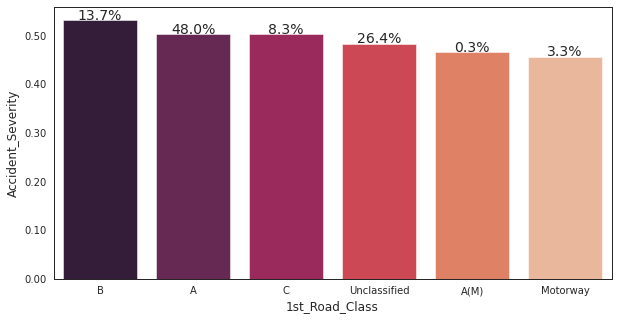

In [75]:
plotBar("1st_Road_Class", percent=True)

Le strade più pericolose sono le tipo B, A, C, ecc. Le Motorway sono le più sicure anche se ci si aspettava il contrario essendo quelle in cui i veicoli hanno meno restrizioni di velocità.

Si definiscono alcune variabili utili nel proseguo:

In [76]:
colors = [
    "#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#000000", 
    "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#808080", 
    "#C00000", "#00C000", "#0000C0", "#C0C000", "#C000C0", "#00C0C0", "#C0C0C0", 
    "#400000", "#004000", "#000040", "#404000", "#400040", "#004040", "#404040", 
    "#200000", "#002000", "#000020", "#202000", "#200020", "#002020", "#202020", 
    "#600000", "#006000", "#000060", "#606000", "#600060", "#006060", "#606060", 
    "#A00000", "#00A000", "#0000A0", "#A0A000", "#A000A0", "#00A0A0", "#A0A0A0", 
    "#E00000", "#00E000", "#0000E0", "#E0E000", "#E000E0", "#00E0E0", "#E0E0E0", 
]
ac2005 = accidents.loc[accidents["Year"] == 2005]
a, b, c, d = ac2005.Longitude.min(), ac2005.Longitude.max(), ac2005.Latitude.min(), ac2005.Latitude.max()
mymap = plt.imread("./img/uk.png")
box = [a+0.1,b+0.1, c, d-0.05]

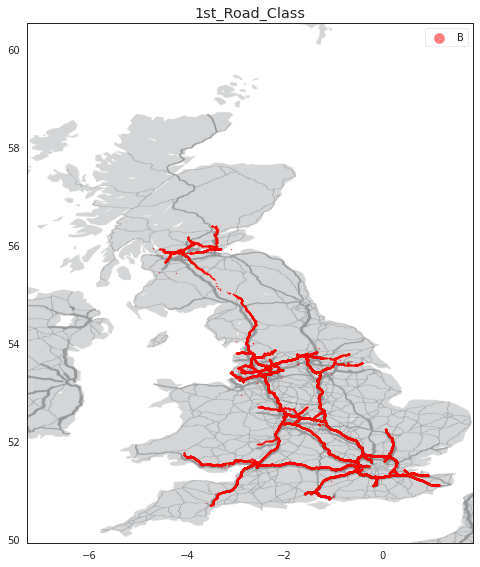

In [77]:
df_byR = pd.DataFrame(accidents['1st_Road_Class'].value_counts().sort_index()).reset_index()
df_byR.columns = ["1st_Road_Class", "Numero di incidenti"]
df_byR = df_byR.sort_values(ascending=False, by=["Numero di incidenti"])[0:20]

f = plt.figure(figsize=(8,12))

localAuth = df_byR["1st_Road_Class"].values

plt.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("1st_Road_Class")
#for i in range(len(localAuth)):
i=0
acc_R = accidents.loc[accidents["1st_Road_Class"]=="Motorway"]
plt.scatter(
    acc_R.Longitude, acc_R.Latitude, 
    alpha=0.5, 
    s=1, 
    label = "B",
    c=colors[i]
)
plt.legend(markerscale=10)

plt.show()

In figura sono rappresentati tutti gli incidenti lungo le strade di tipo *Motorway*; come si vede sono le strade principali della nazione; e da quanto visto dall'analisi precedente sono più sicure delle altre.

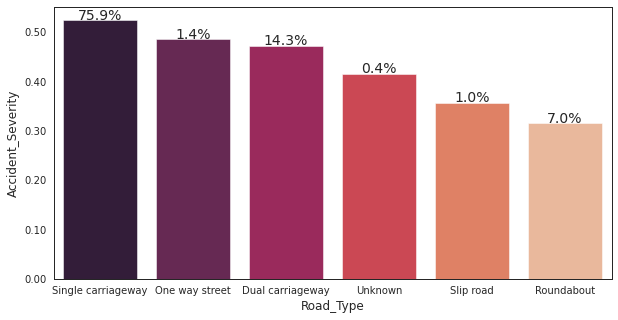

In [78]:
plotBar("Road_Type", percent=True)

Le strade a singola carreggiata sono le più pericolose, andando verso le rotatoie che giustamente sono meno pericolose visto che i veicoli transitano molto più lenatemente nei loro pressi.

##### <b>Tempo:</b>

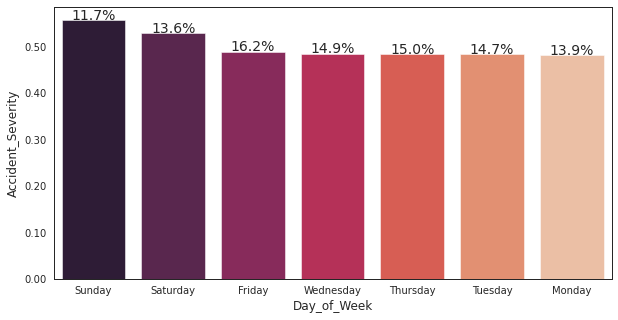

In [79]:
plotBar("Day_of_Week", percent=True)

Come prevedibile i giorni della settimana con incidenti più gravi sono quelli nel weekend.

Caratteristica interessante è la fascia oraria, infatti la maggior parte degli incidenti gravi avvengono di notte. Per tale ragione viene creato un nuovo campo (*Time_Interval*) a partire dal campo *Time*, grazie alla classe custom creata per il transformer:

In [80]:
class TimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self,X,y=None):
        X2 = X.copy()
        X2['Time_Interval'] = pd.to_datetime(X2['Time'])
        X2['Time_Interval'] = X2['Time_Interval'].dt.strftime('%H')
        return X2.drop('Time', axis=1)
        
    def fit(self, X, y=None):
        return self

#pipeline = Pipeline([
#    ("timeTransf", TimeTransformer())
#])

In [81]:
print("Prima -->", train_set.shape)
timeTransformer = TimeTransformer()
train_set = timeTransformer.fit_transform(train_set)
print("Dopo -->", train_set.shape)

Prima --> (332578, 43)
Dopo --> (332578, 43)


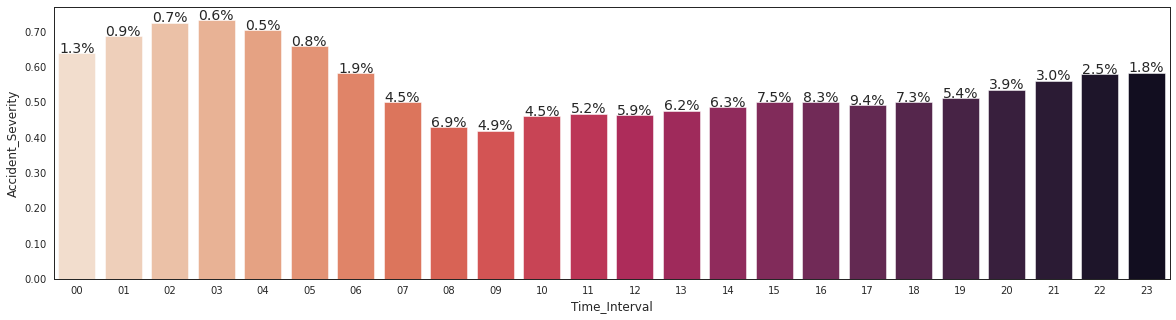

In [82]:
plotBar("Time_Interval", percent=True, x=20, order=True)

Per avere una visione più chiara, viene mostrato un grafico a linea, in cui l'inizio sull'asse x sono le ore 08:00.

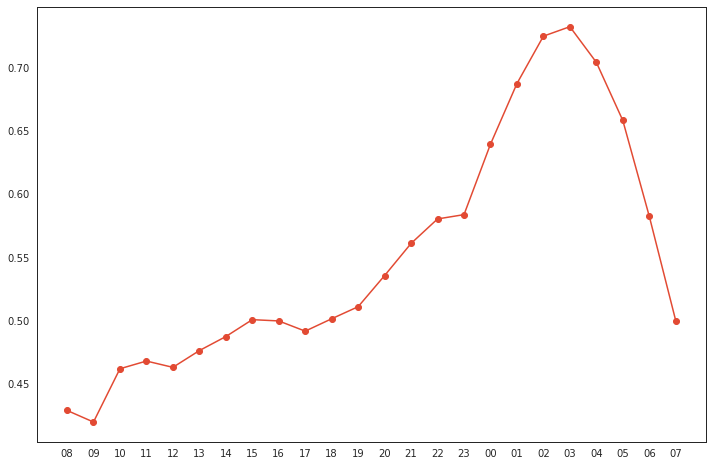

In [83]:
df = train_set.groupby('Time_Interval', as_index=False).agg(
        Accident_Severity=("Accident_Severity","mean"), 
        Number_of_Accidents=("Accident_Severity","size")
    )
df = df.reindex((df.index+8)%24)
plt.plot(df.Time_Interval, df.Accident_Severity, "-o")
plt.show()

Anche le ore della giornata giorno erano prevedibili, infatti gli incidenti più gravi avvengono durante la notte; come si vede dal grafico verso la notte la gravità degli incidenti aumenta. Il picco si trova alle 03:00 di notte.

##### <b>Posizione:</b>

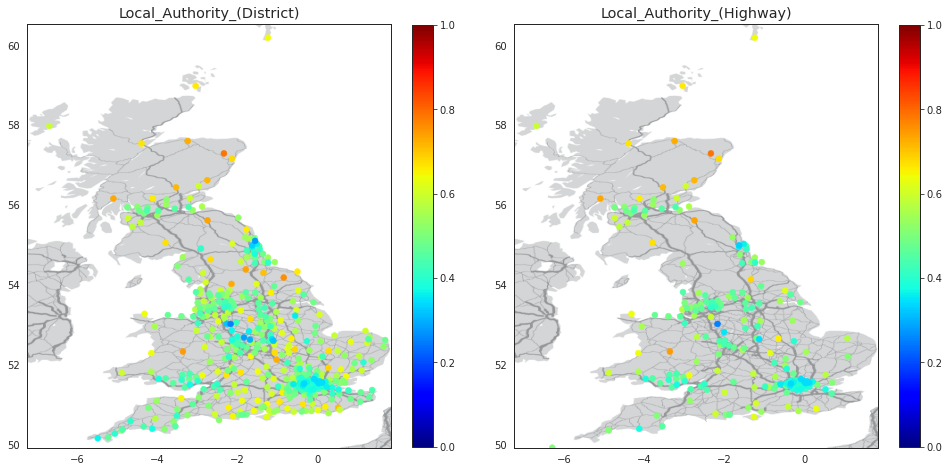

In [84]:
f = plt.figure(figsize=(16,12))
ax = plt.subplot2grid((1, 2), (0,0))

df = train_set.groupby("Local_Authority_(District)", as_index=False).agg({"Latitude": np.mean, "Longitude": np.mean, "Accident_Severity": np.mean})
df.columns = ["Local_Authority_(District)","Latitude", "Longitude", "Accident_Severity"]
df.sort_values(by=["Accident_Severity"], inplace=True, ascending=False)

ax.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Local_Authority_(District)")

cm = plt.get_cmap("jet")
sc = ax.scatter(df["Longitude"], df["Latitude"], c=df["Accident_Severity"], vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc,fraction=0.052)

ax2 = plt.subplot2grid((1, 2), (0,1))

df = train_set.groupby("Local_Authority_(Highway)", as_index=False).agg({"Latitude": np.mean, "Longitude": np.mean, "Accident_Severity": np.mean})
df.columns = ["Local_Authority_(Highway)","Latitude", "Longitude", "Accident_Severity"]
df.sort_values(by=["Accident_Severity"], inplace=True, ascending=False)

ax2.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Local_Authority_(Highway)")

cm = plt.get_cmap("jet")
sc = ax2.scatter(df["Longitude"], df["Latitude"], c=df["Accident_Severity"], vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc,fraction=0.052)

plt.show()

In figura sono rappresentate le contee con la relativa gravità degli incidenti.

##### <b>Condizioni incidente:</b>

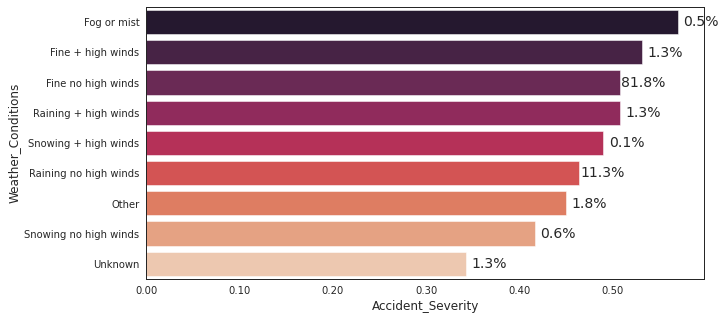

In [85]:
plotBar("Weather_Conditions", vertical=True, percent=True)

Le condizioni atmosferiche influiscono sulla pericolosità dell'incidente; infatti gli incidenti più gravi avvengono quando c'è nebbia e foschia.

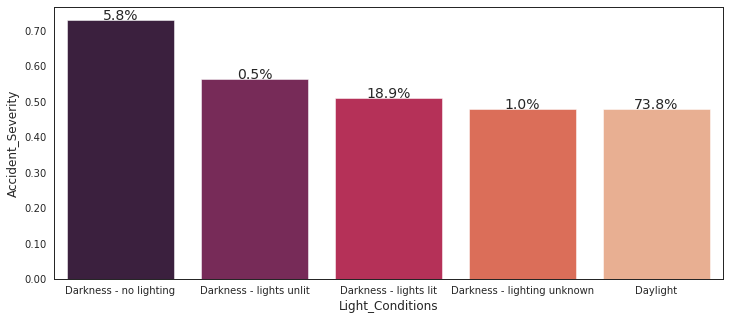

In [86]:
plotBar("Light_Conditions", percent=True, x=12)

Le condizioni di luce anche sono molto importanti per stabilire la pericolosità di un incidente; infatti gli incidenti più pericolosi avvengono quando è presente poca luce (*Darkness - no lighting*).

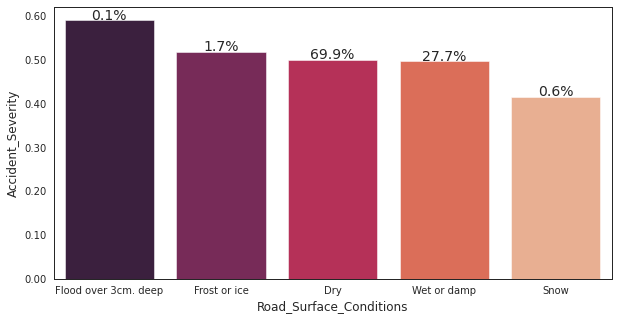

In [87]:
plotBar("Road_Surface_Conditions", percent=True)

Le condizioni della strada pure sono importanti; gli incidenti più gravi avvengono in strade con allagamento con acqua alta sopra i 3 cm.

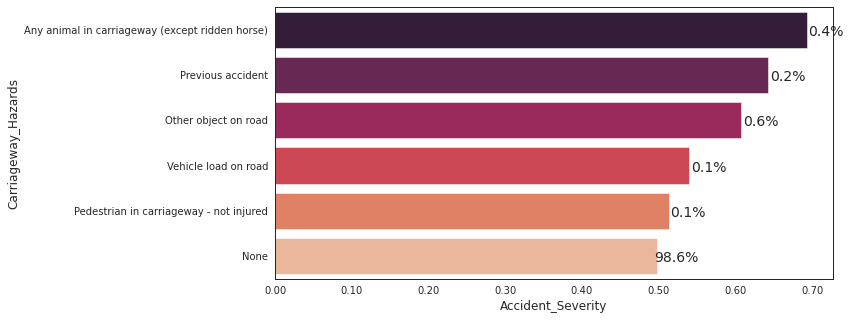

In [88]:
plotBar("Carriageway_Hazards", vertical=True, percent=True)

Anche i pericoli presenti sulla strada influiscono sulla gravità dell'incidente; come si vede laddove è presente già un incidente, si hanno incidenti più pericolosi.

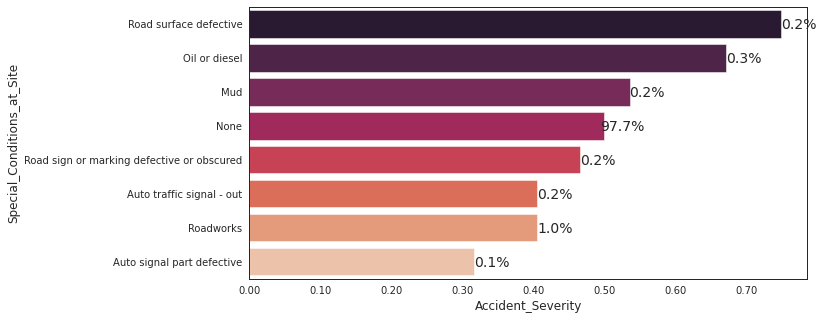

In [89]:
plotBar("Special_Conditions_at_Site", vertical=True, percent=True)

Le condizioni speciali sono un altro attributo interessante, come si vede, si ha una maggiore pericolosità se la superficie stradale presenta dei difetti, seguita da una strada in cui è presente del liquido come benzina.

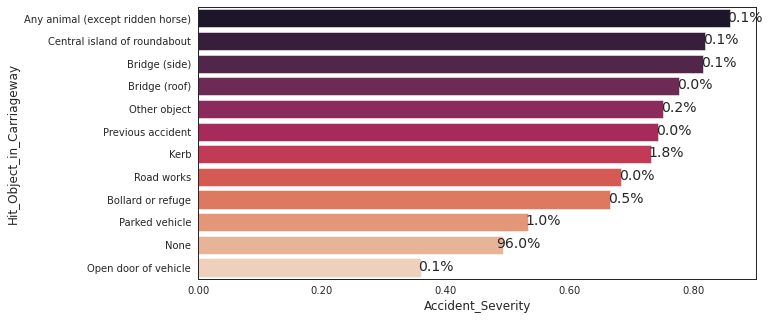

In [90]:
plotBar("Hit_Object_in_Carriageway", percent=True, vertical=True)

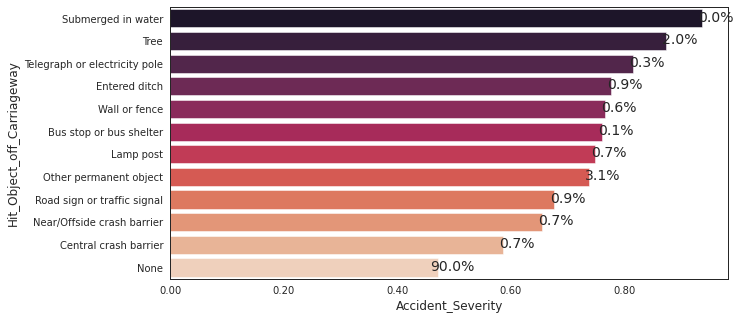

In [91]:
plotBar("Hit_Object_off_Carriageway", percent=True, vertical=True)

Altri attributi da poter tenere in considerazione sono gli oggetti colpiti in lungo la strada sia fuori che all'interno.  

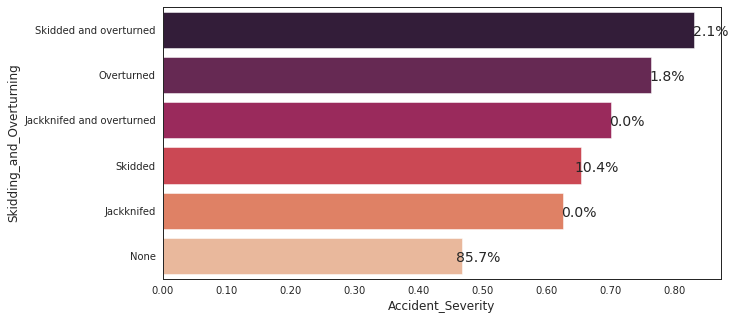

In [92]:
plotBar("Skidding_and_Overturning", percent=True, vertical=True)

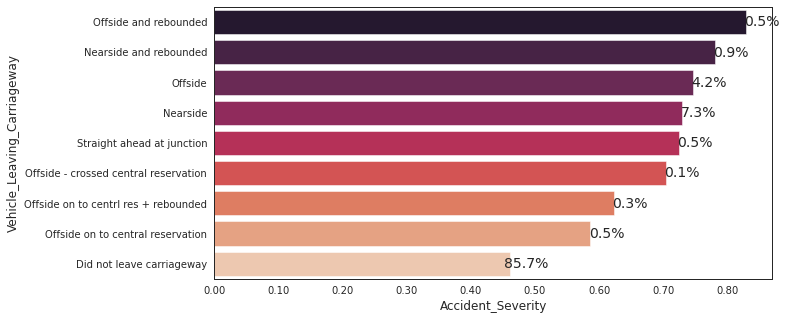

In [93]:
plotBar("Vehicle_Leaving_Carriageway", percent=True, vertical=True) 

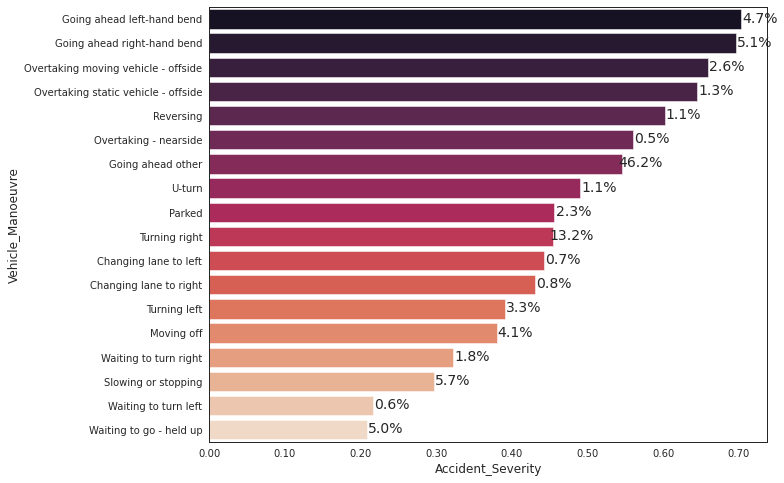

In [94]:
plotBar("Vehicle_Manoeuvre", percent=True, vertical=True, y=8)  

##### <b>Guidatore:</b>

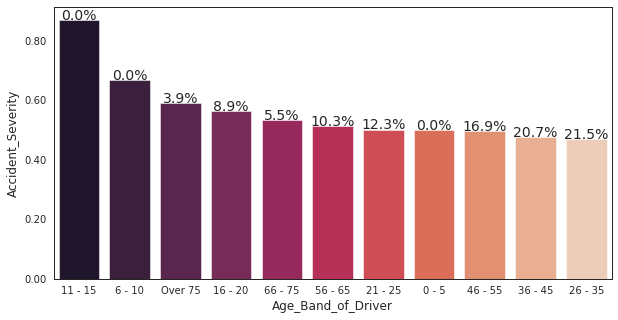

In [95]:
plotBar("Age_Band_of_Driver", percent=True)

L'intervallo di età del conducente, come si vede, è un attributo che determina molto la gravità dell'incidente; infatti dice che incidenti di bambini e anziani sono i più gravi.</br>
Da notare come ci sono due gruppi (0 - 5) e (6 - 10) che hanno un valore di gravità di incidente elevato, proprio pari ad 1! Solamente che nel training set rappresentano lo 0% circa delle istanze (outliers). Per capire meglio il numero di righe per queste due categorie:

In [96]:
train_set['Age_Band_of_Driver'].value_counts()

26 - 35    71591
36 - 45    68736
46 - 55    56279
21 - 25    40779
56 - 65    34204
16 - 20    29642
66 - 75    18323
Over 75    12917
11 - 15       99
6 - 10         6
0 - 5          2
Name: Age_Band_of_Driver, dtype: int64

Si nota come sono presenti pochissime righe, ovvero 3 righe per la fascia di età (6 - 10), e una sola riga per (0 - 5). Per tale motivo verrano eliminate queste due fasce d'età (la classe che effettua la trasformazione per il test set è stata definita già in precendenza e si chiama *RowsDropperTransformer*):

In [97]:
print("Prima -->", train_set.shape)
rowsAgeDriverDropper = RowsDropperTransformer('Age_Band_of_Driver')
train_set = rowsAgeDriverDropper.fit_transform(train_set)
print("Dopo -->", train_set.shape)

Prima --> (332578, 43)
Dopo --> (332570, 43)


Ecco come appare il nuovo plotBar riguardo le fasce età del conducente:

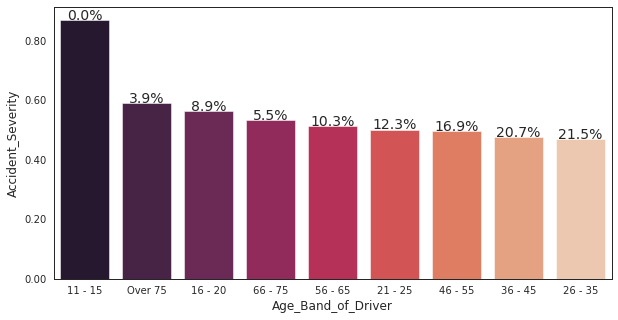

In [98]:
plotBar("Age_Band_of_Driver", percent=True)

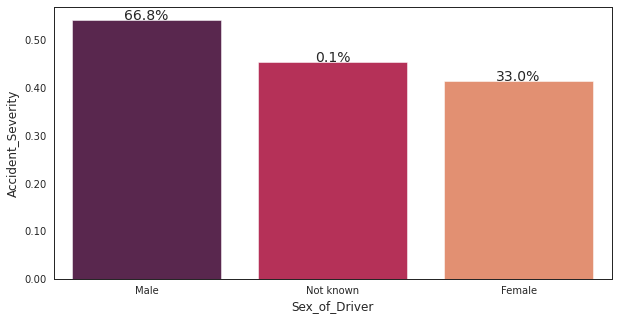

In [99]:
plotBar("Sex_of_Driver", percent=True) 

Si nota come i guidatori maschi sono stati coinvolti o hanno causato incidenti più gravi delle donne.

##### <b>Veicolo:</b>

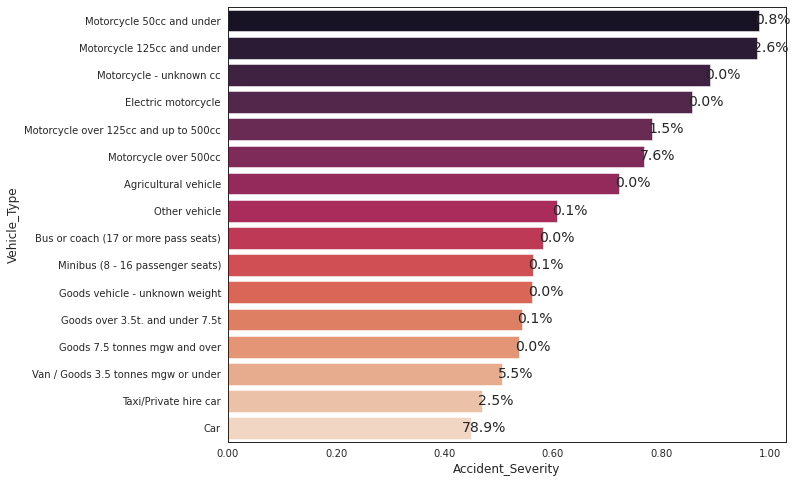

In [100]:
plotBar("Vehicle_Type", percent=True, vertical=True, y=8) 

Il tipo di veicolo può influire sulla gravità dell'incidente; esempio il taxi è più sicuro di una moto con più di 500 cavalli.

#### <b>4.2.2. Esplorazione attributi numerici</b>

In [101]:
numerical = [var for var in train_set.columns if train_set[var].dtype!='O']
print('Ci sono {} attributi numerici\n'.format(len(numerical)))
print('Gli attributi numerici sono\n\n', numerical)

Ci sono 13 attributi numerici

Gli attributi numerici sono

 ['Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Vehicle_Location.Restricted_Lane', 'Year', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit', 'Accident_Severity']


##### <b>Numeri:</b>

<AxesSubplot:xlabel='Accident_Severity', ylabel='Number_of_Casualties'>

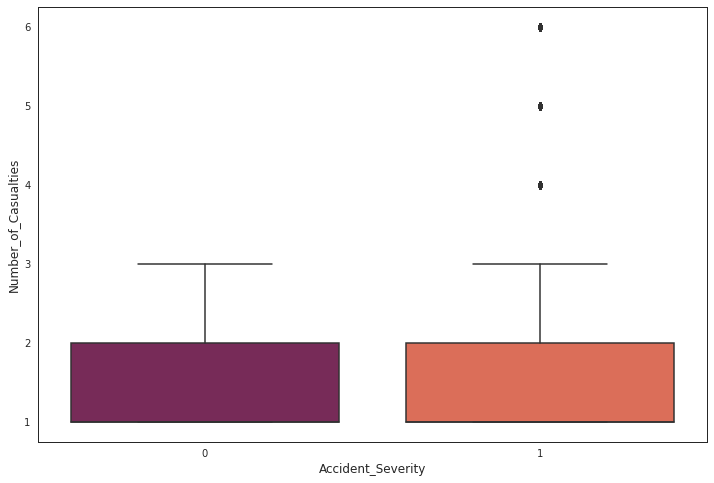

In [102]:
sns.boxplot(x = 'Accident_Severity', y = 'Number_of_Casualties', data = train_set, palette='rocket')

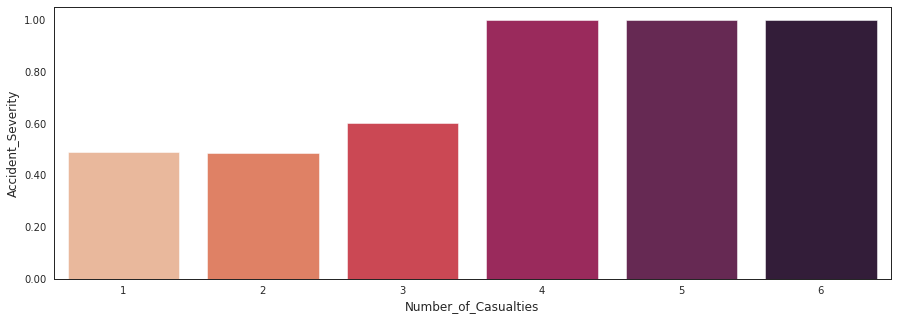

In [103]:
plotBar("Number_of_Casualties", order=True, x=15)

Un attributo importante è il numero di morti, infatti all'aumentare di quest'ultimo aumenta la gravità dell'incidente come si vede nel grafico.</br>
Stessa cosa si può dire per il numero di veicoli coinvolti:

<AxesSubplot:xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

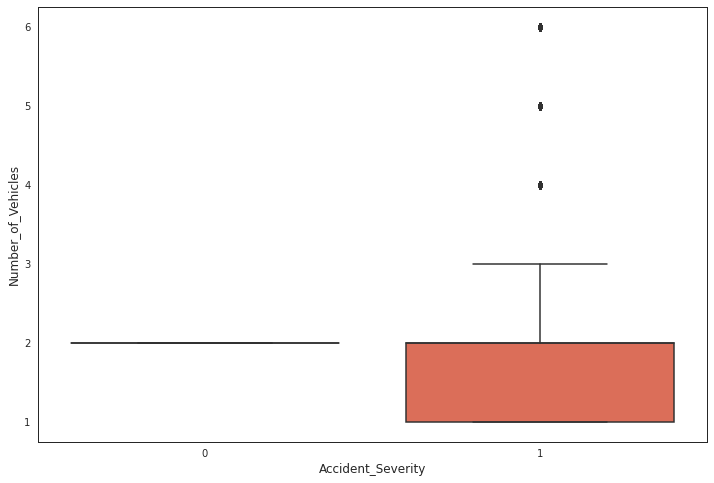

In [104]:
sns.boxplot(x = 'Accident_Severity', y = 'Number_of_Vehicles', data = train_set, palette='rocket')

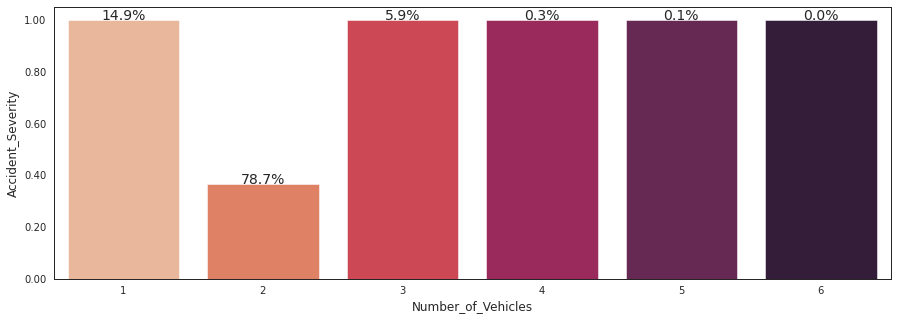

In [105]:
plotBar("Number_of_Vehicles", percent=True, x=15, order=True)

Si nota inoltre come nella maggior parte degli incidenti (78,7%) sono coinvolti 2 incidenti. Seguito dal 14,9% un solo veicolo, e così via all'aumentare del numero di veicoli la probabilità dell'evento diminuisce.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Speed_limit'>

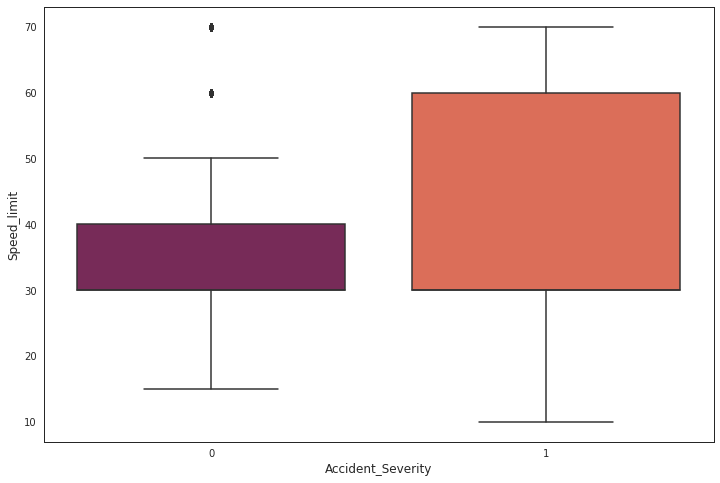

In [106]:
sns.boxplot(x = 'Accident_Severity', y = 'Speed_limit', data = train_set, palette='rocket')

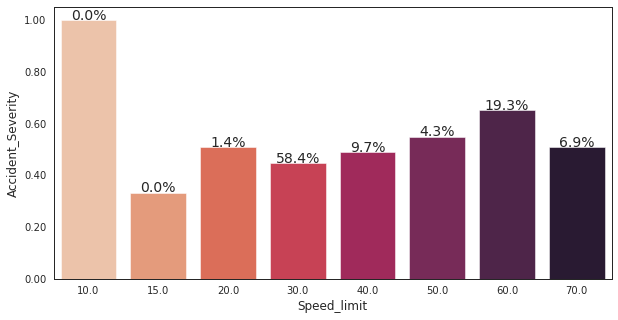

In [107]:
plotBar("Speed_limit", percent=True, order=True)

Per quanto riguarda i limiti di velocità, come ci si aspettava, le strade con limiti di velocità più alti sono più pericolose.</br>
Da notare come ci sono i limiti di velocità 10 e 15 che hanno un valore di gravità di incidente elevato, proprio pari ad 1! Solamente che nel training set rappresentano lo 0% circa delle istanze (outliers). Per capire meglio il numero di righe per questi due limiti di velocità:

In [108]:
train_set['Speed_limit'].value_counts()

30.0    194141
60.0     64206
40.0     32305
70.0     22811
50.0     14342
20.0      4759
15.0         3
10.0         3
Name: Speed_limit, dtype: int64

Sono presenti pochissime righe, ovvero 3 righe per il limite di velocità 10, e 3 righe per 15. Per tale motivo verrano eliminate questi limiti (la classe che effettua la trasformazione per il test set è stata definita già in precendenza e si chiama *RowsDropperTransformer*):

In [109]:
print("Prima -->", train_set.shape)
rowsSpeedLimitDropper = RowsDropperTransformer('Speed_limit')
train_set = rowsSpeedLimitDropper.fit_transform(train_set)
print("Dopo -->", train_set.shape)

Prima --> (332570, 43)
Dopo --> (332564, 43)


Ecco di seguito il nuovo diagramma a barre; si vede come adesso è più simile a come ci si aspettava, ovvero all'aumentare del limite di velocità, la gravità dell'incidente aumenta:

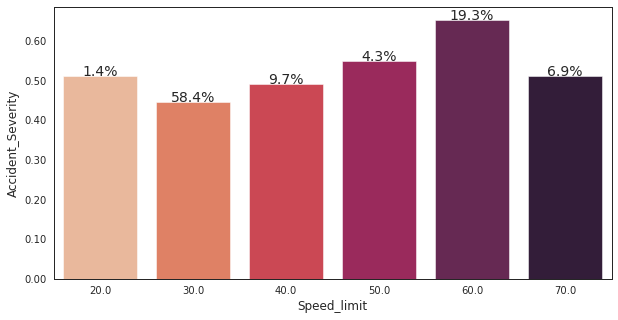

In [110]:
plotBar("Speed_limit", percent=True, order=True)

<AxesSubplot:xlabel='Accident_Severity', ylabel='Year'>

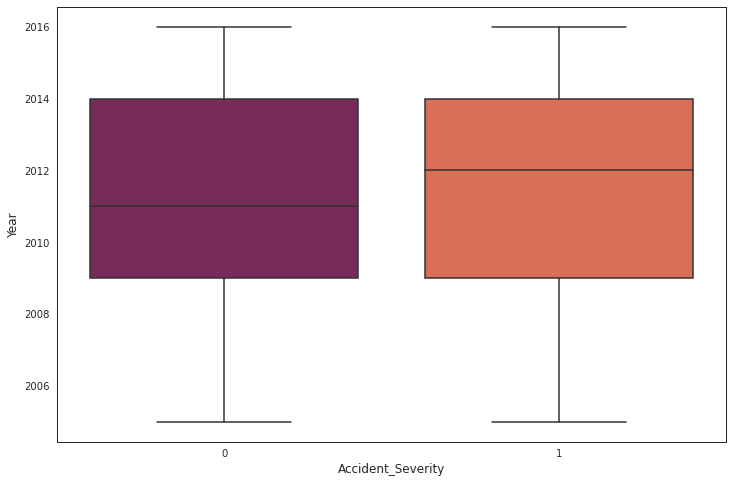

In [111]:
sns.boxplot(x = 'Accident_Severity', y = 'Year', data = train_set, palette='rocket')

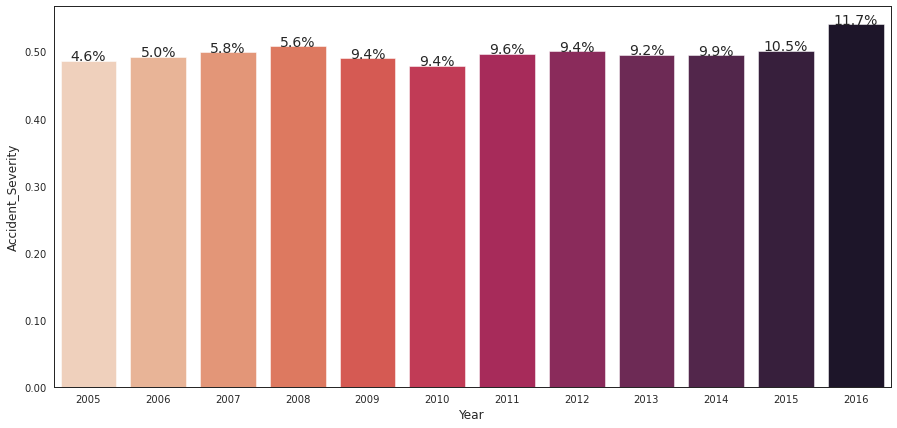

In [112]:
plotBar("Year", percent=True, x=15, y=7, order=True)

L'anno in cui è avvenuto l'incidente può essere anche interessante, si nota un leggero incremento della gravità degli incidenti negli anni

##### <b>Posizione:</b>

<AxesSubplot:xlabel='Accident_Severity', ylabel='Latitude'>

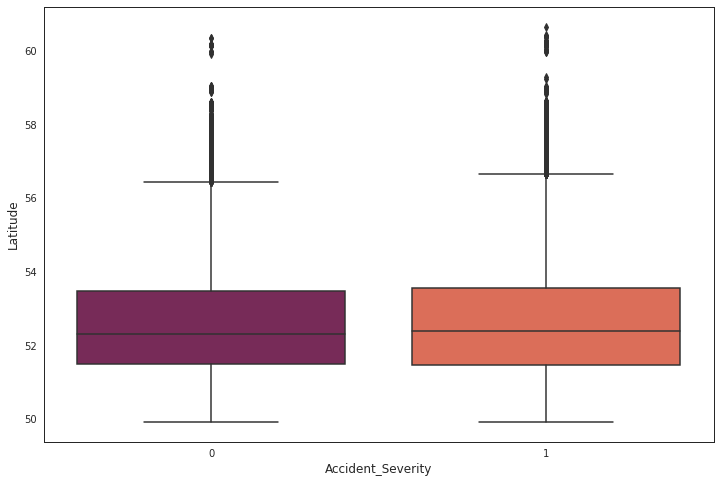

In [113]:
sns.boxplot(x = 'Accident_Severity', y = 'Latitude', data = train_set, palette='rocket')

<AxesSubplot:xlabel='Accident_Severity', ylabel='Longitude'>

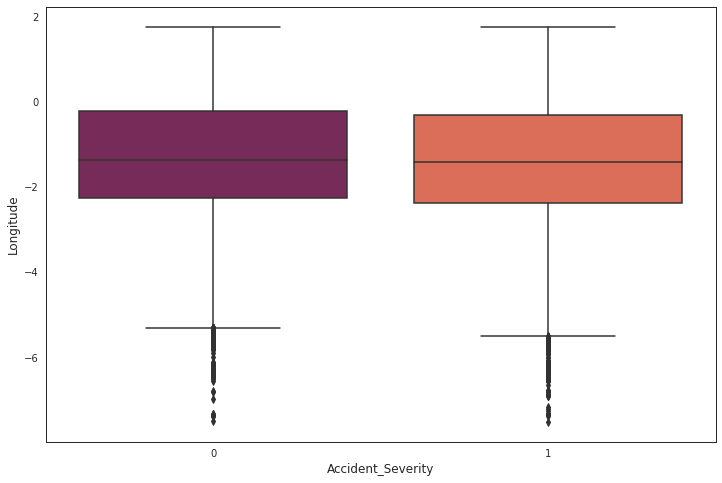

In [114]:
sns.boxplot(x = 'Accident_Severity', y = 'Longitude', data = train_set, palette='rocket')

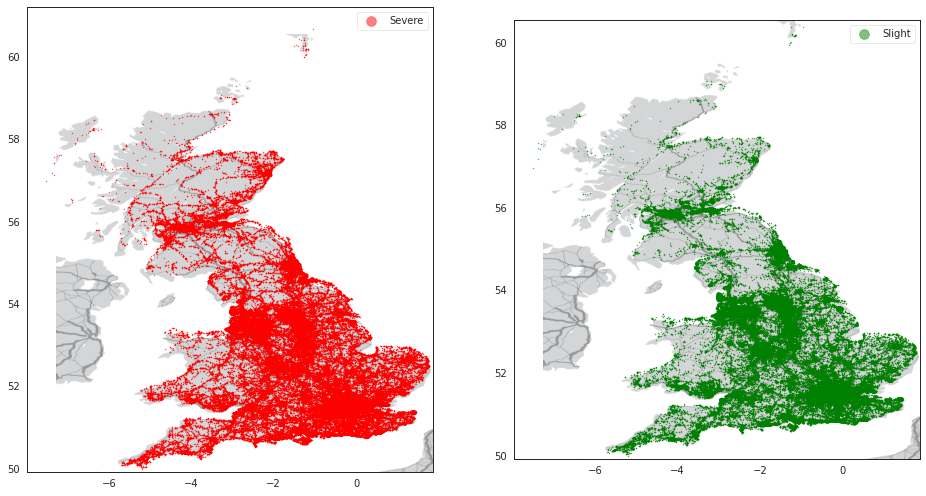

In [115]:
f = plt.figure(figsize=(16,12))

plt.title("1st_Road_Class")

ax = plt.subplot2grid((1, 2), (0,0))
ax.imshow(mymap, alpha=1, zorder=0, extent=box)

acc_R = train_set.loc[train_set["Accident_Severity"]==1]
ax.scatter(
    acc_R.Longitude, acc_R.Latitude, 
    alpha=0.5, 
    s=1, 
    label = "Severe",
    c='red', 
)
ax.legend(markerscale=10)

ax2 = plt.subplot2grid((1, 2), (0,1))
ax2.imshow(mymap, alpha=1, zorder=0, extent=box)
acc_R = train_set.loc[train_set["Accident_Severity"]==0]
ax2.scatter(
    acc_R.Longitude, acc_R.Latitude, 
    alpha=0.5, 
    s=1, 
    label = "Slight",
    c='green', 
)
ax2.legend(markerscale=10)

plt.show()

A confronto sono le mappe degli incidenti *Servere* e *Slight*; in realtà non si notano ad occhio dei posti che sono più gravi di altri. Però tali pattern potrebbero essere scoperti da un classificatore, perciò le due features verranno lasciate nel dataset finale.

##### <b>Veicolo:</b>

<AxesSubplot:xlabel='Accident_Severity', ylabel='Age_of_Vehicle'>

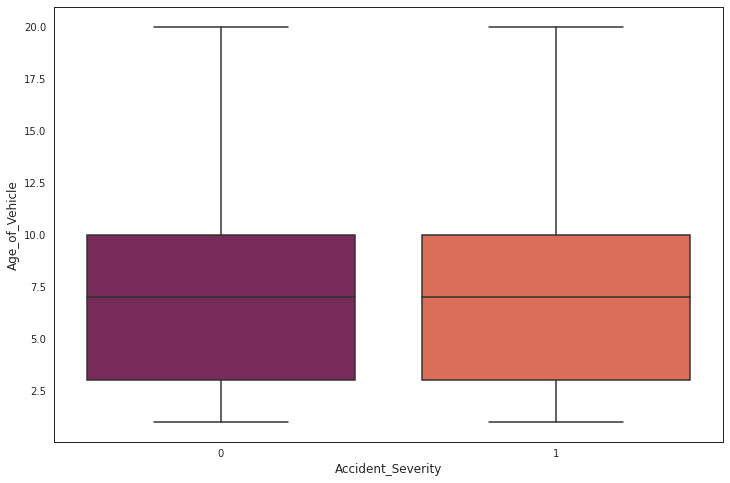

In [116]:
sns.boxplot(x = 'Accident_Severity', y = 'Age_of_Vehicle', data = train_set, palette='rocket')

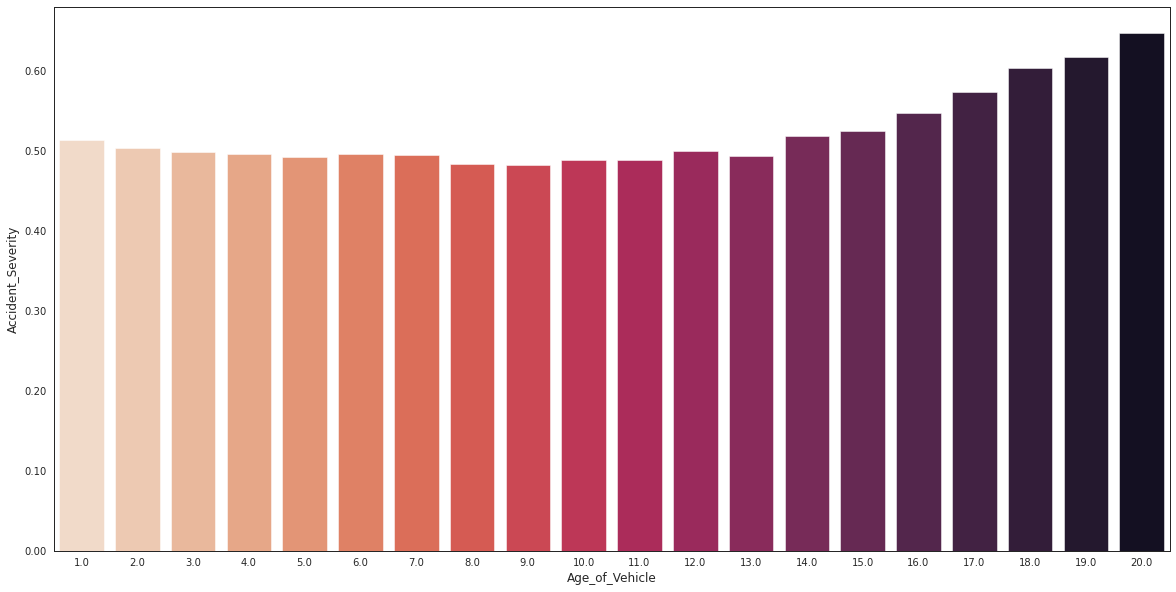

In [117]:
plotBar("Age_of_Vehicle", percent=False, x=20, y=10, order=True)

Come si nota, l'attributo *Age_of_Vehicle* è importante perchè all'aumentare dell'età del veicolo aumenta la gravità dell'incidente. Nel dettaglio si nota come la gravità dell'incidente rimane costante per veicoli con età che va da 1 a 14 anni. Dai 15 anni in su aumenta la gravità dell'incidente.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Engine_Capacity_.CC.'>

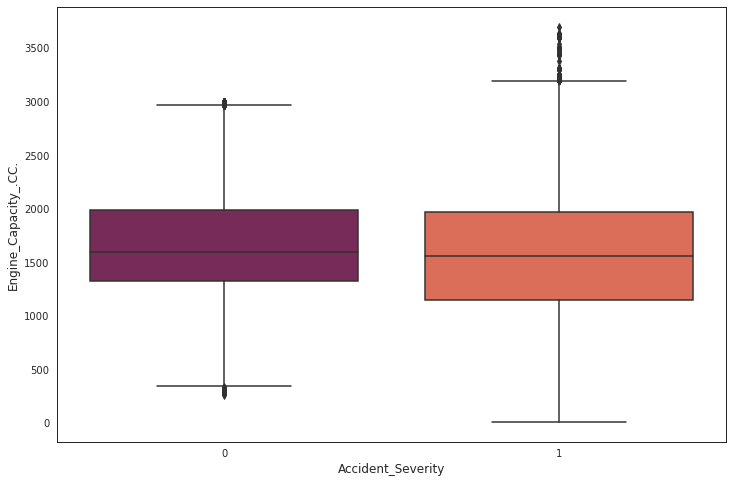

In [118]:
sns.boxplot(x = 'Accident_Severity', y = 'Engine_Capacity_.CC.', data = train_set, palette='rocket')

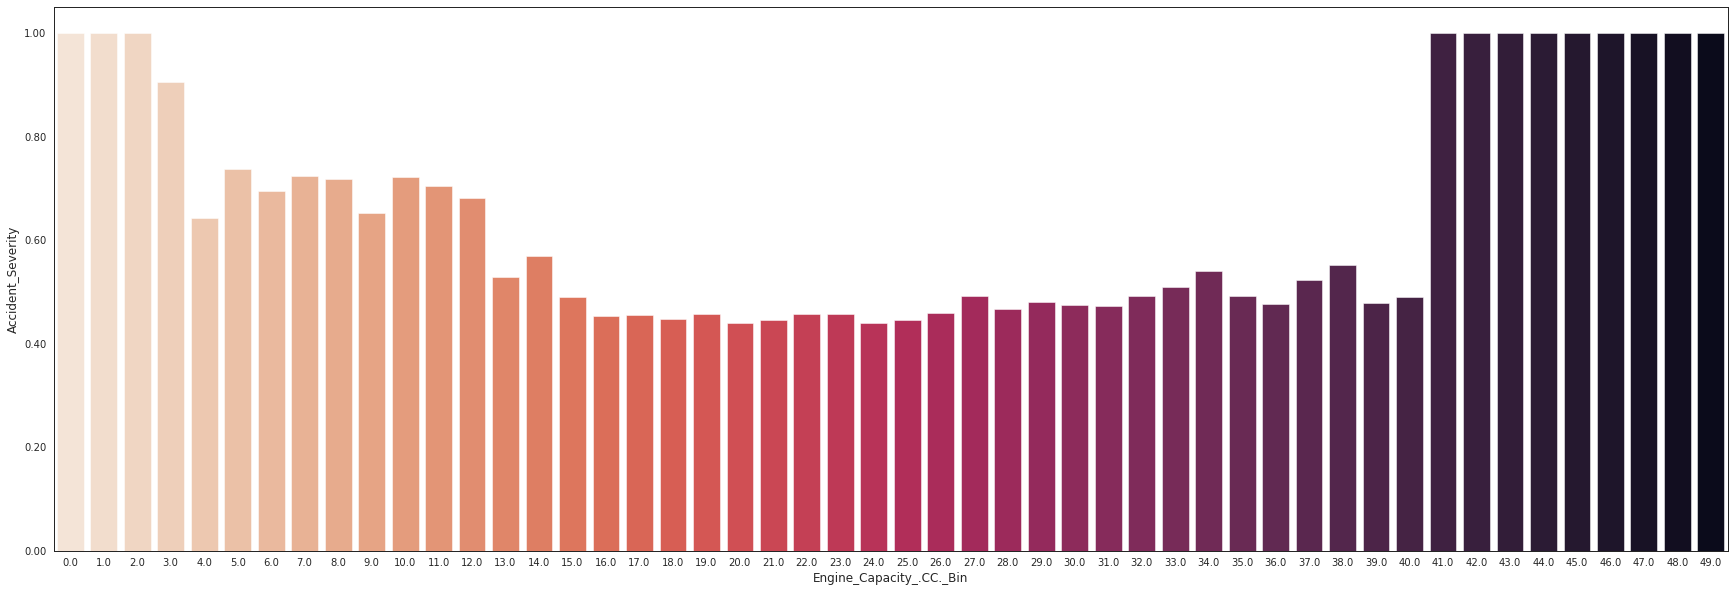

In [119]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='uniform')
train_set['Engine_Capacity_.CC._Bin'] = est.fit_transform(train_set[['Engine_Capacity_.CC.']])
plotBar("Engine_Capacity_.CC._Bin", percent=False, x=30, y=10, order=True)
train_set.drop(labels='Engine_Capacity_.CC._Bin', axis=1, inplace=True)

Si nota anche come il numero di cavalli influisce sulla gravità dell'incidente. In figura sono stati raggrupati il numero di cavalli in 50 intervalli per una questione di visibilità. All'aumentare del numero di cavalli aumenta la gravità dell'incidente.

##### <b>Correlazione:</b>

A questo punto arrivati, si effettua un'analisi della correlazione tra gli attributi numerici del training set:

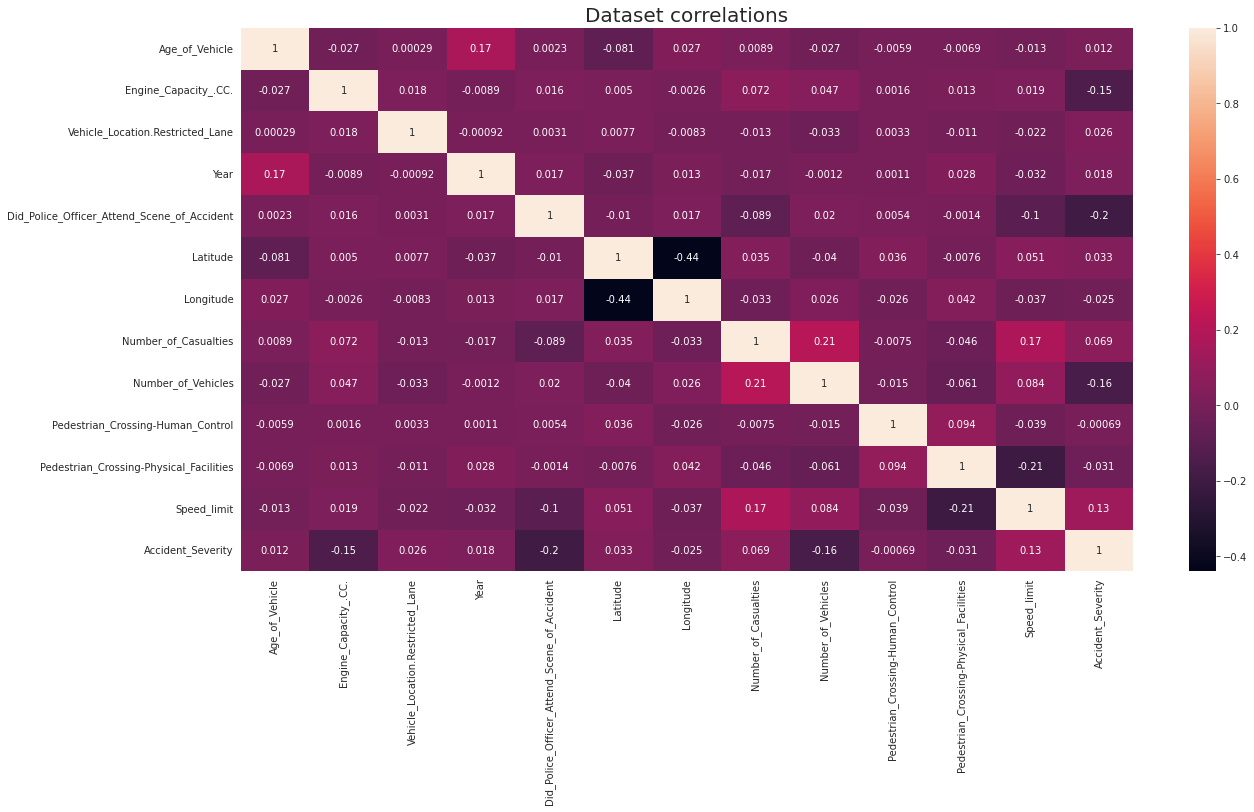

In [120]:
fig,ax = plt.subplots(figsize=(20,10))
fig = sns.heatmap(train_set.corr(), annot=True)
plt.title("Dataset correlations", size=20)
plt.show()

Si nota una lieve correlazione positiva tra numero di morti e numero di veicoli coinvolti (pari a 0,21); è presente anche una correlazione negativa tra latitudine e longitudine (pari a -0,44), e tra *Pedestrian_Crossing-Physical_Facilities* e *Speed_limit* (pari a -0,21).</br>
Tali attributi potrebbero essere scartati e mantenuto solo uno per ciascuna coppia, ma per il momento verranno lasciati perchè più avanti nel caso verranno eliminati se il RandomForest non li riterrà features importanti. </br>
Per quanto riguarda invece l'attributo target (*Accident_Severity*) si nota che ha bassi valori di correlazione lineare con gli altri attributi numerici. Il valore più alto di correlazione è presente con l'attributo *Did_Police_Offer_Attend_Scene_of_Accident* (pari a -0.16). Però nessuno ci dice che è presente un qualche altra forma di correlazione che non sia lineare.

#### <b>4.2.3. Feature Selection</b> 

In questa sezione si eseguirà l'algoritmo del RandomForest sul training set per avere la lista ordinate degli attributi in ordine di importanza, e nel caso poter eliminare quelli che hanno un valore di importanza non rilevante. Per fare ciò verranno momentaneamente codificati gli attributi in label numeriche, in modo da rendere anche gli attributi categorici in formato numerico e quindi accettabile dall'algoritmo.

In [121]:
Encoder_df = LabelEncoder() 
df = train_set.copy()

for c in df.columns:
    df[c] = Encoder_df.fit_transform(df[c])

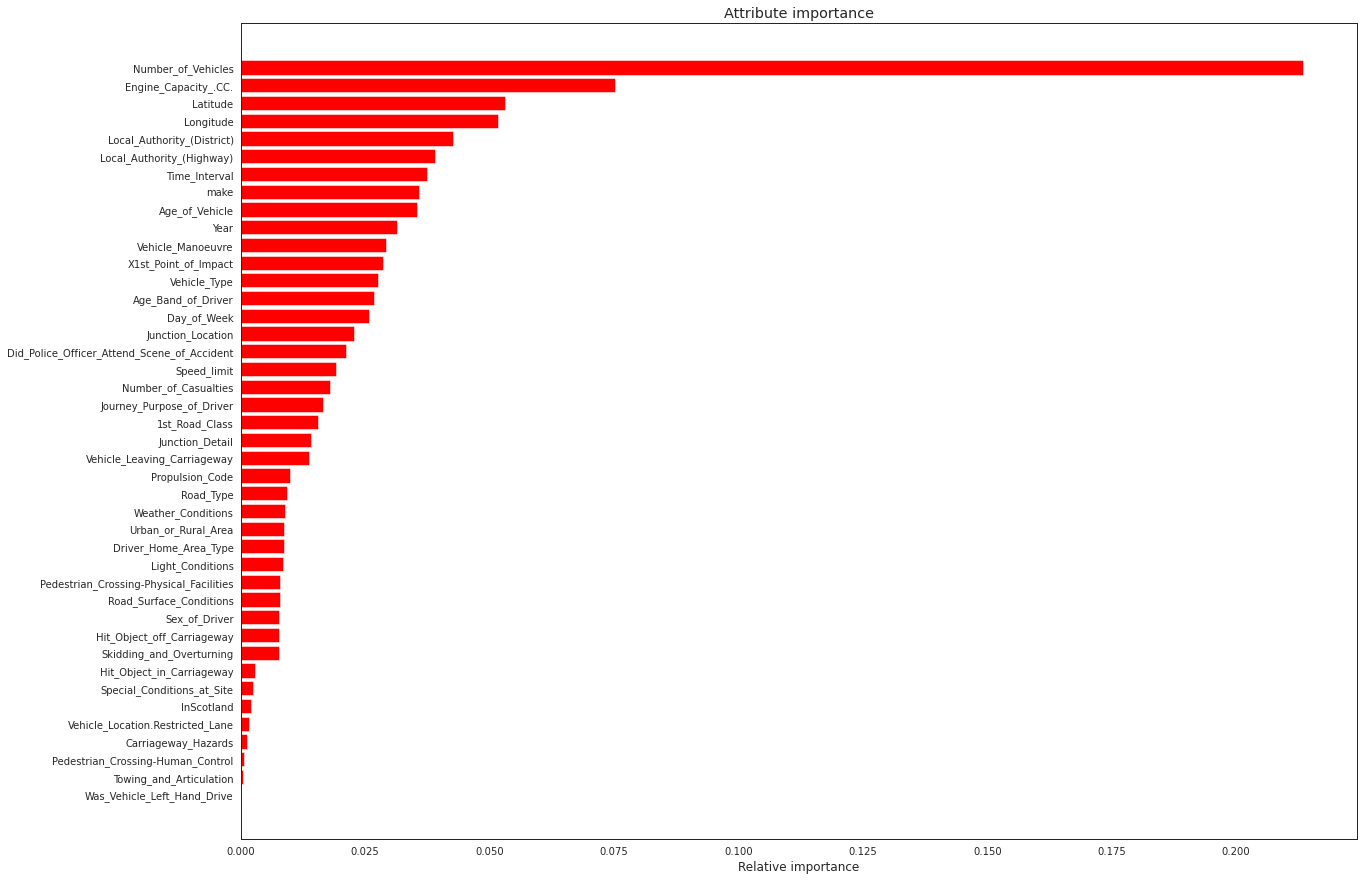

In [122]:
from sklearn.ensemble import RandomForestClassifier

filename = './models/rnd_clf_feature_importance_2.sav'

dfX = df.drop('Accident_Severity', axis = 1)
dfy = df['Accident_Severity']

# rnd_clf = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=40)
# rnd_clf.fit(dfX, dfy)
# save the model to disk
# pickle.dump(rnd_clf, open(filename, 'wb'))

#load the model from disk
rnd_clf = pickle.load(open(filename, 'rb'))

attributes = dfX.columns
importances = rnd_clf.feature_importances_
index = np.argsort(importances)

plt.figure(figsize=(20,15))
plt.title("Attribute importance")
p = plt.barh(range(len(index)), importances[index], color='r', align='center')
plt.yticks(range(len(index)), attributes[index])
plt.xlabel("Relative importance")
plt.show()

Si nota come l'attributo più importante è *Number_of_Vehicles* seguito da *Engine_Capacity_.CC.* (cilindrata veicolo) e della posizione dell'incidente, in particolare latitudine e longitudine; segue anche il distretto di autorità locale. Anche l'orario in cui è avvenuto l'incidente, seguito dall'età del veicolo e dalla marca sono altrettanto importanti. Mentre si nota che l'attributo meno significativo è il *Was_Vehicle_Left_Hand_Drive* seguito da altri come *InScotland* e così via.</br>
Comunque si può affermare che molti di questi risulatati erano stati già ottenuti esplorando i singoli attributi in funzione dell'attributo target.

Dato che il numero di attributi è elevato, si rimuovono tutti gli attributi che sono meno importanti dell'attributo *Weather_Conditions*; ovvero rimarranno solamente 24 feature totali più quella target (25 features):

In [123]:
print("Prima -->", train_set.shape)
train_set.drop(labels='Was_Vehicle_Left_Hand_Drive', axis=1, inplace=True)
train_set.drop(labels='InScotland', axis=1, inplace=True)
train_set.drop(labels='Pedestrian_Crossing-Human_Control', axis=1, inplace=True)
train_set.drop(labels='Towing_and_Articulation', axis=1, inplace=True)
train_set.drop(labels='Vehicle_Location.Restricted_Lane', axis=1, inplace=True)
train_set.drop(labels='Carriageway_Hazards', axis=1, inplace=True)
train_set.drop(labels='Special_Conditions_at_Site', axis=1, inplace=True)
train_set.drop(labels='Sex_of_Driver', axis=1, inplace=True)
train_set.drop(labels='Skidding_and_Overturning', axis=1, inplace=True)
train_set.drop(labels='Hit_Object_off_Carriageway', axis=1, inplace=True)
train_set.drop(labels='Propulsion_Code', axis=1, inplace=True)
train_set.drop(labels='Road_Surface_Conditions', axis=1, inplace=True)
train_set.drop(labels='Light_Conditions', axis=1, inplace=True)
train_set.drop(labels='Driver_Home_Area_Type', axis=1, inplace=True)
train_set.drop(labels='Vehicle_Leaving_Carriageway', axis=1, inplace=True)
train_set.drop(labels='Pedestrian_Crossing-Physical_Facilities', axis=1, inplace=True)
train_set.drop(labels='Hit_Object_in_Carriageway', axis=1, inplace=True)
train_set.drop(labels='Urban_or_Rural_Area', axis=1, inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (332564, 43)
Dopo --> (332564, 25)


### <b>4.3. Data Transformation</b>

In questa fase, si preparano i dati da passare ai modelli di machine learning.

In [124]:
train_set_copy_2 = train_set.copy()

#### <b>4.3.1. Dimensionality:</b>

In questa parte verrà analizzata la dimensionalità degli attributi categorici, e laddove qualche attributi presenta un elevato numero di valori univoci, si attueranno delle tecniche di riduzione della dimensionalità.

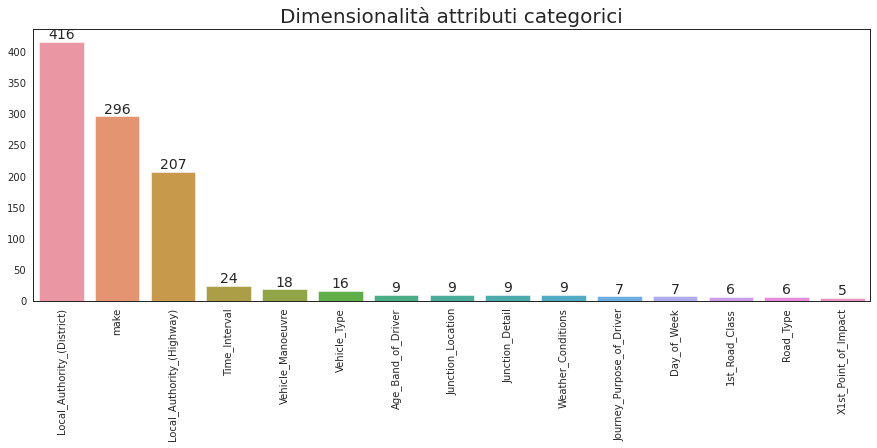

In [125]:
categorical = [var for var in train_set.columns if train_set[var].dtype=='O']

plt.figure(figsize=(15,5))
s = pd.Series(train_set[categorical].nunique()).sort_values(ascending=False)
plot = sns.barplot(x = s.index, y = s.values)
plt.xticks(rotation=90)
plt.title("Dimensionalità attributi categorici", size=20)

patches = plot.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+5
    plot.annotate('{:.0f}'.format(float(s.values[i])), (x, y), ha='center', fontsize=14)

Come si vede, gli attributi con maggiore dimensionalità sono: *Local_Authority_(District)*, *make* e *Local_Authority_(Highway)*.

##### <b>4.3.1.1. *Local_Authority_(District)*:</b>

Iniziando ad analizzare *Local_Authority_(District)*, quest'attributo presenta 416 valori univoci. Per ridurre la dimensionalità di tale attributi una possibile via è quella di raggruppare più local authority in base alla loro poszione giografica. Verrà adottata la tecnica di clustering Kmeans, e verrà scelto un numero di cluster pari a 20.</br> 
Ecco di seguito il dataframe che rappresenta ogni distretto di autorità con rispettive coordinate geografiche (media delle cordinate geografiche presenti nel dataset relative a quel distretto di autorità) e con la gravità dell'incidente (media delle gravità degli incidenti presenti nel dataset relative a quel distretto di autorità):

In [126]:
df = train_set.groupby('Local_Authority_(District)', as_index=False).agg(
        Latitude=("Latitude","mean"), 
        Longitude=("Longitude","mean"),
        Accident_Severity=("Accident_Severity","mean")
)
df.sort_values(by=["Accident_Severity"], inplace=True, ascending=False)
df.head()

Local_Authority_(District)   Latitude  Longitude  Accident_Severity
1                Aberdeenshire  57.287628  -2.335154           0.787259
288                    Ryedale  54.178870  -0.837545           0.759931
264                      Powys  52.326763  -3.362590           0.742601
293           Scottish Borders  55.612100  -2.745900           0.738095
277              Richmondshire  54.382432  -1.788395           0.735537

In [127]:
X = df[['Longitude', 'Latitude']]
X

Longitude   Latitude
1    -2.335154  57.287628
288  -0.837545  54.178870
264  -3.362590  52.326763
293  -2.745900  55.612100
277  -1.788395  54.382432
..         ...        ...
226  -2.261118  53.023136
349  -1.682462  52.624785
196  -1.833053  52.677878
29   -1.555640  55.096479
338  -2.169440  53.016737

[416 rows x 2 columns]

A questo punto viene applicato il metodo Kmeans clustering su tale insieme di punti (coordinate dei distretti di autorità); e viene appesa una nuova colonna chiamata *cluster*, che indicherà il relativo cluster di appartenenza per lo specifico distretto di autorità:

In [128]:
X = df[['Longitude', 'Latitude']]
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
#df['cluster'] = df['cluster'].apply(str)
df

Local_Authority_(District)   Latitude  Longitude  Accident_Severity  \
1                Aberdeenshire  57.287628  -2.335154           0.787259   
288                    Ryedale  54.178870  -0.837545           0.759931   
264                      Powys  52.326763  -3.362590           0.742601   
293           Scottish Borders  55.612100  -2.745900           0.738095   
277              Richmondshire  54.382432  -1.788395           0.735537   
..                         ...        ...        ...                ...   
226       Newcastle-under-Lyme  53.023136  -2.261118           0.316558   
349                   Tamworth  52.624785  -1.682462           0.297189   
196                  Lichfield  52.677878  -1.833053           0.282486   
29                Blyth Valley  55.096479  -1.555640           0.275862   
338             Stoke-on-Trent  53.016737  -2.169440           0.251445   

     cluster  
1          6  
288        7  
264       14  
293       15  
277        7  
..       ...  
226        9  
349        1  
196        1  
29         7  
338        9  

[416 rows x 5 columns]

I seguenti sono i centroidi dei cluster:

In [129]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Longitude','Latitude'])
centers

Longitude   Latitude
0   -4.383417  55.781044
1   -2.107605  52.365486
2    0.597531  51.339690
3   -3.021169  54.266435
4   -4.428715  50.485996
5   -1.058310  51.168564
6   -3.030824  57.711439
7   -1.522897  54.811662
8   -0.979817  52.367081
9   -2.543715  53.403071
10  -2.181056  51.121147
11  -4.222353  52.561097
12  -1.388832  53.300638
13  -0.211900  51.520149
14  -3.294493  51.445339
15  -3.229972  56.101788
16  -0.295232  53.189273
17   1.040367  52.360163
18  -6.706904  57.976669
19  -1.234547  60.186866

Di seguito verrà mostrato il diagramma di Voronoi, in cui sono rappresentati i diversi centroidi sulla mappa geografica con i relativi distrtti di autorità e anche i confini di decisione:

In [130]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='blue'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=17, linewidths=10,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=15, linewidths=10,
               color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(mymap, alpha=1, zorder=0, extent=box)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2", alpha=0.4)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

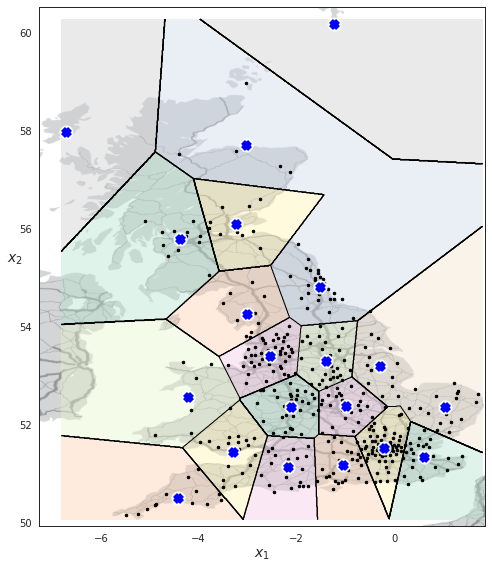

In [131]:
plt.figure(figsize=(8, 10))
plot_decision_boundaries(kmeans, X.to_numpy())
plt.show()

Nella seguente figura sono riportati a sinistra i *Local_Authority_(District)*, mentre a destra i rispettivi centroidi calcolati con l'algoritmo kmeans. Da notare i colori dei punti che rappresentano il valore di gravità dell'incidente: 

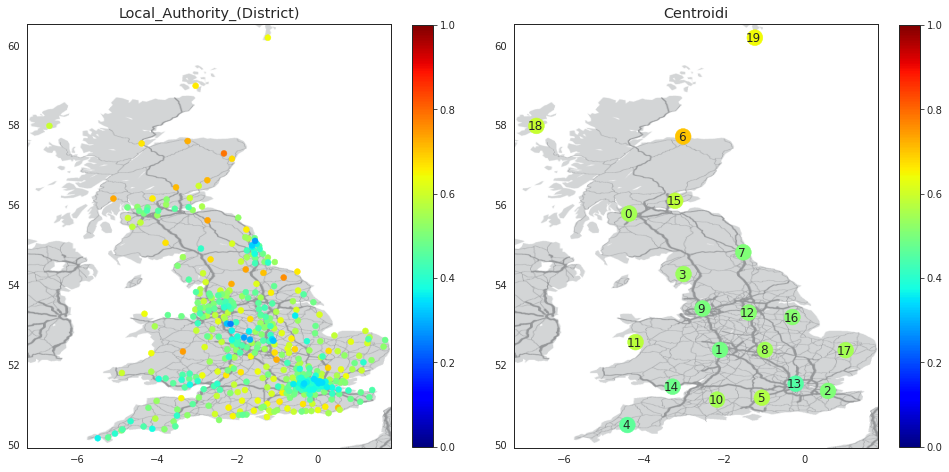

In [132]:
f = plt.figure(figsize=(16,12))
ax = plt.subplot2grid((1, 2), (0,1))

df2 = df.groupby('cluster', as_index=False).agg(
        Accident_Severity=("Accident_Severity","mean")
)
df2 = df2.join(centers)

ax.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Centroidi")

cm = plt.get_cmap("jet")
sc = ax.scatter(df2["Longitude"], df2["Latitude"], vmin=0, vmax=1, s=250, cmap=cm, c=df2["Accident_Severity"])
plt.colorbar(sc,fraction=0.052)

for index, row in df2.iterrows():
    ax.annotate('{:.0f}'.format(row['cluster']), (row['Longitude']-0.03, row['Latitude']-0.1), ha='center', fontsize=12)

ax2 = plt.subplot2grid((1, 2), (0,0))

ax2.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Local_Authority_(District)")

cm = plt.get_cmap("jet")
sc = ax2.scatter(df["Longitude"], df["Latitude"], c=df["Accident_Severity"], vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc,fraction=0.052)

plt.show()

A questo punto non resta che sostituire nel dataset i *Local_Authority_(District)* con i rispettivi centroidi così facendo, finalmente si ridurrà la dimensionalità di tale attributo da 416 valori univoci a ben soli 20 valori univoci.</br>
Per fare ciò si costruirà un dizionario in cui la chiave rappresenta il nome del distretto di autorità, mentre il valore è il rispettivo centroide a cui esso è associato. </br>
Per fare più veloce, di seguito viene crato un transformer che racchiude tutti questi passaggi (dal kmeans al replace), che servirà in seguito anche per modificare il test set:

In [133]:
class ClusteringReplaceValuesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature, k=20):
        self.feature=feature
        self.k=k

    def transform(self,X,y=None):
        X2 = X.copy()
        X2[self.feature].replace(self.dict, inplace=True)
        return X2

    def fit(self, X, y=None):
        df = X.groupby(self.feature, as_index=False).agg(
                                Latitude=("Latitude","mean"), 
                                Longitude=("Longitude","mean"),
                                Accident_Severity=("Accident_Severity","mean")
        )
        df.sort_values(by=["Accident_Severity"], inplace=True, ascending=False)
        kmeans = KMeans(n_clusters=self.k, random_state=42)
        kmeans.fit(df[['Longitude', 'Latitude']])
        df['cluster'] = kmeans.predict(df[['Longitude', 'Latitude']])
        df['cluster'] = df['cluster'].apply(str)
        self.dict = df[[self.feature, 'cluster']].set_index(self.feature).to_dict()['cluster']
        return self

#pipeline = Pipeline([
#    ("replaceDistrict", ClusteringReplaceValuesTransformer("Local_Authority_(District)"))

In [134]:
clusteringReplaceDistrict = ClusteringReplaceValuesTransformer("Local_Authority_(District)")
train_set = clusteringReplaceDistrict.fit_transform(train_set)
train_set['Local_Authority_(District)'].value_counts()

13    67801
12    36588
9     36219
1     26995
5     22203
2     20068
8     16436
7     15458
10    15073
16    13178
17    11643
14    11257
0     10477
15     8939
4      6717
3      6525
6      4036
11     2836
18       59
19       56
Name: Local_Authority_(District), dtype: int64

L'operazione è stata eseguita con successo; come si può notare il centroide più frequente è il numero *13*, non a caso se si vede sulla cartina sopra, si nota come il centroide *13* è nei pressi di Londra.

##### <b>4.3.1.2. *Local_Authority_(Highway)*:</b>

Per quanto riguarda l'attributo *Local_Authority_(Highway)*, si possono rieseguire gli stessi ed identici passaggi effettuati per l'attributo *Local_Authority_(District)*:

In [135]:
df = train_set.groupby('Local_Authority_(Highway)', as_index=False).agg(
        Latitude=("Latitude","mean"), 
        Longitude=("Longitude","mean"),
        Accident_Severity=("Accident_Severity","mean")
)
df.sort_values(by=["Accident_Severity"], inplace=True, ascending=False)
X = df[['Longitude', 'Latitude']]
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Longitude','Latitude'])

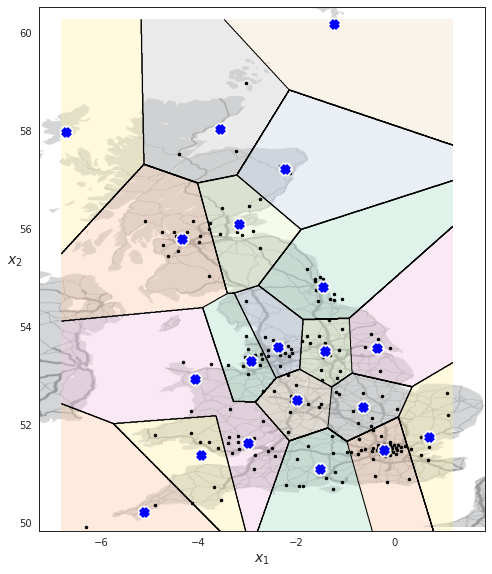

In [136]:
plt.figure(figsize=(8, 10))
plot_decision_boundaries(kmeans, X.to_numpy())
plt.show()

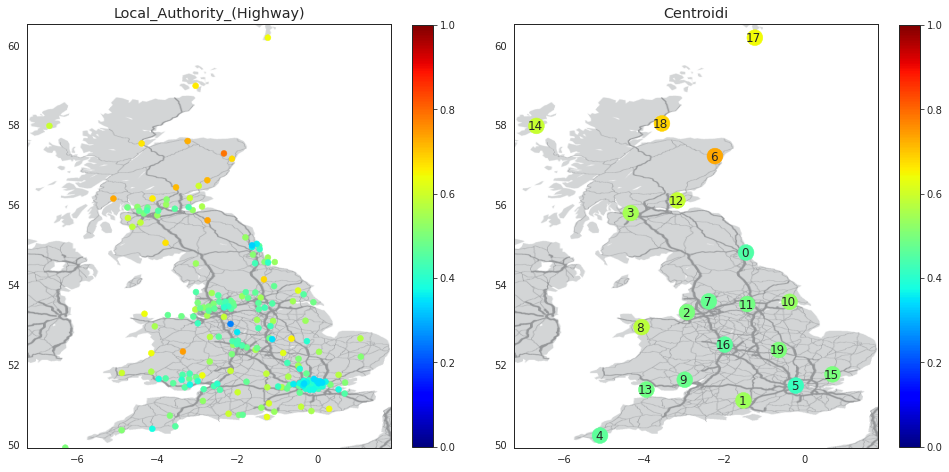

In [137]:
f = plt.figure(figsize=(16,12))
ax = plt.subplot2grid((1, 2), (0,1))

df2 = df.groupby('cluster', as_index=False).agg(
        Accident_Severity=("Accident_Severity","mean")
)
df2 = df2.join(centers)

ax.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Centroidi")

cm = plt.get_cmap("jet")
sc = ax.scatter(df2["Longitude"], df2["Latitude"], vmin=0, vmax=1, s=250, cmap=cm, c=df2["Accident_Severity"])
plt.colorbar(sc,fraction=0.052)

for index, row in df2.iterrows():
    ax.annotate('{:.0f}'.format(row['cluster']), (row['Longitude']-0.03, row['Latitude']-0.1), ha='center', fontsize=12)

ax2 = plt.subplot2grid((1, 2), (0,0))

ax2.imshow(mymap, alpha=1, zorder=0, extent=box)
plt.title("Local_Authority_(Highway)")

cm = plt.get_cmap("jet")
sc = ax2.scatter(df["Longitude"], df["Latitude"], c=df["Accident_Severity"], vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc,fraction=0.052)

plt.show()

Per effettuare la replace dei valori si può usare lo stasso transformer creato in precedenza:

In [138]:
clusteringReplaceHighway = ClusteringReplaceValuesTransformer("Local_Authority_(Highway)")
train_set = clusteringReplaceHighway.fit_transform(train_set)
train_set['Local_Authority_(Highway)'].value_counts()

5     73034
11    38369
16    30938
15    29354
1     27557
7     27324
19    17234
9     13970
2     13937
0     13047
10    11183
3     11140
12     8276
13     8072
4      3915
6      2637
18     1399
8      1063
14       59
17       56
Name: Local_Authority_(Highway), dtype: int64

Ancora una volta possiamo vedere come il centroide più frequente si trova nei pressi di Londra.

##### <b>4.3.1.3. *make*:</b>

Per quanto riguarda l'attributo *make* (marca del veicolo), si può vedere come molte marche di veicoli sono presenti in pochissimi incidenti. Per tale ragione si decide di scegliere una soglia del numero di incidenti (in questo caso si sceglierà 500 dopo avere fatto alcune prove), e di raggruppare tutte le marche di veicoli coinvolti in un numero di incidenti inferiore alla soglia in una nuova marca generale chiamata *OTHERS*. Così facendo si riduce di molto la dimensionalità dell'attributo *make*.</br>
Viene creato un transformer che effettua tale operazione, che sarà usato all'interno di una pipeline:

In [139]:
class VehiclesFeatureGroupNameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=500, groupName='OTHERS', feature='make'):
        self.threshold = threshold
        self.groupName = groupName
        self.feature = feature

    def transform(self,X,y=None):
        X2 = X.copy()
        X2.loc[~X[self.feature].isin(self.makeNotToRemove), self.feature] = self.groupName
        return X2

    def fit(self, X, y=None):
        self.makeNotToRemove = X.groupby(self.feature).filter(lambda x: len(x) >= self.threshold)[self.feature].unique()
        return self

#pipeline = Pipeline([
#    ("makeGroupOthers", vehiclesFeatureGroupNameTransformer())
#])
#train_set = VehiclesFeatureGroupNameTransformer().fit_transform(train_set)

In [140]:
numMake = len(train_set.groupby('make')['make'].unique())
makeToRemove = train_set.groupby('make').filter(lambda x: len(x) < 500)['make'].unique()
makeGroupNameOthers = VehiclesFeatureGroupNameTransformer()
train_set = makeGroupNameOthers.fit_transform(train_set)
print("Veranno raggruppate", len(makeToRemove), "marche su un totale di", numMake, "marche.")
print("Rimangono", numMake-len(makeToRemove)+1, "marche.")

Veranno raggruppate 251 marche su un totale di 296 marche.
Rimangono 46 marche.


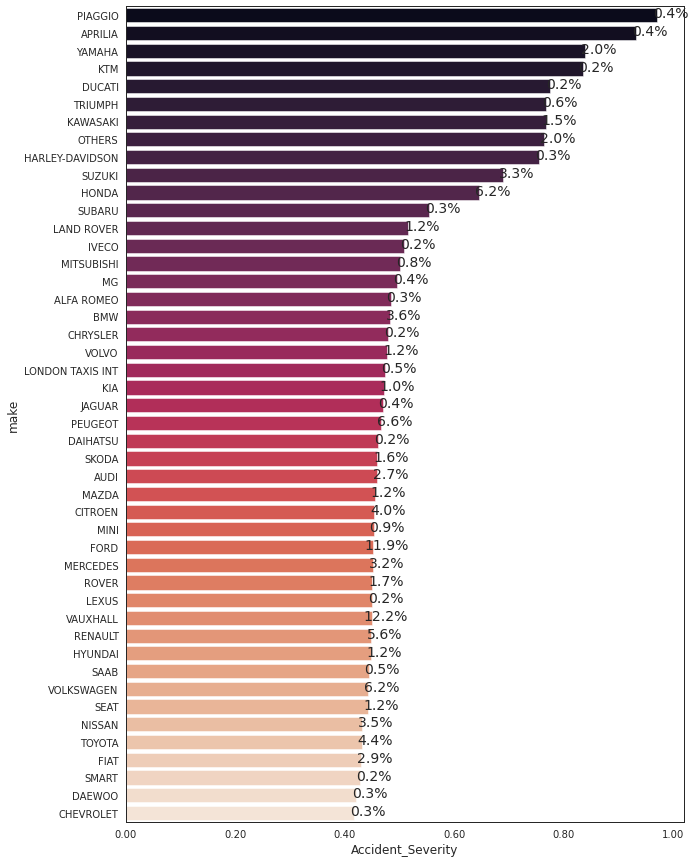

In [141]:
plotBar("make", percent=True, vertical=True, y=15) 

Come prevedibile negli incidenti più gravi sono coinvolte maggiormente le moto, infatti le marche degli incidenti più gravi sono marche di motociclette, esempio: *DUCATI*, *HARLEY-DAVIDSON*, *TRIUMPH*, *KAWASAKI*, *YAMAHA*, *APRILIA*, *SUZUKI*, ecc. Ciò era prevedibile perchè le moto in caso di incidente sono molto meno sicure di un automobile.

#### <b>4.3.2. Encoding:</b>

In questa fase verranno convertiti tutti gli attributi categorici in numerici. Ecco di seguito la lista degli attributi categorici:

In [142]:
categorical = [var for var in train_set.columns if train_set[var].dtype=='O']
train_set[categorical].head()

Age_Band_of_Driver Journey_Purpose_of_Driver  \
0            46 - 55   Journey as part of work   
1            46 - 55                 Not known   
2            56 - 65    Commuting to/from work   
3            46 - 55    Commuting to/from work   
4            21 - 25                 Not known   

                                   Junction_Location        make  \
0                                Entering roundabout        MINI   
1  Approaching junction or waiting/parked at junc...     RENAULT   
2       Mid Junction - on roundabout or on main road      TOYOTA   
3                                 Entering main road     RENAULT   
4                                Entering roundabout  VOLKSWAGEN   

   Vehicle_Manoeuvre Vehicle_Type X1st_Point_of_Impact 1st_Road_Class  \
0      Turning right          Car       Did not impact              A   
1      Turning right          Car             Nearside              C   
2      Turning right          Car                Front              A   
3       Turning left          Car                Front              A   
4  Going ahead other          Car              Offside              A   

  Day_of_Week            Junction_Detail Local_Authority_(District)  \
0     Tuesday                 Roundabout                          9   
1   Wednesday  Private drive or entrance                         15   
2   Wednesday                 Crossroads                          9   
3   Wednesday                 Roundabout                         13   
4   Wednesday                 Roundabout                          7   

  Local_Authority_(Highway)           Road_Type     Weather_Conditions  \
0                        16          Roundabout  Raining no high winds   
1                        12  Single carriageway     Fine no high winds   
2                         7  Single carriageway     Fine no high winds   
3                         5  Single carriageway                Unknown   
4                         0          Roundabout     Fine no high winds   

  Time_Interval  
0            07  
1            16  
2            08  
3            06  
4            22

Come si può vedere ed intuire, gli unici attributi che presentano un ordine sono: *Age_Band_of_Driver*, *Time_Interval* e *Day_of_Week*. Per questi tre attributi la soluzione sarà quella di adottare la classe *OrdinalEncoder* per l'attributo *Age_Band_of_Driver*, mentre per gli altri due attributi temporali, dato che è presente anche un ordine circolare perchè le ore e i giorni della settimana si ripetono nel tempo, la soluzione scelta è quella di tener conto di questa caratteristica convertendoli come "punti" su un cerchio, rappresentati da due nuove colonne ciascuno, rappresentante il seno e il coseno dell'angolo. Infine per i restanti attributi, essendo non ordinali, si può adottare tranquillamente la classe *OneHotEncoder*.

##### <b>4.3.2.1. *Age_Band_of_Driver*:</b>

In [143]:
ordinal_encoder_AgeDriver = OrdinalEncoder()
train_set[['Age_Band_of_Driver']] = ordinal_encoder_AgeDriver.fit_transform(train_set[['Age_Band_of_Driver']])
train_set[['Age_Band_of_Driver']]

Age_Band_of_Driver
0                      5.0
1                      5.0
2                      6.0
3                      5.0
4                      2.0
...                    ...
332573                 7.0
332574                 3.0
332575                 4.0
332576                 4.0
332577                 6.0

[332564 rows x 1 columns]

La trasformazione è stata eseguita, si vede di seguito le categorie come sono state ordinate:

In [144]:
ordinal_encoder_AgeDriver.categories_

[array(['11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55',
        '56 - 65', '66 - 75', 'Over 75'], dtype=object)]

Si nota come in automatico la classe *OrdinalEncoder* ha trovato il giusto ordinamento tra le categorie, infatti si nota un ordinamento crescente delle fasce di età nell'array.

##### <b>4.3.2.2. *Day_of_Week* e *Time_Interval*:</b>

Per i due attributi temporali (*Day_of_Week* e *Time_Interval*), il primo passaggio da compiere è trasformarli in numerici attraverso l'ausilio della classe *OrdinalEncoder*:

In [145]:
ordinal_encoder_DayWeek = OrdinalEncoder(categories=[['Monday', 'Tuesday',  'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']])
train_set[['Day_of_Week']] = ordinal_encoder_DayWeek.fit_transform(train_set[['Day_of_Week']])
train_set[['Day_of_Week']]

Day_of_Week
0               1.0
1               2.0
2               2.0
3               2.0
4               2.0
...             ...
332573          5.0
332574          3.0
332575          2.0
332576          6.0
332577          1.0

[332564 rows x 1 columns]

In [146]:
ordinal_encoder_DayWeek.categories_

[array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
        'Sunday'], dtype=object)]

In [147]:
ordinal_encoder_TimeInterval = OrdinalEncoder()
train_set[['Time_Interval']] = ordinal_encoder_TimeInterval.fit_transform(train_set[['Time_Interval']])
train_set[['Time_Interval']]

Time_Interval
0                 7.0
1                16.0
2                 8.0
3                 6.0
4                22.0
...               ...
332573           16.0
332574           13.0
332575           12.0
332576           13.0
332577            7.0

[332564 rows x 1 columns]

In [148]:
ordinal_encoder_TimeInterval.categories_

[array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
        '22', '23'], dtype=object)]

Dopo aver controllato che la codifica è ordinata, si passa alla costruzione delle due nuove colonne ciascuna, che rappresentano il seno e coseno dei punti nell'angolo.</br>
Le formule sono le seguenti: </br></br>
**Day_of_Week**:
$$
\sin{(\frac{d}{7}*2*\pi)}
$$
$$
\cos{(\frac{d}{7}*2*\pi)}
$$ 
</br>

**Time_Interval**:

$$
\sin{(\frac{t}{24}*2*\pi)}
$$
$$
\cos{(\frac{t}{24}*2*\pi)}
$$

In [149]:
print("Prima -->", train_set.shape)
train_set['Day_of_Week_sin'] = np.sin(train_set['Day_of_Week'] * (2 * np.pi / 7))
train_set['Day_of_Week_cos'] = np.cos(train_set['Day_of_Week'] * (2 * np.pi / 7))
train_set.drop(labels='Day_of_Week', axis=1, inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (332564, 25)
Dopo --> (332564, 26)


In [150]:
print("Prima -->", train_set.shape)
train_set['Time_Interval_sin'] = np.sin(train_set['Time_Interval'] * (2 * np.pi / 24))
train_set['Time_Interval_cos'] = np.cos(train_set['Time_Interval'] * (2 * np.pi / 24))
train_set.drop(labels='Time_Interval', axis=1, inplace=True)
print("Dopo -->", train_set.shape)

Prima --> (332564, 26)
Dopo --> (332564, 27)


Viene crato un transformer che esegue tutta queste serie di trasformazioni per tali attributi:

In [151]:
class CircularEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, feature='Time_Interval', cat=None, number=24):
        self.feature = feature
        self.cat = cat
        self.number = number
        
    def transform(self,X,y=None):
        if self.cat is None:
            self.ordinal_encoder = OrdinalEncoder()
        else: 
            self.ordinal_encoder = OrdinalEncoder(categories=self.cat)
        self.ordinal_feature = self.ordinal_encoder.fit_transform(X[[self.feature]])
        X2 = X.copy()
        X2[self.feature+'_sin'] = np.sin(self.ordinal_feature * (2 * np.pi / self.number))
        X2[self.feature+'_cos'] = np.cos(self.ordinal_feature * (2 * np.pi / self.number))
        X2.drop(labels=self.feature, axis=1, inplace=True)
        return X2

    def fit(self, X, y=None):
        return self


##### <b>4.3.2.3. Altri attributi categorici:</b>

Per tutti i restanti attributi categorici come detto in precedenza è possibile adottare la classe *OneHotEncoder*:

In [152]:
print("Prima -->", train_set.shape)
categorical = [var for var in train_set.columns if train_set[var].dtype=='O']
cat_encoder = OneHotEncoder(sparse=False)
cat_encoder.fit(train_set[categorical])

def get_cat_encoder(df):
    temp_df = pd.DataFrame(data=cat_encoder.transform(df[categorical]), columns=cat_encoder.get_feature_names_out())
    df.drop(columns=categorical, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

train_set = get_cat_encoder(train_set)
print("Dopo -->", train_set.shape)

Prima --> (332564, 27)
Dopo --> (332564, 186)


In [153]:
train_set.head()

Age_Band_of_Driver  Age_of_Vehicle  Engine_Capacity_.CC.  Year  \
0                 5.0             9.0                1598.0  2013   
1                 5.0             6.0                1998.0  2011   
2                 6.0             3.0                2231.0  2011   
3                 5.0             7.0                2188.0  2012   
4                 2.0             6.0                1968.0  2012   

   Did_Police_Officer_Attend_Scene_of_Accident   Latitude  Longitude  \
0                                          1.0  53.047616  -2.244131   
1                                          2.0  55.949146  -3.184619   
2                                          1.0  53.762771  -2.740800   
3                                          1.0  51.616884  -0.244740   
4                                          1.0  54.952193  -1.554247   

   Number_of_Casualties  Number_of_Vehicles  Speed_limit  Accident_Severity  \
0                     1                   2         40.0                  0   
1                     1                   2         30.0                  0   
2                     3                   2         30.0                  0   
3                     2                   2         30.0                  0   
4                     1                   2         30.0                  0   

   Day_of_Week_sin  Day_of_Week_cos  Time_Interval_sin  Time_Interval_cos  \
0         0.781831         0.623490           0.965926      -2.588190e-01   
1         0.974928        -0.222521          -0.866025      -5.000000e-01   
2         0.974928        -0.222521           0.866025      -5.000000e-01   
3         0.974928        -0.222521           1.000000       6.123234e-17   
4         0.974928        -0.222521          -0.500000       8.660254e-01   

   Journey_Purpose_of_Driver_Commuting to/from work  \
0                                               0.0   
1                                               0.0   
2                                               1.0   
3                                               1.0   
4                                               0.0   

   Journey_Purpose_of_Driver_Journey as part of work  \
0                                                1.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Journey_Purpose_of_Driver_Not known  Journey_Purpose_of_Driver_Other  \
0                                  0.0                              0.0   
1                                  1.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  1.0                              0.0   

   Journey_Purpose_of_Driver_Other/Not known (2005-10)  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Journey_Purpose_of_Driver_Pupil riding to/from school  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Journey_Purpose_of_Driver_Taking pupil to/from school  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Junction_Location_Approa

#### <b>4.3.3. Feature scaling:</b>

In questa fase, l'obiettivo è quello di rendere i valori degli attributi sulla stessa scala, in modo tale da poter avere buone performance anche per algoritmi di machine learning che non siano alberi decisionali:

In [154]:
train_set.describe()

Age_Band_of_Driver  Age_of_Vehicle  Engine_Capacity_.CC.  \
count       332564.000000   332564.000000         332564.000000   
mean             3.966491        7.179611           1564.904178   
std              1.791501        4.419928            569.858981   
min              0.000000        1.000000             10.000000   
25%              3.000000        3.000000           1242.000000   
50%              4.000000        7.000000           1596.000000   
75%              5.000000       10.000000           1968.000000   
max              8.000000       20.000000           3700.000000   

                Year  Did_Police_Officer_Attend_Scene_of_Accident  \
count  332564.000000                                332564.000000   
mean     2011.368531                                     1.122097   
std         3.258793                                     0.330051   
min      2005.000000                                     1.000000   
25%      2009.000000                                     1.000000   
50%      2012.000000                                     1.000000   
75%      2014.000000                                     1.000000   
max      2016.000000                                     3.000000   

            Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  332564.000000  332564.000000         332564.000000       332564.000000   
mean       52.611099      -1.423594              1.374995            1.921173   
std         1.483040       1.380300              0.660196            0.480276   
min        49.915618      -7.516225              1.000000            1.000000   
25%        51.481299      -2.322458              1.000000            2.000000   
50%        52.358795      -1.404380              1.000000            2.000000   
75%        53.499203      -0.261969              2.000000            2.000000   
max        60.662043       1.758661              6.000000            6.000000   

         Speed_limit  Accident_Severity  Day_of_Week_sin  Day_of_Week_cos  \
count  332564.000000      332564.000000    332564.000000    332564.000000   
mean       40.226362           0.499994         0.030536        -0.041387   
std        14.398632           0.500001         0.700107         0.712186   
min        20.000000           0.000000        -0.974928        -0.900969   
25%        30.000000           0.000000        -0.781831        -0.900969   
50%        30.000000           0.000000         0.000000        -0.222521   
75%        60.000000           1.000000         0.781831         0.623490   
max        70.000000           1.000000         0.974928         1.000000   

       Time_Interval_sin  Time_Interval_cos  \
count      332564.000000       3.325640e+05   
mean           -0.245658      -3.320294e-01   
std             0.699621       5.830447e-01   
min            -1.000000      -1.000000e+00   
25%            -0.866025      -8.660254e-01   
50%            -0.500000      -5.000000e-01   
75%             0.500000      -1.836970e-16   
max             1.000000       1.000000e+00   

       Journey_Purpose_of_Driver_Commuting to/from work  \
count                                     332564.000000   
mean                                           0.116212   
std                                            0.320480   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       Journey_Purpose_of_Driver_Journey as part of work  \
count                                      332564.000000   
mean                                            0.132074   
std                                             0.338572   
min                                             0.000000   
25%                                             0.000000   
50%                                      

Non resta che portare tutti gli attributi sulla stessa scala, basta vedere ad esempio i valori massimi o medi tra *Age_Band_of_Driver* e *Engine_Capacity_.CC.*, in cui è presente una differenza sostanziale.

In [155]:
print("Prima -->", train_set.shape)
train_set_X = train_set.loc[:, train_set.columns != 'Accident_Severity']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_set_X)
train_set_X, train_set_y = pd.DataFrame(scaled_features, index=train_set_X.index, columns=train_set_X.columns), train_set['Accident_Severity']
print("Dopo X_train -->", train_set_X.shape)
print("Dopo y_train -->", train_set_y.shape)

Prima --> (332564, 186)
Dopo X_train --> (332564, 185)
Dopo y_train --> (332564,)


In [156]:
train_set_X.describe()

Age_Band_of_Driver  Age_of_Vehicle  Engine_Capacity_.CC.          Year  \
count        3.325640e+05    3.325640e+05          3.325640e+05  3.325640e+05   
mean         4.623316e-15   -5.664097e-15          1.435521e-14  1.518574e-14   
std          1.000002e+00    1.000002e+00          1.000002e+00  1.000002e+00   
min         -2.214064e+00   -1.398127e+00         -2.728581e+00 -1.954264e+00   
25%         -5.394874e-01   -9.456300e-01         -5.666396e-01 -7.268134e-01   
50%          1.870465e-02   -4.063659e-02          5.456766e-02  1.937743e-01   
75%          5.768967e-01    6.381084e-01          7.073617e-01  8.074995e-01   
max          2.251473e+00    2.900592e+00          3.746715e+00  1.421225e+00   

       Did_Police_Officer_Attend_Scene_of_Accident      Latitude  \
count                                 3.325640e+05  3.325640e+05   
mean                                  5.199369e-13  2.669815e-15   
std                                   1.000002e+00  1.000002e+00   
min                                  -3.699339e-01 -1.817541e+00   
25%                                  -3.699339e-01 -7.618153e-01   
50%                                  -3.699339e-01 -1.701269e-01   
75%                                  -3.699339e-01  5.988410e-01   
max                                   5.689749e+00  5.428686e+00   

          Longitude  Number_of_Casualties  Number_of_Vehicles   Speed_limit  \
count  3.325640e+05          3.325640e+05        3.325640e+05  3.325640e+05   
mean   6.154192e-17         -1.924623e-13       -4.517127e-13  5.172120e-14   
std    1.000002e+00          1.000002e+00        1.000002e+00  1.000002e+00   
min   -4.413996e+00         -5.680075e-01       -1.918012e+00 -1.404744e+00   
25%   -6.512098e-01         -5.680075e-01        1.641288e-01 -7.102326e-01   
50%    1.392038e-02         -5.680075e-01        1.641288e-01 -7.102326e-01   
75%    8.415754e-01          9.466974e-01        1.641288e-01  1.373302e+00   
max    2.305484e+00          7.005517e+00        8.492691e+00  2.067813e+00   

       Day_of_Week_sin  Day_of_Week_cos  Time_Interval_sin  Time_Interval_cos  \
count     3.325640e+05     3.325640e+05       3.325640e+05       3.325640e+05   
mean      3.546034e-14    -2.092001e-14      -2.292259e-14      -3.240941e-14   
std       1.000002e+00     1.000002e+00       1.000002e+00       1.000002e+00   
min      -1.436160e+00    -1.206965e+00      -1.078216e+00      -1.145661e+00   
25%      -1.160349e+00    -1.206965e+00      -8.867203e-01      -9.158763e-01   
50%      -4.361580e-02    -2.543356e-01      -3.635431e-01      -2.880926e-01   
75%       1.073118e+00     9.335739e-01       1.065804e+00       5.694758e-01   
max       1.348928e+00     1.462243e+00       1.780477e+00       2.284613e+00   

       Journey_Purpose_of_Driver_Commuting to/from work  \
count                                      3.325640e+05   
mean                                      -1.176168e-14   
std                                        1.000002e+00   
min                                       -3.626201e-01   
25%                                       -3.626201e-01   
50%                                       -3.626201e-01   
75%                                       -3.626201e-01   
max                                        2.757707e+00   

       Journey_Purpose_of_Driver_Journey as part of work  \
count                                       3.325640e+05   
mean                                       -8.860316e-15   
std                                         1.000002e+00   
min                                        -3.900919e-01   
25%                                        -3.900919e-01   
50%                                        -3.900919e-01   
75%                                        -3.900919e-01   
max                                         2.563498e+00   

       Journey_Purpose_of_Driver_Not known  Journey_Purpose_of_Driver_Other  \
count                         3.325640e+05                     3.32564

Come si vede, adesso tutti gli attributi sono stati standardizzati (hanno media nulla e varianza unitaria).</br>
Ecco finalmente il training set finale pre elaborato e pronto per l'esecuzione dei modelli di machine learning:

In [157]:
print(train_set_X.shape)
train_set_X.head()

(332564, 185)


Age_Band_of_Driver  Age_of_Vehicle  Engine_Capacity_.CC.      Year  \
0            0.576897        0.411860              0.058077  0.500637   
1            0.576897       -0.266885              0.760006 -0.113088   
2            1.135089       -0.945630              1.168880 -0.113088   
3            0.576897       -0.040637              1.093423  0.193774   
4           -1.097680       -0.266885              0.707362  0.193774   

   Did_Police_Officer_Attend_Scene_of_Accident  Latitude  Longitude  \
0                                    -0.369934  0.294340  -0.594463   
1                                     2.659907  2.250818  -1.275829   
2                                    -0.369934  0.776563  -0.954291   
3                                    -0.369934 -0.670391   0.854058   
4                                    -0.369934  1.578580  -0.094655   

   Number_of_Casualties  Number_of_Vehicles  Speed_limit  Day_of_Week_sin  \
0             -0.568008            0.164129    -0.015721         1.073118   
1             -0.568008            0.164129    -0.710233         1.348928   
2              2.461402            0.164129    -0.710233         1.348928   
3              0.946697            0.164129    -0.710233         1.348928   
4             -0.568008            0.164129    -0.710233         1.348928   

   Day_of_Week_cos  Time_Interval_sin  Time_Interval_cos  \
0         0.933574           1.731773           0.125566   
1        -0.254336          -0.886720          -0.288093   
2        -0.254336           1.588981          -0.288093   
3        -0.254336           1.780477           0.569476   
4        -0.254336          -0.363543           2.054828   

   Journey_Purpose_of_Driver_Commuting to/from work  \
0                                         -0.362620   
1                                         -0.362620   
2                                          2.757707   
3                                          2.757707   
4                                         -0.362620   

   Journey_Purpose_of_Driver_Journey as part of work  \
0                                           2.563498   
1                                          -0.390092   
2                                          -0.390092   
3                                          -0.390092   
4                                          -0.390092   

   Journey_Purpose_of_Driver_Not known  Journey_Purpose_of_Driver_Other  \
0                            -0.857124                        -0.144976   
1                             1.166693                        -0.144976   
2                            -0.857124                        -0.144976   
3                            -0.857124                        -0.144976   
4                             1.166693                        -0.144976   

   Journey_Purpose_of_Driver_Other/Not known (2005-10)  \
0                                          -0.646386     
1                                          -0.646386     
2                                          -0.646386     
3                                          -0.646386     
4                                          -0.646386     

   Journey_Purpose_of_Driver_Pupil riding to/from school  \
0                                          -0.039877       
1                                          -0.039877       
2                                          -0.039877       
3                                          -0.039877       
4                                          -0.039877       

   Journey_Purpose_of_Driver_Taking pupil to/from school  \
0                                          -0.107066       
1                                          -0.107066       
2                                          -0.107066       
3                                          -0.107066       
4                                          -0.107066       

   Junction_Location_Approaching junction or waiting/parked at junction approach  \
0                                      

### <b>4.4. Pipeline</b>

Alla fine della fase di pre-processing, non resta che realizzare un'unica pipeline che riassuma tutte le fasi di processamento del dataset, così che in un solo colpo tali fasi è possibile applicarle sia al training set ma soprattutto al test set; in modo da rendere il test set compatibile con il train set.

Verranno create le classi *WrapperTransformer* e *WrapperTransformer2* che serviranno per il wrapping dei trasformatori custom creati in precedenza; in modo da poter sfruttare le trasformazioni passando tra gli step della pipeline non solo il singolo dataset *X* ma anche la classe target *y*. In particolare la prima classe è stata realizzata per i transformer custom e la seconda per altri trasformatori quali ad esempio un *ColumnTransformer*:

In [158]:
class WrapperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer
        
    def transform(self,X,y=None):
        if isinstance(X, tuple):
            X, y = X
            X['Accident_Severity'] = y
            X2 = self.transformer.transform(X)
            yy = X2['Accident_Severity']
            X.drop('Accident_Severity', axis=1, inplace=True)
            X2.drop('Accident_Severity', axis=1, inplace=True)
            return X2, yy
        return self.transformer.transform(X)

    def fit(self, X, y=None):
        if isinstance(X, tuple):
            X, y = X
            X['Accident_Severity'] = y
            self.transformer.fit(X=X)
            X.drop('Accident_Severity', axis=1, inplace=True)
        else:
          self.transformer.fit(X=X)
        return self

In [159]:
class WrapperTransformer2(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer
        
    def transform(self,X,y=None):
        ver=False
        if isinstance(X, tuple):
            X, y = X
            ver=True
        X2 = self.transformer.transform(X)
        if ver:
          return X2, y
        return X2

    def fit(self, X, y=None):
        if isinstance(X, tuple):
            X, y = X
        self.transformer.fit(X)
        return self

A questo punto non resta che costruire la pipeline. In particolare verranno costruite due pipeline: **full_pipeline_train** e **full_pipeline_test**.</br>
Si sono dovute realizzare due pipeline perchè per quanto riguarda il processamento del training set, sono presenti due step che non sono necessari per il testing set, ovvero l'operazione di rimozione degli outliers e quella di undersampling per il problema della classe sbilanciata.
A parte tale differenza, per il resto le pipeline sono divise in:</br>
1. *data_cleaning_pipeline*: è la pipeline che effettua tutte le operazione di cleaning sul dataset (in realtà sono due separate per train e test perchè all'interno di questa pipeline si effettua la rimozione degli outliers).
2. *data_transformation_pipeline*: è la pipeline che effettua le operazioni di trasformazione, in particolare le operazioni per ridurre la dimensionalità di alcuni attributi (*dimensionality_pipeline*), per effettuare la codifica degli attributi categorici in numerici (*encoding_pipeline*) ed infine per effettuare lo scaling degli attributi (*scaling_pipeline*).

Da notare l'aspetto importante: anche se sono presenti due pipeline, si effettua lo stesso solamente la *fit* (o nel caso *fit_transform*) sul training set con la pipeline *full_pipeline_train*; e la transform sul testing set con la pipeline *full_pipeline_test*. Questo è possibile perchè alla fine le due pipeline hanno in comune il riferimento della pipeline per le transformazioni (*data_transformation_pipeline*); mentre per la *data_cleaning_pipeline* anche se non è in comune, esse non effettuano operazioni sulla *fit* ma solo sulla *transform*.

In [160]:
colToDrop = ['Driver_IMD_Decile', 'model', '2nd_Road_Class', '2nd_Road_Number', 
    'LSOA_of_Accident_Location', 'Junction_Control', 'Date', 'Location_Easting_OSGR', 
    'Location_Northing_OSGR', 'Accident_Index', 'Vehicle_Reference', 'Police_Force',
    '1st_Road_Number']

featureSelection = ['Was_Vehicle_Left_Hand_Drive', 'InScotland',
    'Pedestrian_Crossing-Human_Control', 'Towing_and_Articulation', 'Urban_or_Rural_Area',
    'Vehicle_Location.Restricted_Lane', 'Carriageway_Hazards', 'Special_Conditions_at_Site',
    'Hit_Object_in_Carriageway', 'Sex_of_Driver', 'Skidding_and_Overturning',
    'Hit_Object_off_Carriageway', 'Propulsion_Code', 'Road_Surface_Conditions', 'Light_Conditions',
    'Driver_Home_Area_Type', 'Vehicle_Leaving_Carriageway', 'Pedestrian_Crossing-Physical_Facilities']

days = ['Monday', 'Tuesday',  'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
categoricalRemaind = ['Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'Vehicle_Manoeuvre', 
    'Vehicle_Type', 'X1st_Point_of_Impact', '1st_Road_Class', 'Junction_Detail', 'Local_Authority_(District)', 
    'Local_Authority_(Highway)', 'Road_Type', 'Weather_Conditions']

col_outliers = ['Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Number_of_Casualties', 'Number_of_Vehicles']

data_cleaning_pipeline_after = Pipeline([
        ('replaceMissingToNaN', ReplaceValuesTransformer("Data missing or out of range", np.NaN)),
        ('dropColumns', ColumnDropperTransformer(colToDrop)),
        ('dropRowsAnyNaN', RowsDropperTransformer()),
])

data_cleaning_pipeline_before = Pipeline([
        ('featureSelection', WrapperTransformer(ColumnDropperTransformer(featureSelection))),
        ('binaryProblem', FunctionTransformer(transformAccidentSverity, validate=False)),
])

data_cleaning_pipeline = Pipeline([
        ('data_cleaning_pipeline_after', data_cleaning_pipeline_after),
        ('dropRowsOutliers', RowsDropperOutliersTransformer(col_outliers)),
        ('data_cleaning_pipeline_before', data_cleaning_pipeline_before),
])

data_cleaning_pipeline_test = Pipeline([
        ('data_cleaning_pipeline_after', data_cleaning_pipeline_after),
        ('data_cleaning_pipeline_before', data_cleaning_pipeline_before),
])

dimensionality_pipeline = Pipeline([
    ('timeToTimeInterval', WrapperTransformer(TimeTransformer())),
    ('ageDriverDeleteValues', WrapperTransformer(RowsDropperTransformer('Age_Band_of_Driver'))),
    ('speedLimitDeleteValues', WrapperTransformer(RowsDropperTransformer('Speed_limit'))),
    ('localDistrictClustering', WrapperTransformer(ClusteringReplaceValuesTransformer("Local_Authority_(District)"))),
    ('localHighwayClustering', WrapperTransformer(ClusteringReplaceValuesTransformer("Local_Authority_(Highway)"))),
    ('makeOthers', WrapperTransformer(VehiclesFeatureGroupNameTransformer())),    
])

encoding_pipeline = Pipeline([
    ("dayWeekEncoder", WrapperTransformer(CircularEncoder(feature="Day_of_Week", cat=[days], number=7))),
    ("timeIntervalEncoder", WrapperTransformer(CircularEncoder())),
    ('colTransformer', WrapperTransformer2(ColumnTransformer([
       ("ageDriverEncoder", OrdinalEncoder(), ['Age_Band_of_Driver']),
        ("oneHotEncoderOthers", OneHotEncoder(sparse=False), categoricalRemaind),
    ],remainder='passthrough'))),
])


scaling_pipeline = Pipeline([
    ('standardScaler', WrapperTransformer2(StandardScaler())),
#     ('minMaxScaler', WrapperTransformer2(MinMaxScaler())),      
    #('robustScaler', WrapperTransformer2(RobustScaler())),
])

data_transformation_pipeline = Pipeline([
        ('dimensionality', dimensionality_pipeline),
        ('encoding', encoding_pipeline),
        ('scaling', scaling_pipeline),
])

full_pipeline_test = Pipeline([
        ('dataCleaning', data_cleaning_pipeline_test),
        ('dataTransformation', data_transformation_pipeline),
])

full_pipeline_train = Pipeline([
        ('dataCleaning', data_cleaning_pipeline),
        ('underSampling', FunctionTransformer(underSampling, validate=False)),
        ('dataTransformation', data_transformation_pipeline),
        
])

Per concludere questa sezione, si rendono i dataset di train e test belli e pronti per le fasi successive in cui verranno eseguiti i modelli di data mininig (da notare che il training set è già pronto perchè le trasformazioni sono state eseguite passo passo, però per una questione illustrativa verrà trasformato il training set iniziale senza trasformazioni con la pipeline):

In [161]:
print("Prima training set pronto -->", train_set_X.shape)
print("Prima training set iniziale -->", train_set_iniziale.shape)
X_train, y_train = full_pipeline_train.fit_transform(train_set_iniziale)
print("Dopo X_train -->", X_train.shape)
print("Dopo y_train -->", y_train.shape)

Prima training set pronto --> (332564, 185)
Prima training set iniziale --> (2037823, 56)
Dopo X_train --> (332564, 185)
Dopo y_train --> (332564,)


In [162]:
print("Prima testing set iniziale -->", test_set.shape)
X_test, y_test = full_pipeline_test.transform(test_set)
print("Dopo X_test -->", X_test.shape)
print("Dopo y_test -->", y_test.shape)

Prima testing set iniziale --> (20585, 56)
Dopo X_test --> (14325, 185)
Dopo y_test --> (14325,)


Ecco i dataset pronti train e test con le rispettive classi target:

In [163]:
X_train, y_train

(array([[ 0.57689672, -0.36262012,  2.56349817, ...,  0.9335739 ,
          1.73177307,  0.12556571],
        [ 0.57689672, -0.36262012, -0.39009195, ..., -0.25433556,
         -0.88672032, -0.28809265],
        [ 1.1350888 ,  2.75770688, -0.39009195, ..., -0.25433556,
          1.58898073, -0.28809265],
        ...,
        [ 0.01870465, -0.36262012,  2.56349817, ..., -0.25433556,
          0.35113021, -1.1456611 ],
        [ 0.01870465, -0.36262012, -0.39009195, ...,  0.9335739 ,
         -0.01881193, -1.08721922],
        [ 1.1350888 , -0.36262012,  2.56349817, ...,  0.9335739 ,
          1.73177307,  0.12556571]]),
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 332573    1
 332574    1
 332575    1
 332576    1
 332577    1
 Name: Accident_Severity, Length: 332564, dtype: uint8)

In [164]:
X_test, y_test

(array([[ 0.01870465, -0.36262012,  2.56349817, ..., -0.25433556,
         -0.88672032,  1.42704425],
        [-1.65587158, -0.36262012, -0.39009195, ...,  1.46224334,
         -1.07821646,  0.5694758 ],
        [ 0.01870465, -0.36262012,  2.56349817, ...,  1.46224334,
         -1.07821646,  0.5694758 ],
        ...,
        [ 0.57689672,  2.75770688, -0.39009195, ..., -0.25433556,
         -1.07821646,  0.5694758 ],
        [-0.53948743, -0.36262012,  2.56349817, ..., -0.25433556,
          0.35113021, -1.1456611 ],
        [ 0.57689672, -0.36262012,  2.56349817, ...,  0.9335739 ,
         -0.01881193, -1.08721922]]),
 1755336    0
 253404     0
 1924463    0
 286093     0
 2021059    0
           ..
 261461     0
 236224     0
 1065003    0
 356598     0
 1018300    0
 Name: Accident_Severity, Length: 14325, dtype: uint8)

## <b>5. Model Selection</b>

In questa fase verranno addestrati più modelli per la classificazione, per trovare il modello che generalizzi meglio. Essi saranno valutati attraverso la tecnica KFold Cross Validation. Dove il numero di fold sarà pari a 3 per questioni di costo temporale dell'esecuzione.</br>
Ogni modello sarà il migliore della loro rispettiva classe di ipotesi, perchè per ognuno verrà scelto il migliore sulla base della migliore combinazione degli iperparametri, attraverso l'ausilio della GridSearchCV.

Di seguito è descritta la funzione *compute_performance* che data la lista dei modelli scelti, ritorna un dizionario che, per ogni modello riporta i suoi valori di performance in termini di: *accuracy*, *precision*, *recall*, *f1* e *auc*. Da notare che tali funzioni di score saranno calcolate su un validation set creato ad hoc.

Di seguito sono presenti le griglie adottate per la Grid Search per ogni modello. Dopo di ciò si addestreranno tali modelli e si sceglieranno i migliori iperparametri dei modelli sulla base del valore di accuracy (si ricorda che in questo caso il training set è bilanciato). I modelli calcolati saranno inseriti nella lista *estimators*.

In [165]:
estimators=[]

In [166]:
# Logistic Regression
grid_reg_log = {
    'C': [0.1, 1.0, 10, 100],
    'max_iter': [100, 200]
}

# Decision Tree
grid_dec_tree = {
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
}

# Bernoulli Naive Bayes
grid_BernoulliNB = {
    'alpha': [0.5, 1.0],
    'binarize': [0.5, 1.0],
}

#KNN
grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

#Multi-layer perceptron
grid_MLP = {
    'hidden_layer_sizes': [(10,)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['adaptive'],
}

#SGD Classifier
grid_SGD = {
    'loss': ['hinge', 'log'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.001, 0.1, 1.0],
    'max_iter': [1000, 10000],
    'tol': [0.01]
}

# Random forest
grid_Random_forest = {
    'n_estimators': [50, 500],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Ada Boost
grid_Ada_Boost = {
    'base_estimator__max_depth': [3, 5, 10],
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1, 2]
}

# XGBoost
grid_XGBoost = {
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1, 2],
    'subsample': [0.5, 0.9],
    'colsample_bytree': [0.5],
    'gamma': [0, 1, 5]
}

#### <b>5.1. Logistic Regression:</b>

In [167]:
# Logistic Regression
filename = './models/log_reg_cv.sav'

# clf = LogisticRegression()      
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_log_reg,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_result = grid_search.fit(X_train, y_train)
# logreg_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(logreg_cv, open(filename, 'wb'))

#load the model from disk
logreg_cv = pickle.load(open(filename, 'rb'))
estimators.append(logreg_cv)


#### <b>5.2. Decision Tree:</b>

In [168]:
# Decision Tree
filename = './models/dec_tree_cv.sav'

# clf = DecisionTreeClassifier()     
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_dec_tree,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_result = grid_search.fit(X_train, y_train)
# dec_tree_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(dec_tree_cv, open(filename, 'wb'))

#load the model from disk
dec_tree_cv = pickle.load(open(filename, 'rb'))
estimators.append(dec_tree_cv)

#### <b>5.3. Bernoulli Naive Bayes:</b>

In [169]:
# Bernoulli Naive Bayes
filename = './models/bernoulliNB_cv.sav'

# clf = BernoulliNB()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_BernoulliNB,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# bernoulli_NB_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(bernoulli_NB_cv, open(filename, 'wb'))

#load the model from disk
bernoulli_NB_cv = pickle.load(open(filename, 'rb'))
estimators.append(bernoulli_NB_cv)

#### <b>5.4. K Neighbors Classifier:</b>

In [170]:
# KNN
filename = './models/KNN_cv.sav'

# clf = KNeighborsClassifier()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_KNN,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# KNN_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(KNN_cv, open(filename, 'wb'))

#load the model from disk
KNN_cv = pickle.load(open(filename, 'rb'))
estimators.append(KNN_cv)

#### <b>5.5. Multi-layer perceptron:</b>

In [171]:
#Multi-layer perceptron
filename = './models/MLPClassifier_cv.sav'

# clf = MLPClassifier()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_MLP,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# mlp_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(mlp_cv, open(filename, 'wb'))

#load the model from disk
mlp_cv = pickle.load(open(filename, 'rb'))
estimators.append(mlp_cv)

#### <b>5.6. SGD Classifier:</b>

In [172]:
#SGD Classifier
filename = './models/SGD_cv.sav'

# clf = SGDClassifier()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_SGD,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# sgd_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(sgd_cv, open(filename, 'wb'))

#load the model from disk
sgd_cv = pickle.load(open(filename, 'rb'))
estimators.append(sgd_cv)

#### <b>5.7. Random Forest:</b>

In [173]:
# Random forest
filename = './models/Random_forest_cv.sav'

# clf = RandomForestClassifier()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_Random_forest,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# rf_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(rf_cv, open(filename, 'wb'))

#load the model from disk
rf_cv = pickle.load(open(filename, 'rb'))
estimators.append(rf_cv)

#### <b>5.8. Ada Boost:</b>

In [174]:
# Ada Boost
filename = './models/Ada_boost_cv.sav'

# clf = AdaBoostClassifier()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_Ada_Boost,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# adaBoost_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(adaBoost_cv, open(filename, 'wb'))

#load the model from disk
adaBoost_cv = pickle.load(open(filename, 'rb'))
estimators.append(adaBoost_cv)

#### <b>5.9. XGBoost:</b>

In [ ]:
# XGBoost
filename = './models/XGboost_cv.sav'

# clf = xgb.XGBClassifier()
# grid_search = GridSearchCV(
#                 estimator=clf,
#                 param_grid=grid_XGBoost,
#                 cv=3, 
#                 scoring="accuracy",
#                 n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# XGBoost_cv = grid_search.best_estimator_
# print(grid_search.best_estimator_)

# save the model to disk
# pickle.dump(XGBoost_cv, open(filename, 'wb'))

#load the model from disk
XGBoost_cv = pickle.load(open(filename, 'rb'))
estimators.append(XGBoost_cv)

Nella lista *estimators* sono presenti i modelli migliori per la loro rispettiva classe di ipotesi, calcolati mediante GridSearch su cross validation per la scelta dei migliori iperparametri. Adesso per valutare quale sia il migliore tra di essi, si farà uso di un validation set diviso dal training set, e si effetturà la valutazione mediante la funzione *compute_performance* che data la lista dei modelli scelti, restituisce un dizionario che, per ogni modello riporta i suoi valori di performance in termini di: *accuracy*, *precision*, *recall*, *f1* e *auc*.

In [177]:
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train2.shape, X_validation.shape, y_train2.shape, y_validation.shape

((266051, 185), (66513, 185), (266051,), (66513,))

In [178]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def compute_performance(estimators, X_validation=X_validation, y_validation=y_validation):
    score_dict = {}
    for e in estimators:
        score_dict[e.__class__.__name__] = {}
        accuracy = accuracy_score(y_validation, e.predict(X_validation))
        score_dict[e.__class__.__name__]['accuracy'] = accuracy
        precision = precision_score(y_validation, e.predict(X_validation))
        score_dict[e.__class__.__name__]['precision'] = precision
        recall = recall_score(y_validation, e.predict(X_validation))
        score_dict[e.__class__.__name__]['recall'] = recall
        f1 = f1_score(y_validation, e.predict(X_validation))
        score_dict[e.__class__.__name__]['f1'] = f1
        auc = roc_auc_score(y_validation, e.predict(X_validation))
        score_dict[e.__class__.__name__]['auc'] = auc
    
    return score_dict

In [179]:
estimators

[LogisticRegression(max_iter=200, solver='liblinear'),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                        min_samples_split=5, splitter='random'),
 BernoulliNB(alpha=0.5, binarize=0.5),
 KNeighborsClassifier(p=1, weights='distance'),
 MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), learning_rate='adaptive'),
 SGDClassifier(alpha=0.1, tol=0.01),
 RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                        min_samples_leaf=2, min_samples_split=5,
                        n_estimators=50),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                    learning_rate=0.5)]

In [207]:
filename = './score/score.csv'

# score_dict = compute_performance(estimators)
# # save to disk
# pickle.dump(score_dict, open(filename, 'wb'))

# load the model from disk
score_dict = pickle.load(open(filename, 'rb'))

df_score = pd.DataFrame(data=score_dict)
df_score

LogisticRegression  DecisionTreeClassifier  BernoulliNB  \
accuracy             0.691551                0.753472     0.662037   
precision            0.699158                0.809760     0.681582   
recall               0.672454                0.662616     0.608218   
f1                   0.685546                0.728835     0.642813   
auc                  0.691551                0.753472     0.662037   

           KNeighborsClassifier  MLPClassifier  SGDClassifier  \
accuracy               0.675612       0.776042       0.646123   
precision              0.668640       0.861912       0.671886   
recall                 0.701623       0.657407       0.571181   
f1                     0.684735       0.745896       0.617454   
auc                    0.644735       0.776042       0.646123   

           RandomForestClassifier  AdaBoostClassifier  XGBClassifier  
accuracy                 0.770544            0.773438       0.775752  
precision                0.849663            0.845647       0.845540  
recall                   0.657407            0.668981       0.674769  
f1                       0.741272            0.747011       0.750563  
auc                      0.770544            0.773438       0.775752

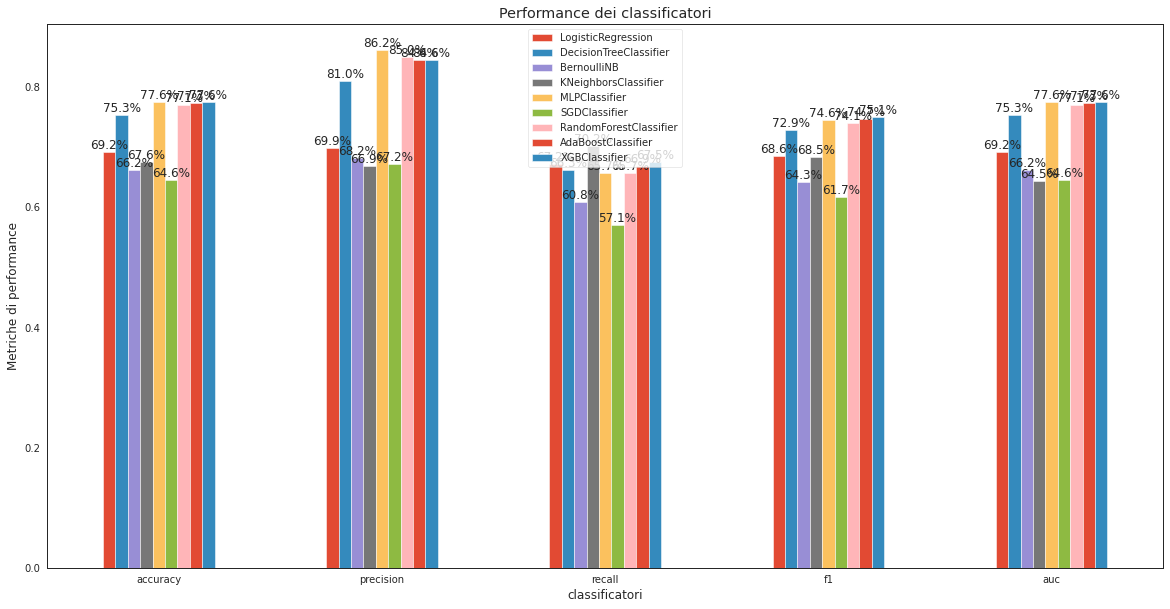

In [208]:
ax = df_score.plot(kind='bar', rot=0, figsize=(20,10))

ax.set_ylabel('Metriche di performance')
ax.set_xlabel('classificatori')
ax.set_title('Performance dei classificatori')

for p in ax.containers:
    ax.bar_label(p, label_type="edge", labels=[f"{v:.1%}" for v in p.datavalues], fontsize=12)

plt.show()

## <b>6. Post processing</b>

Le prestazioni appena valutate, in generale non sono molto soddisfacenti. Dopo molte modifiche iterative in tutte le fasi descritte in precedenza, si è arrivati ad una conclusione: cambiare l'algoritmo di undersampling per il bilanciamento delle classi.</br>
L'idea è quella di provare con un algortimo di undersampling diverso dal *RandomUnderSampling*. In particolare l'algoritmo che si adotterà sarà il *Near-Miss*.

L'algoritmo di undersampling *Near-Miss* presenta 3 diverse varianti. La variante che verrà utilizzata sarà la variante 1 (*Near-Miss v1*).</br>
*NearMiss-1* seleziona i campioni positivi (campioni da sottocampionare) per i quali la distanza media dagli N campioni più vicini della classe negativa (classe minoritaria) è la più piccola.</br>
Nel caso in figura verrà eliminato il punto + in basso:

<img src="img/nearmiss.png" alt="Descrizione" style="width: 40%; height: 40%;">

Per maggiori dettagli e approfondimenti si riporta al seguente link: https://imbalanced-learn.org/stable/under_sampling.html

A questo punto di seguito si riporta il nuovo metodo di undersampling che verrà richiamato all'interno di un FunctionTransformer nella nuova pipeline:

In [182]:
def underSampling_nearMiss(df):
    X, y = df
    rus = NearMiss(version=1, n_neighbors=3)
    X, y  = rus.fit_resample(X, y)
    return X, y

Si modifica quindi la pipeline per l'elaborazione del training set (*full_pipeline_train*), aggiornando il metodo di undersampling. Da notare che quest'ultimo lavora solamente con input numerici, per tale ragione si è deciso di inseriro a monte della pipeline di trasformazione *dataTransformation*:

In [183]:
full_pipeline_train = Pipeline([
        ('dataCleaning', data_cleaning_pipeline),
        ('dataTransformation', data_transformation_pipeline), 
        ('underSampling_nearMiss', FunctionTransformer(underSampling_nearMiss, validate=False)),   
])

Si ricostruiscono il nuovo training set e tasting set:

In [184]:
filename1 = './set/X_train_post_processing.sav'
filename2 = './set/y_train_post_processing.sav'

print("Prima training set iniziale -->", train_set_iniziale.shape)

#X_train, y_train = full_pipeline_train.fit_transform(train_set_iniziale)
#load the training set from disk
X_train = pickle.load(open(filename1, 'rb'))
y_train = pickle.load(open(filename2, 'rb'))

print("Dopo X_train -->", X_train.shape)
print("Dopo y_train -->", y_train.shape)

Prima training set iniziale --> (2037823, 56)
Dopo X_train --> (332560, 188)
Dopo y_train --> (332560,)


In [185]:
filename1 = './set/X_test_post_processing.sav'
filename2 = './set/y_test_post_processing.sav'

print("Prima testing set iniziale -->", test_set.shape)

#X_test, y_test = full_pipeline_test.transform(test_set)
#load the training set from disk
X_test = pickle.load(open(filename1, 'rb'))
y_test = pickle.load(open(filename2, 'rb'))

print("Dopo X_test -->", X_test.shape)
print("Dopo y_test -->", y_test.shape)

Prima testing set iniziale --> (20585, 56)
Dopo X_test --> (14325, 188)
Dopo y_test --> (14325,)


A questo punto non resta che riaddetrare i modelli, ripetendo esattamente i passaggi fatti in precedenza. Da notare che in questo caso si dovrebbero ricalcolare i migliori iperparametri per ogni modello siccome è cambiato totalmente il training set, invece, consapevolmente si è deciso di utilizzare gli stessi iperparametri calcolati nei passaggi precedenti per motivi di velocità di esecuzione.

In [186]:
estimators2=[]

#### <b>6.1. Logistic Regression:</b>

In [187]:
# Logistic Regression
filename = './models_post_processing/log_reg_cv.sav'

# logreg_cv = logreg_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(logreg_cv, open(filename, 'wb'))

#load the model from disk
logreg_cv = pickle.load(open(filename, 'rb'))
estimators2.append(logreg_cv)

#### <b>6.2. Decision Tree:</b>

In [188]:
# Decision Tree
filename = './models_post_processing/dec_tree_cv.sav'

# dec_tree_cv = dec_tree_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(dec_tree_cv, open(filename, 'wb'))

#load the model from disk
dec_tree_cv = pickle.load(open(filename, 'rb'))
estimators2.append(dec_tree_cv)

#### <b>6.3. Bernoulli Naive Bayes:</b>

In [189]:
# Bernoulli Naive Bayes
filename = './models_post_processing/bernoulliNB_cv.sav'

# bernoulli_NB_cv = bernoulli_NB_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(bernoulli_NB_cv, open(filename, 'wb'))

#load the model from disk
bernoulli_NB_cv = pickle.load(open(filename, 'rb'))
estimators2.append(bernoulli_NB_cv)

#### <b>6.4. K Neighbors Classifier:</b>

In [190]:
# KNN
filename = './models_post_processing/KNN_cv.sav'

# KNN_cv = KNN_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(KNN_cv, open(filename, 'wb'))

#load the model from disk
KNN_cv = pickle.load(open(filename, 'rb'))
estimators2.append(KNN_cv)

#### <b>6.5. Multi-layer perceptron:</b>

In [191]:
#Multi-layer perceptron
filename = './models_post_processing/MLPClassifier_cv.sav'

# mlp_cv = mlp_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(mlp_cv, open(filename, 'wb'))

#load the model from disk
mlp_cv = pickle.load(open(filename, 'rb'))
estimators2.append(mlp_cv)

#### <b>6.6. SGD Classifier:</b>

In [192]:
#SGD Classifier
filename = './models_post_processing/SGD_cv.sav'

# sgd_cv = sgd_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(sgd_cv, open(filename, 'wb'))

#load the model from disk
sgd_cv = pickle.load(open(filename, 'rb'))
estimators2.append(sgd_cv)

#### <b>6.7. Random Forest:</b>

In [193]:
# Random forest
filename = './models_post_processing/Random_forest_cv.sav'

# rf_cv = rf_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(rf_cv, open(filename, 'wb'))

#load the model from disk
rf_cv = pickle.load(open(filename, 'rb'))
estimators2.append(rf_cv)

#### <b>6.8. Ada Boost:</b>

In [194]:
# Ada Boost
filename = './models_post_processing/Ada_boost_cv.sav'

# adaBoost_cv = adaBoost_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(adaBoost_cv, open(filename, 'wb'))

#load the model from disk
adaBoost_cv = pickle.load(open(filename, 'rb'))
estimators2.append(adaBoost_cv)

#### <b>6.9. XGBoost:</b>

In [ ]:
# XGBoost
filename = './models_post_processing/XGboost_cv.sav'

# XGBoost_cv = XGBoost_cv.fit(X_train, y_train)

# save the model to disk
# pickle.dump(XGBoost_cv, open(filename, 'wb'))

#load the model from disk
XGBoost_cv = pickle.load(open(filename, 'rb'))
estimators2.append(XGBoost_cv)

In [196]:
estimators2

[LogisticRegression(max_iter=200, solver='liblinear'),
 DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                        min_samples_split=5, splitter='random'),
 BernoulliNB(alpha=0.5, binarize=0.5),
 KNeighborsClassifier(p=1, weights='distance'),
 MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), learning_rate='adaptive'),
 SGDClassifier(alpha=0.1, tol=0.01),
 RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                        min_samples_leaf=2, min_samples_split=5,
                        n_estimators=50),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                    learning_rate=0.5)]

Anche in questo caso si farà uso di un validation set diviso dal training set, e si effetturà la valutazione mediante la funzione *compute_performance*.

In [197]:
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train2.shape, X_validation.shape, y_train2.shape, y_validation.shape

((266048, 188), (66512, 188), (266048,), (66512,))

In [198]:
filename = './score/score2.csv'

# score_dict2 = compute_performance(estimators2)
# # save to disk
# pickle.dump(score_dict2, open(filename, 'wb'))

# load the model from disk
score_dict2 = pickle.load(open(filename, 'rb'))

df_score2 = pd.DataFrame(data=score_dict2)
df_score2

BernoulliNB  DecisionTreeClassifier  LogisticRegression  \
accuracy      0.737521                0.817477            0.779258   
precision     0.767884                0.898759            0.807648   
recall        0.681459                0.715891            0.733588   
f1            0.722095                0.796970            0.768838   
auc           0.737567                0.817559            0.779295   

           MLPClassifier  SGDClassifier  RandomForestClassifier  \
accuracy        0.866941       0.726455                0.868370   
precision       0.924287       0.821933                0.939318   
recall          0.799597       0.578734                0.787850   
f1              0.857433       0.679220                0.856942   
auc             0.866996       0.726575                0.868435   

           AdaBoostClassifier  KNeighborsClassifier  XGBClassifier  
accuracy             0.865483              0.725612       0.863198  
precision            0.916427              0.778640       0.917599  
recall               0.804555              0.691623       0.798305  
f1                   0.856855              0.732556       0.853805  
auc                  0.865532              0.692556       0.863250

Si plottano i risultati ottenuti:

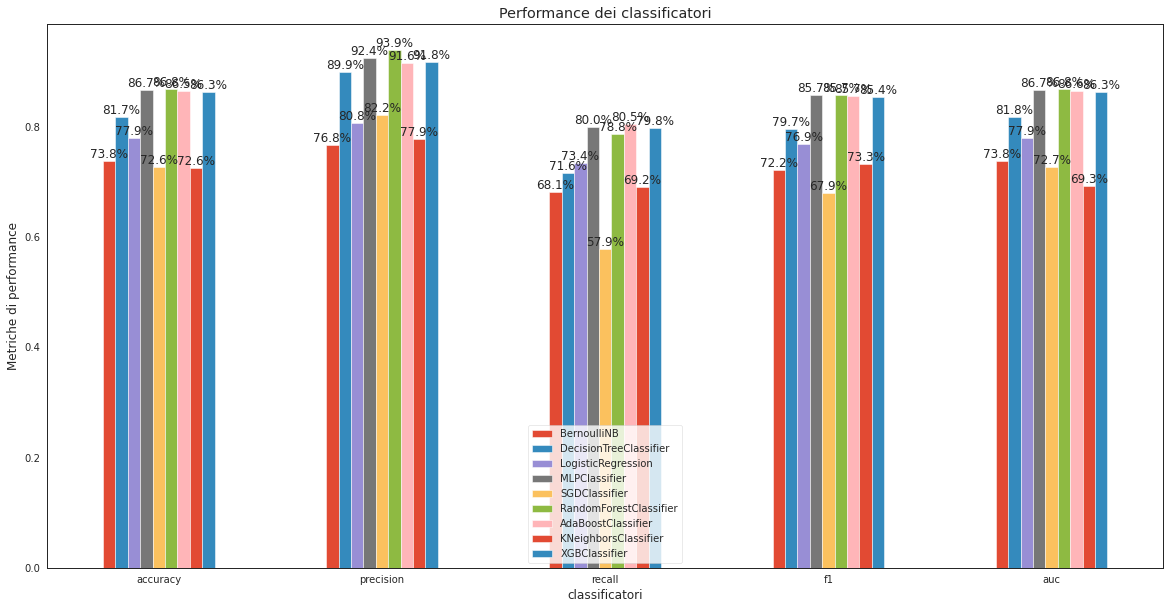

In [199]:
ax = df_score2.plot(kind='bar', rot=0, figsize=(20,10))

ax.set_ylabel('Metriche di performance')
ax.set_xlabel('classificatori')
ax.set_title('Performance dei classificatori')
plt.legend(loc="lower center")

for p in ax.containers:
    ax.bar_label(p, label_type="edge", labels=[f"{v:.1%}" for v in p.datavalues], fontsize=12)

plt.show()

Come si può vedere, i risultati emersi sono migliori di quelli in precedenza. A questo punto l'ultimo passo che rimane, è quello di selzionare il classificatore che performa meglio sul validation set in termini di *accuracy*, dato che il validation set è bilanciato, è valutare le performance definitive sui dati reali che il classificatore non ha mai visto, ovvero il test set iniziale. 

In [200]:
first_row = df_score2.iloc[0]
max_idx = first_row.idxmax()
print(max_idx)
max_col_name = df_score2[max_idx]
print(max_col_name)
max_value = first_row[max_idx]
print("Il valore massimo di accuracy è", max_value, "dato dal classificatore", max_idx)

RandomForestClassifier
accuracy     0.868370
precision    0.939318
recall       0.787850
f1           0.856942
auc          0.868435
Name: RandomForestClassifier, dtype: float64
Il valore massimo di accuracy è 0.8683696175126293 dato dal classificatore RandomForestClassifier


In [201]:
best_estimator = estimators2[6]
best_estimator

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)

*best_estimator* corrisponde al classificatore con il valore più alto di accuracy.

## <b>7. Valutazioni delle performance</b>

A questo punto non resta da valutare le performance finali del migliore classificatore scelto nella fase di model selction, con i dati presenti nel test set pre elaborati dalla pipeline per il test set. Per fare ciò si farà uso ancora una volta del metodo *compute_performance*, passando in ingresso non il validation set bensì il test set. Si farà la stessa cosa con il training set, in modo tale anche da valutare se il modello presenta un elevato livello di overfitting.

In [202]:
filename = './score/score_test.csv'

# score_dict_test = compute_performance([best_estimator], X_test, y_test)
# # save to disk
# pickle.dump(score_dict_test, open(filename, 'wb'))

# load the model from disk
score_dict_test = pickle.load(open(filename, 'rb'))

df_score_test = pd.DataFrame(data=score_dict_test)
df_score_test.rename(columns={best_estimator.__class__.__name__: 'Test Set'}, inplace=True)
df_score_test

Test Set
accuracy   0.837095
auc        0.837095
f1         0.824117
precision  0.895451
recall     0.763310

In [203]:
filename = './score/score_train.csv'

# score_dict_train = compute_performance([best_estimator], X_train, y_train)
# # save to disk
# pickle.dump(score_dict_train, open(filename, 'wb'))

# load the model from disk
score_dict_train = pickle.load(open(filename, 'rb'))

df_score_train = pd.DataFrame(data=score_dict_train)
df_score_train.rename(columns={best_estimator.__class__.__name__: 'Train set'}, inplace=True)
df_score_train

Train set
accuracy    0.869942
auc         0.869942
f1          0.858618
precision   0.940506
recall      0.789848

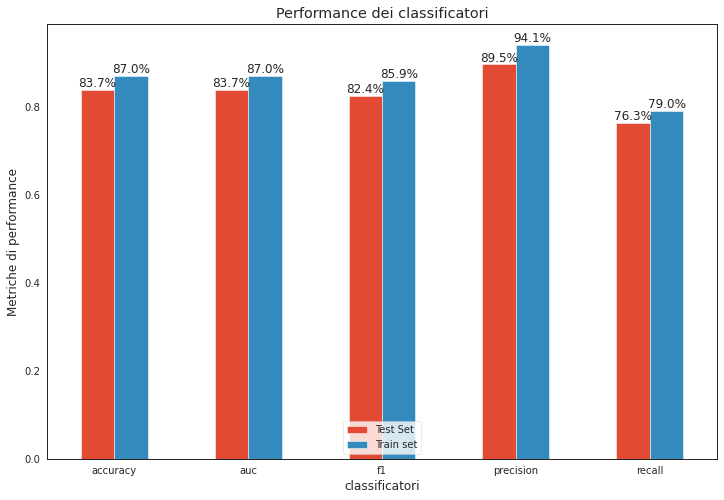

In [204]:
df_merged = pd.concat([df_score_test, df_score_train], axis=1)
ax = df_merged.plot(kind='bar', rot=0)

ax.set_ylabel('Metriche di performance')
ax.set_xlabel('classificatori')
ax.set_title('Performance dei classificatori')
plt.legend(loc="lower center")

for p in ax.containers:
    ax.bar_label(p, label_type="edge", labels=[f"{v:.1%}" for v in p.datavalues], fontsize=12)

plt.show()

I risultati mostrano il valore di **accuracy** sul test set pari a **83,7%**, mentre sul training set pari a **87,0%**, da ciò si evince che non è presente overfitting. Inoltre anche le altre misure calcolate sul test set non si discostano molto dalle performance sul training set.</br> 
Da notare che il valore di **recall** pari a **76,3%** è più basso rispetto al valore di **precision** pari a **89,5%**: ciò mette in evidenza che il modello ottenuto è più preciso e meno sensibile, significa che quando il modello predice che un incidente è grave, ha una maggiore probabilità di essere corretto rispetto a quando predice che un incidente sia lieve.</br>
Tuttavia, ciò può anche significare che il modello rischia di perdere alcuni casi di incidenti gravi, classificandoli erroneamente come lievi.<br> 
In generale, dipende dal contesto e dello scopo del modello: ad esempio se l'obiettivo è quello di rilevare in tempo reale in base alle features dell'incidente se questo è grave o lieve, in modo da avvisare i soccorsi con diversi livelli di priorità di intervento sul posto.</br> 
Se il contesto quindi è quello appena descritto, e l'obiettivo è quello di minimizzare le risorse (soccorsi), in modo da evitare la loro saturazione, limitando il loro intervento su altri incidenti; allora il modello si comporterebbe bene perchè avendo un valore di precision più elevato del valore di recall, si avrà una maggiore probabilità che gli incidenti lievi verranno classificati come gravi (quindi evitare di occupare risorse inutilmente dato che in realtà l'incidente è lieve).</br>
In conclusione i risultati ottenuti sono soddisfacenti.

## <b>8. Conclusioni</b>

Questo task di data mining ha visto una prima parte abbastanza corposa sull'analisi dei dati e sulla loro visualizzazione, ed una seconda parte di predizione dell'attributo target preceduto da tutta la fase di preprocessing dei dati. Inoltre si è visto come, tornando indietro nel ciclo di elaborazione, si sono ottenuti migliori risultati; infatti la fase successiva alla model selection è stata quella di rieseguire gli algoritmi di data mining, applicando ai dati una differente tecnica di undersampling per le classi sbilanciate. In definitiva si è scelto il miglior algoritmo sulla base di un validation set, e si sono calcolate le performance sul test set, tenuto in disparte dall'inizio dell'elaborazione del task.</br>
Un'ultima precisazione va fatta, il trade-off tra qualità della soluzione e tempo di esecuzione è molto importante. Avendo un dataset con una dimensione abbastanza considerevole, non tutti gli algoritmi avevano un basso tempo di esecuzione, soprattutto se all'interno di una GridSearch (anche per tale ragione si sono utilizzati pochi parametri). Inoltre, anche la fase di preprocessing attraverso i diversi step racchiusi nelle pipeline erano abbastanza lenti. Per tali motivazioni, si è deciso di eseguire gli algoritmi una sola volta e salvare i risultati su disco, così che nella successiva esecuazione essi potranno essere caricati direttamente da disco, riducendo drasticamente i tempi di esecuzione.</br>

Per concludere, l'output finale di tale task può essere la seguente pipeline: *full_pipeline* prende in input un qualsiasi dato nella forma iniziale non pre elaborato, e restituisce la predizione effettuata sull'attributo target *Accident_Severity*.

In [205]:
full_pipeline = Pipeline([
        ('pre-processing', full_pipeline_test),
        ('classifier', best_estimator),
])